In [1]:
import sys
sys.path.append('../')

In [2]:
import os 
from torcheval.metrics import MulticlassAccuracy
import torch
from VisionTransformer.ViT import ViT
from utils.device_utils import get_device
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
from utils.make_datasets import return_datasets
CIFAR_Train, CIFAR_Val, CIFAR_Test = return_datasets()

Files already downloaded and verified
40000
Files already downloaded and verified


/Users/adithyagiri/miniconda3/lib/python3.12/site-packages/torch/nn/functional.py:5417: UserWarning: The operator 'aten::im2col' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/aten/src/ATen/mps/MPSFallback.mm:13.)
  return torch._C._nn.im2col(


tensor([1, 3, 6, 9, 6, 9, 9, 9, 9, 1, 3, 5, 8, 3, 7, 8, 8, 5, 8, 3, 0, 1, 7, 5,
        5, 9, 2, 6, 4, 8, 5, 4, 1, 5, 3, 2, 0, 8, 7, 4, 7, 8, 3, 7, 3, 7, 8, 7,
        2, 7, 1, 5, 8, 5, 5, 5, 0, 8, 4, 7, 9, 4, 1, 9, 4, 3, 5, 5, 8, 9, 5, 8,
        6, 7, 5, 9, 0, 8, 2, 1, 0, 5, 4, 6, 1, 4, 8, 1, 7, 8, 8, 8, 5, 6, 6, 8,
        9, 0, 5, 7, 0, 9, 6, 5, 7, 2, 3, 0, 0, 8, 2, 7, 7, 2, 7, 6, 4, 7, 2, 8,
        1, 4, 1, 2, 4, 7, 5, 9, 1, 5, 3, 8, 7, 9, 3, 5, 4, 1, 4, 5, 0, 6, 7, 9,
        5, 6, 8, 0, 9, 7, 8, 9, 1, 7, 6, 5, 4, 7, 5, 4, 8, 0, 4, 7, 0, 5, 2, 7,
        1, 4, 0, 4, 6, 0, 1, 2, 4, 7, 1, 3], device='mps:0')
Loss: 10.492358207702637, Batch Num: 0/223, Accuracy:0.0, Epoch: 0
tensor(9.6266, device='mps:0')
tensor([3, 4, 3, 0, 6, 0, 3, 4, 3, 1, 7, 9, 5, 3, 8, 8, 6, 7, 8, 2, 2, 3, 2, 3,
        1, 5, 2, 4, 7, 0, 6, 7, 6, 6, 2, 1, 4, 0, 8, 6, 0, 3, 1, 5, 6, 7, 5, 0,
        5, 4, 0, 3, 0, 4, 7, 0, 0, 9, 0, 8, 6, 5, 5, 9, 7, 2, 2, 7, 3, 2, 8, 6,
        7, 7, 1, 0, 1, 1, 2, 3, 9, 8, 8, 

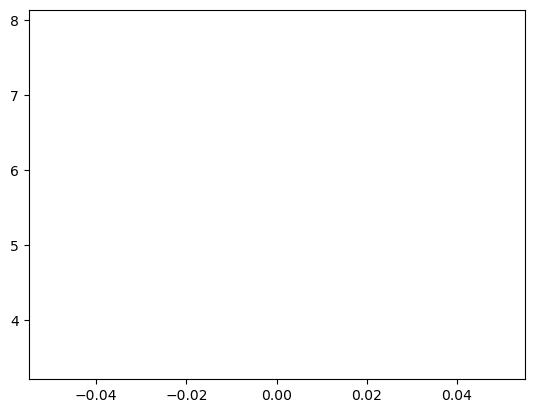

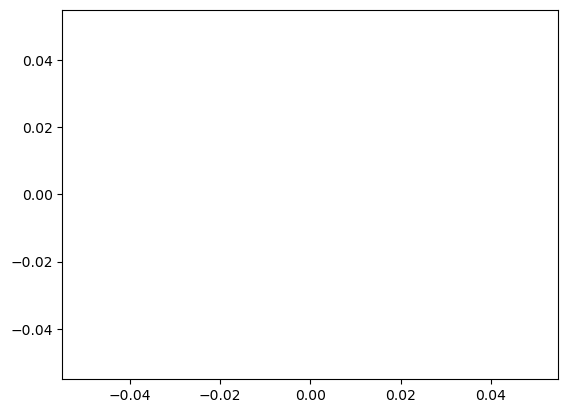

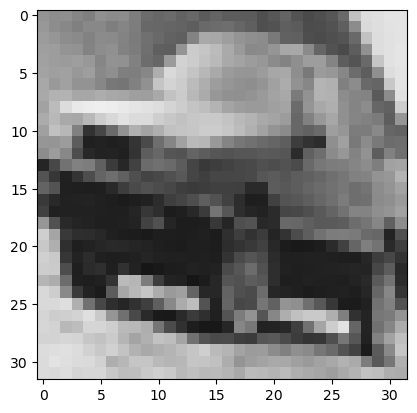

tensor([0, 4, 6, 0, 3, 6, 7, 7, 4, 3, 7, 7, 9, 1, 8, 2, 4, 2, 1, 1, 9, 4, 2, 5,
        6, 5, 0, 7, 1, 6, 4, 3, 3, 0, 4, 3, 4, 1, 8, 5, 9, 5, 8, 7, 9, 1, 1, 4,
        1, 4, 1, 2, 4, 9, 4, 4, 8, 5, 5, 4, 3, 4, 1, 6, 7, 3, 5, 4, 0, 3, 0, 5,
        8, 2, 2, 2, 6, 6, 6, 9, 4, 3, 3, 5, 0, 1, 1, 5, 7, 3, 4, 0, 1, 0, 1, 4,
        4, 5, 2, 9, 4, 8, 8, 4, 0, 1, 2, 0, 3, 5, 4, 2, 3, 3, 6, 9, 7, 9, 6, 9,
        4, 5, 5, 5, 0, 2, 5, 4, 3, 1, 0, 6, 3, 8, 4, 2, 0, 9, 4, 1, 5, 6, 7, 7,
        5, 9, 9, 1, 6, 5, 2, 3, 5, 9, 3, 7, 1, 0, 0, 1, 5, 4, 7, 9, 4, 4, 6, 4,
        6, 6, 5, 1, 6, 9, 7, 8, 0, 2, 8, 7], device='mps:0')
Loss: 7.895437240600586, Batch Num: 0/223, Accuracy:0.0, Epoch: 1
tensor(0.7985, device='mps:0')
tensor([8, 2, 8, 1, 5, 3, 4, 5, 6, 3, 7, 9, 9, 9, 0, 4, 7, 4, 0, 7, 3, 9, 8, 4,
        8, 1, 2, 6, 3, 7, 0, 2, 1, 2, 0, 4, 1, 6, 8, 2, 5, 8, 2, 0, 0, 2, 6, 6,
        3, 2, 3, 0, 3, 1, 9, 1, 5, 2, 4, 9, 4, 6, 5, 8, 6, 0, 1, 0, 6, 8, 2, 1,
        6, 4, 5, 2, 9, 2, 7, 7, 5, 0, 3, 7

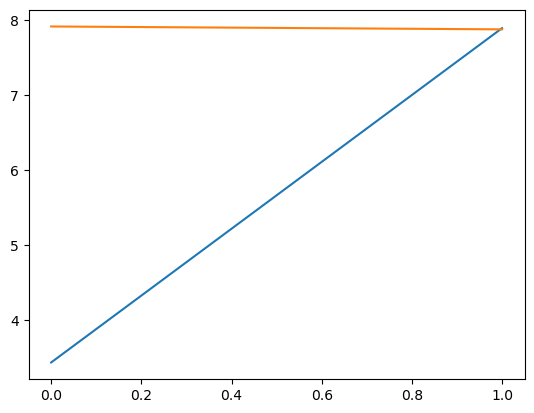

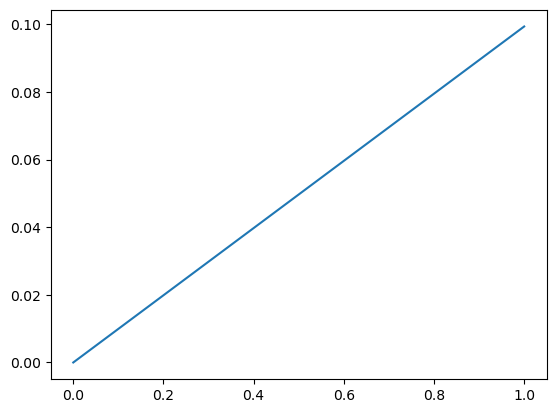

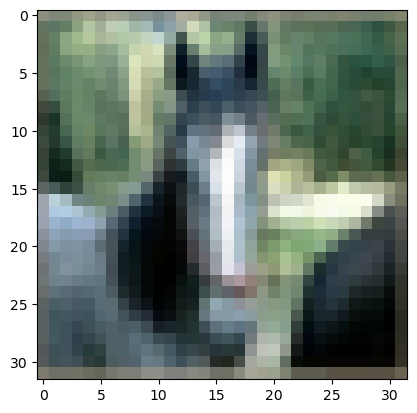

tensor([8, 3, 2, 8, 5, 3, 2, 0, 8, 9, 7, 7, 6, 4, 2, 0, 7, 6, 7, 6, 1, 3, 6, 2,
        2, 0, 7, 5, 7, 5, 6, 0, 1, 8, 6, 6, 9, 4, 6, 4, 7, 8, 1, 5, 8, 4, 5, 8,
        5, 2, 0, 1, 3, 7, 8, 0, 5, 0, 7, 6, 1, 7, 0, 0, 3, 2, 5, 8, 9, 9, 9, 8,
        9, 5, 6, 0, 3, 9, 0, 4, 1, 4, 4, 8, 0, 0, 6, 9, 2, 2, 6, 6, 6, 9, 9, 7,
        4, 9, 1, 1, 4, 3, 4, 0, 5, 6, 9, 8, 8, 4, 1, 4, 7, 8, 6, 4, 2, 8, 1, 9,
        1, 3, 3, 1, 8, 4, 5, 7, 1, 2, 4, 2, 1, 9, 5, 6, 5, 1, 5, 5, 3, 8, 0, 3,
        3, 0, 7, 8, 4, 1, 2, 1, 8, 6, 5, 6, 6, 4, 9, 5, 6, 2, 7, 1, 0, 0, 5, 5,
        8, 4, 3, 0, 8, 5, 8, 2, 4, 3, 6, 6], device='mps:0')
Loss: 7.8833231925964355, Batch Num: 0/223, Accuracy:0.0833333358168602, Epoch: 2
tensor(0.9184, device='mps:0')
tensor([1, 9, 2, 0, 9, 9, 4, 9, 4, 8, 3, 6, 0, 5, 1, 8, 7, 7, 2, 6, 5, 1, 6, 4,
        7, 7, 2, 1, 6, 5, 0, 7, 1, 9, 8, 9, 2, 3, 1, 6, 1, 7, 7, 8, 2, 3, 1, 6,
        0, 8, 3, 5, 3, 9, 9, 8, 4, 9, 1, 3, 6, 6, 5, 3, 5, 9, 2, 6, 9, 4, 4, 8,
        7, 5, 0, 0, 0, 9, 

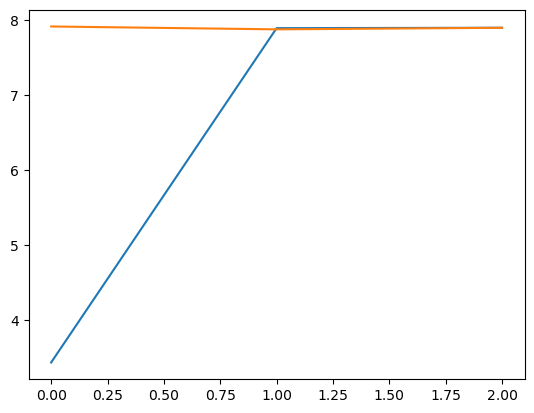

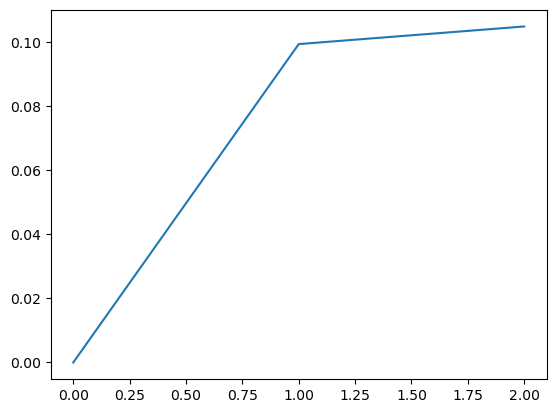

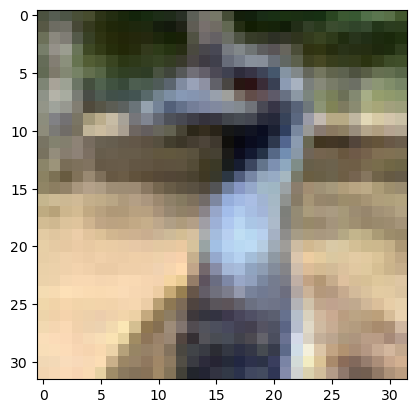

tensor([8, 2, 5, 3, 5, 3, 4, 7, 5, 7, 9, 9, 7, 3, 4, 6, 4, 6, 7, 2, 8, 2, 5, 4,
        3, 5, 2, 7, 9, 6, 3, 2, 7, 1, 3, 7, 1, 7, 0, 7, 4, 7, 2, 6, 6, 0, 1, 2,
        7, 8, 8, 1, 0, 3, 3, 9, 0, 2, 7, 8, 7, 9, 1, 9, 6, 0, 6, 6, 1, 9, 9, 2,
        4, 5, 9, 7, 8, 9, 8, 0, 4, 1, 8, 5, 4, 2, 1, 1, 2, 3, 8, 2, 9, 3, 3, 4,
        4, 0, 3, 8, 7, 9, 2, 5, 4, 3, 4, 9, 7, 2, 8, 1, 1, 3, 6, 1, 9, 7, 4, 5,
        1, 0, 0, 9, 0, 4, 7, 8, 6, 0, 9, 7, 5, 3, 7, 1, 9, 7, 1, 2, 8, 4, 7, 4,
        4, 3, 5, 1, 8, 7, 1, 5, 6, 9, 2, 2, 4, 2, 5, 4, 3, 0, 7, 4, 6, 4, 6, 8,
        9, 6, 4, 6, 3, 1, 9, 1, 7, 0, 2, 5], device='mps:0')
Loss: 7.914196014404297, Batch Num: 0/223, Accuracy:0.0833333358168602, Epoch: 3
tensor(1.4003, device='mps:0')
tensor([1, 5, 7, 2, 1, 0, 5, 6, 0, 1, 5, 8, 7, 7, 4, 1, 7, 0, 0, 7, 1, 0, 4, 1,
        7, 4, 7, 9, 8, 2, 0, 2, 4, 3, 6, 8, 8, 3, 3, 2, 3, 1, 1, 0, 0, 4, 4, 0,
        3, 8, 8, 1, 9, 4, 9, 0, 6, 6, 7, 3, 9, 5, 3, 6, 8, 5, 1, 9, 0, 2, 1, 4,
        9, 0, 0, 4, 2, 0, 4

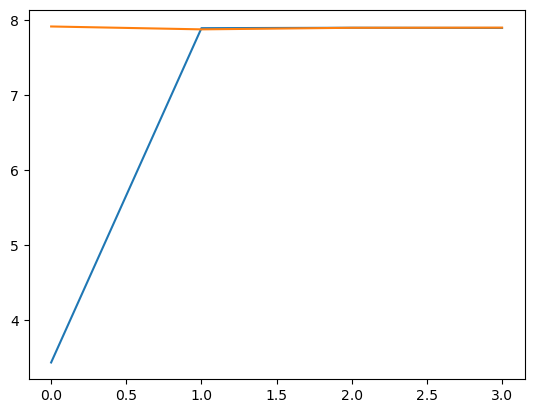

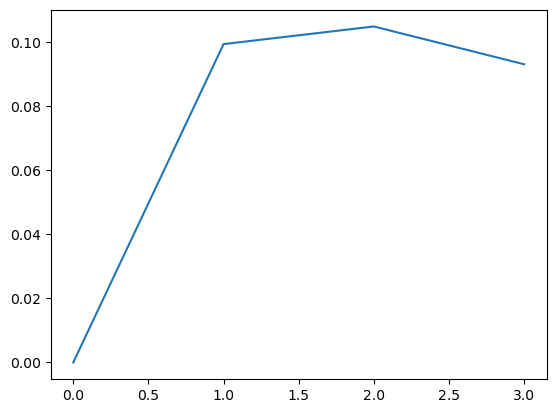

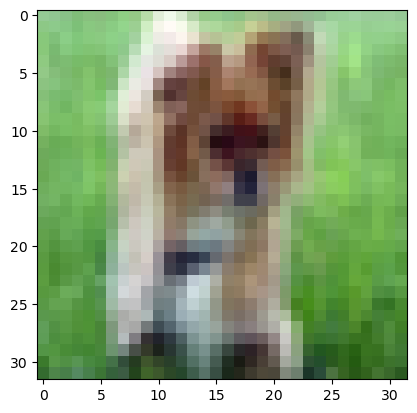

tensor([8, 4, 5, 1, 0, 7, 8, 2, 0, 0, 6, 6, 7, 0, 3, 2, 6, 8, 4, 2, 7, 4, 2, 3,
        8, 4, 8, 9, 0, 3, 5, 7, 1, 3, 1, 1, 0, 9, 9, 7, 1, 5, 8, 9, 0, 1, 5, 0,
        2, 7, 6, 4, 4, 9, 5, 5, 8, 4, 9, 4, 6, 2, 2, 9, 3, 4, 6, 0, 7, 9, 8, 3,
        8, 7, 6, 4, 9, 6, 9, 7, 9, 8, 0, 4, 4, 6, 4, 7, 6, 6, 0, 5, 4, 3, 9, 6,
        6, 3, 4, 8, 0, 8, 7, 5, 4, 2, 8, 8, 4, 7, 6, 2, 3, 6, 3, 0, 5, 2, 5, 4,
        7, 9, 2, 9, 8, 5, 5, 3, 6, 5, 9, 2, 8, 9, 3, 7, 9, 1, 2, 2, 6, 7, 3, 4,
        6, 3, 5, 6, 0, 3, 1, 8, 9, 8, 5, 3, 1, 0, 6, 8, 1, 0, 0, 2, 1, 2, 7, 6,
        4, 7, 6, 7, 3, 6, 4, 5, 4, 0, 8, 0], device='mps:0')
Loss: 7.898103713989258, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 4
tensor(1.0832, device='mps:0')
tensor([1, 7, 0, 9, 8, 3, 5, 7, 2, 1, 0, 9, 7, 4, 6, 7, 9, 2, 0, 4, 2, 4, 9, 6,
        5, 1, 9, 0, 8, 2, 3, 2, 3, 7, 6, 8, 5, 3, 1, 3, 1, 7, 5, 1, 9, 0, 3, 2,
        0, 0, 6, 3, 2, 5, 4, 9, 6, 1, 8, 3, 8, 8, 4, 2, 4, 9, 0, 5, 1, 3, 0, 0,
        5, 4, 6, 3, 6, 3, 

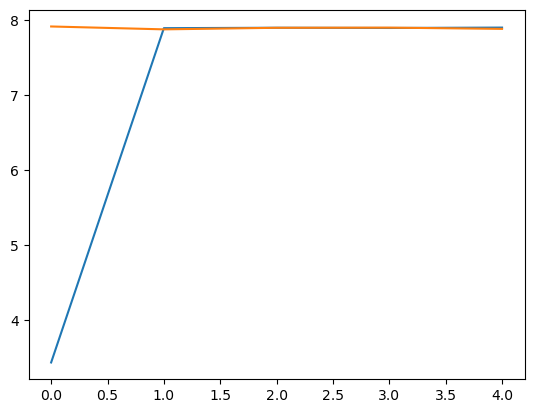

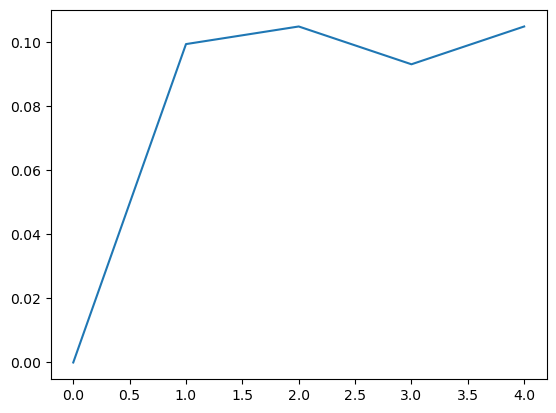

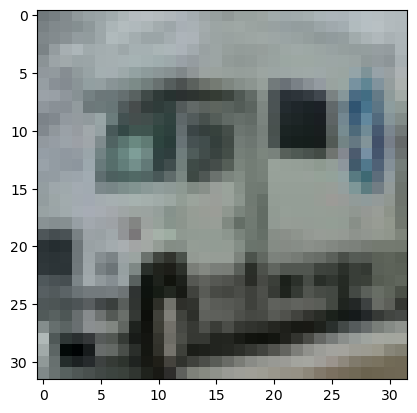

tensor([2, 9, 1, 3, 0, 4, 4, 5, 8, 8, 9, 5, 4, 3, 1, 0, 2, 3, 9, 4, 5, 9, 9, 9,
        8, 4, 8, 3, 4, 8, 8, 1, 0, 5, 0, 5, 9, 7, 8, 3, 7, 6, 2, 2, 2, 4, 4, 6,
        8, 8, 1, 4, 3, 9, 0, 4, 0, 4, 2, 5, 8, 0, 1, 3, 9, 0, 2, 7, 2, 5, 6, 8,
        4, 3, 1, 2, 4, 9, 7, 1, 9, 9, 1, 5, 3, 3, 4, 6, 1, 8, 1, 4, 4, 1, 5, 2,
        0, 3, 5, 6, 4, 8, 7, 5, 0, 6, 2, 7, 0, 6, 0, 1, 5, 1, 6, 7, 2, 9, 2, 4,
        6, 3, 7, 4, 3, 9, 2, 9, 8, 1, 8, 9, 1, 8, 8, 9, 0, 0, 8, 4, 0, 8, 1, 2,
        6, 2, 9, 8, 0, 9, 6, 7, 6, 1, 1, 3, 0, 1, 7, 9, 9, 4, 8, 2, 8, 5, 2, 8,
        3, 1, 3, 0, 8, 4, 1, 1, 7, 0, 9, 8], device='mps:0')
Loss: 7.893356800079346, Batch Num: 0/223, Accuracy:0.06666667014360428, Epoch: 5
tensor(1.3715, device='mps:0')
tensor([8, 0, 3, 3, 0, 9, 3, 0, 4, 6, 4, 8, 4, 2, 5, 4, 5, 7, 8, 8, 6, 1, 6, 2,
        8, 0, 9, 6, 9, 2, 9, 0, 3, 4, 5, 8, 5, 4, 3, 8, 5, 6, 7, 4, 0, 4, 3, 4,
        3, 9, 0, 2, 9, 7, 4, 5, 5, 8, 6, 9, 0, 8, 8, 7, 3, 3, 4, 6, 9, 3, 0, 4,
        2, 6, 0, 4, 7, 9, 

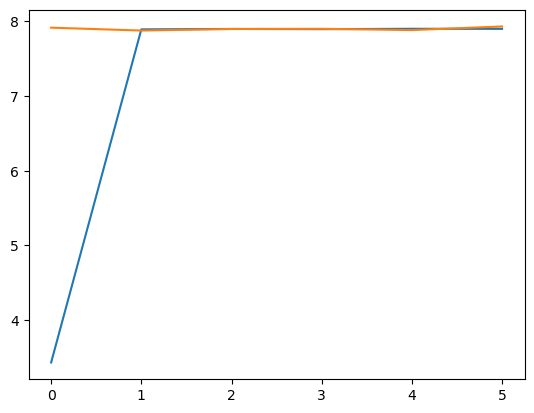

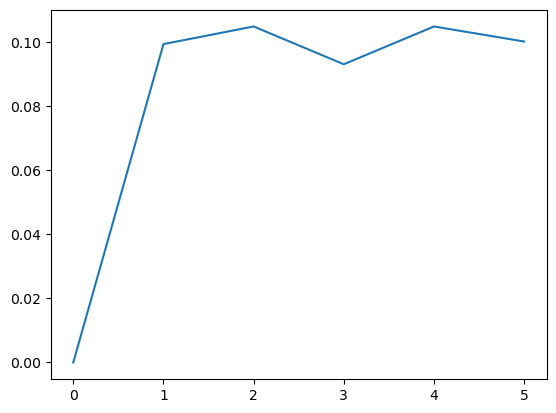

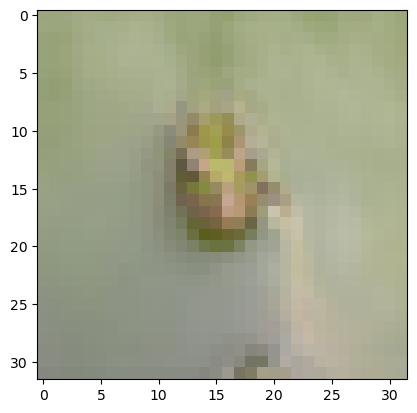

tensor([2, 5, 8, 5, 2, 4, 4, 6, 5, 3, 5, 6, 8, 6, 1, 6, 4, 5, 2, 0, 0, 0, 6, 1,
        2, 1, 3, 5, 9, 7, 5, 0, 1, 4, 2, 0, 2, 3, 8, 5, 3, 1, 6, 0, 8, 0, 1, 1,
        7, 0, 8, 4, 9, 0, 7, 0, 1, 9, 6, 2, 3, 7, 9, 5, 1, 7, 1, 4, 3, 2, 5, 4,
        2, 2, 4, 5, 9, 2, 8, 2, 6, 5, 3, 0, 0, 4, 0, 7, 7, 6, 3, 7, 9, 8, 0, 6,
        1, 4, 9, 0, 4, 7, 9, 2, 6, 5, 3, 0, 2, 1, 7, 0, 9, 2, 7, 5, 7, 4, 2, 3,
        5, 0, 7, 8, 9, 2, 5, 4, 2, 6, 8, 0, 5, 0, 6, 8, 6, 0, 1, 4, 9, 5, 1, 5,
        4, 2, 9, 7, 3, 7, 2, 4, 1, 0, 6, 5, 7, 8, 5, 4, 1, 7, 6, 3, 1, 7, 3, 6,
        8, 8, 9, 7, 2, 3, 5, 0, 1, 5, 5, 0], device='mps:0')
Loss: 7.945285320281982, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 6
tensor(1.6454, device='mps:0')
tensor([0, 8, 9, 4, 6, 3, 9, 4, 7, 8, 8, 0, 1, 5, 9, 6, 9, 9, 1, 1, 9, 8, 7, 4,
        9, 9, 9, 7, 9, 4, 1, 5, 9, 5, 1, 6, 1, 0, 4, 4, 0, 5, 5, 1, 3, 3, 1, 3,
        6, 9, 8, 2, 0, 5, 6, 1, 8, 8, 5, 7, 6, 0, 0, 8, 1, 4, 6, 5, 5, 3, 5, 3,
        6, 6, 5, 8, 9, 8, 

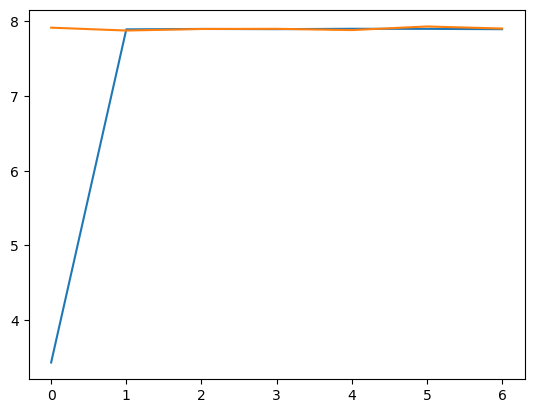

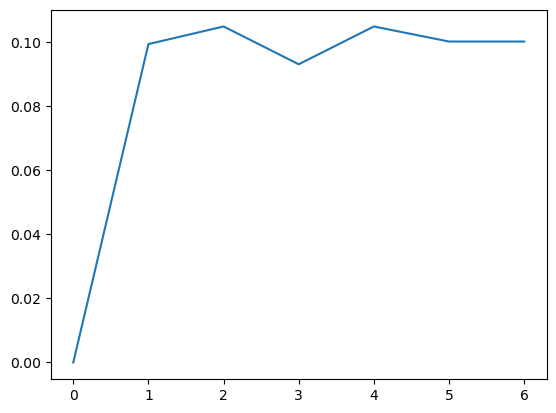

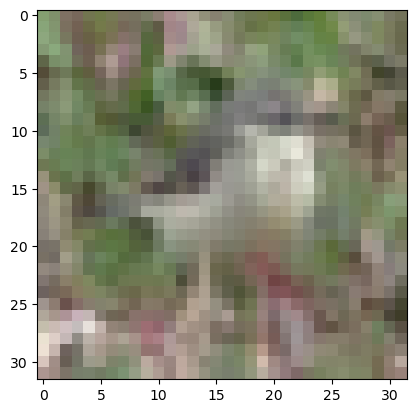

tensor([3, 5, 0, 2, 7, 4, 8, 7, 8, 7, 2, 2, 1, 8, 9, 7, 4, 5, 5, 5, 1, 1, 1, 4,
        1, 8, 9, 1, 8, 3, 3, 9, 9, 0, 8, 4, 3, 2, 4, 3, 5, 8, 1, 6, 6, 7, 4, 3,
        4, 8, 4, 1, 2, 5, 7, 4, 7, 9, 0, 5, 8, 8, 6, 0, 4, 5, 9, 9, 0, 9, 9, 9,
        9, 7, 2, 7, 3, 0, 2, 9, 9, 9, 4, 4, 9, 3, 4, 4, 2, 2, 4, 5, 5, 7, 2, 2,
        0, 2, 8, 1, 5, 8, 2, 4, 3, 8, 9, 9, 2, 1, 7, 5, 0, 0, 0, 1, 6, 2, 3, 7,
        5, 2, 6, 1, 1, 1, 8, 7, 5, 1, 2, 2, 4, 4, 0, 3, 9, 5, 4, 9, 0, 7, 1, 1,
        9, 5, 4, 9, 9, 2, 2, 8, 8, 5, 2, 4, 0, 8, 7, 8, 0, 1, 9, 8, 6, 1, 5, 5,
        7, 3, 6, 9, 0, 0, 6, 1, 4, 1, 0, 1], device='mps:0')
Loss: 7.897669792175293, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 7
tensor(1.3396, device='mps:0')
tensor([6, 1, 0, 7, 0, 5, 0, 6, 6, 6, 1, 0, 1, 8, 8, 7, 8, 7, 6, 2, 4, 7, 9, 3,
        9, 5, 7, 2, 8, 4, 0, 9, 7, 9, 3, 7, 8, 2, 3, 3, 6, 6, 8, 1, 1, 1, 9, 5,
        6, 3, 8, 1, 3, 6, 3, 0, 0, 4, 0, 5, 3, 3, 8, 9, 5, 2, 0, 5, 6, 1, 4, 1,
        3, 7, 5, 3, 7, 3, 

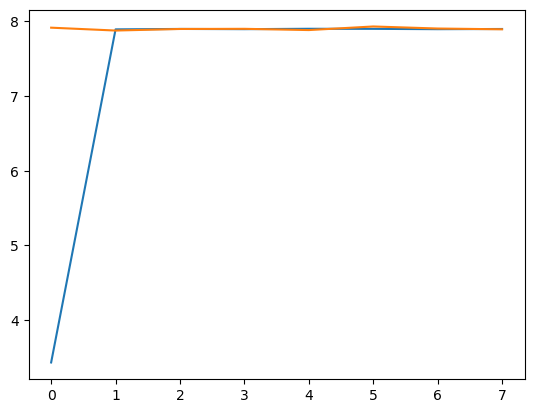

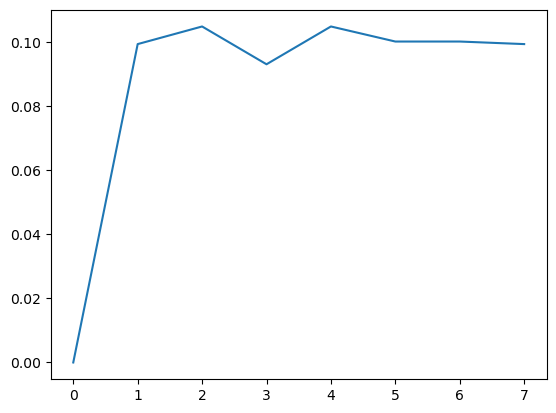

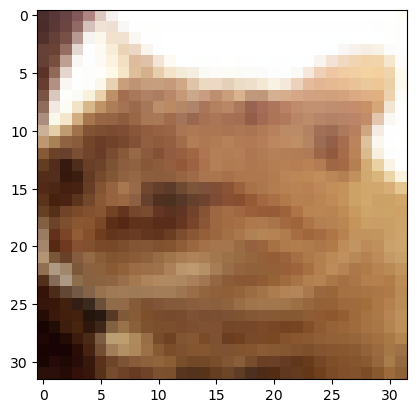

tensor([3, 2, 5, 4, 0, 1, 7, 8, 3, 9, 1, 7, 0, 6, 4, 0, 9, 1, 3, 6, 5, 0, 8, 3,
        9, 0, 0, 7, 7, 3, 4, 2, 3, 4, 5, 7, 9, 4, 0, 3, 4, 9, 6, 3, 8, 7, 5, 8,
        0, 2, 2, 6, 0, 3, 7, 5, 1, 6, 1, 3, 1, 8, 3, 3, 7, 2, 5, 3, 3, 6, 1, 5,
        4, 8, 4, 4, 5, 3, 9, 3, 5, 5, 5, 4, 7, 5, 5, 1, 4, 4, 6, 8, 4, 4, 7, 0,
        8, 4, 7, 4, 3, 8, 7, 0, 2, 7, 0, 2, 0, 2, 4, 4, 4, 8, 7, 2, 2, 8, 7, 4,
        9, 9, 4, 3, 3, 6, 8, 6, 2, 4, 2, 3, 3, 6, 2, 2, 9, 2, 5, 1, 8, 7, 2, 0,
        9, 5, 3, 9, 1, 4, 3, 4, 7, 1, 0, 4, 9, 3, 7, 7, 7, 9, 0, 2, 3, 2, 6, 8,
        0, 0, 5, 5, 7, 2, 0, 3, 9, 7, 7, 2], device='mps:0')
Loss: 7.883296489715576, Batch Num: 0/223, Accuracy:0.07777778059244156, Epoch: 8
tensor(1.1952, device='mps:0')
tensor([5, 4, 6, 0, 5, 3, 4, 7, 5, 8, 9, 3, 2, 6, 2, 5, 3, 3, 9, 7, 5, 6, 7, 8,
        5, 8, 6, 0, 4, 3, 7, 1, 2, 9, 0, 5, 1, 1, 0, 3, 8, 7, 9, 8, 6, 2, 8, 5,
        2, 6, 5, 6, 8, 7, 4, 5, 6, 5, 6, 1, 2, 3, 5, 1, 7, 8, 7, 1, 5, 9, 1, 4,
        3, 5, 9, 7, 3, 0, 

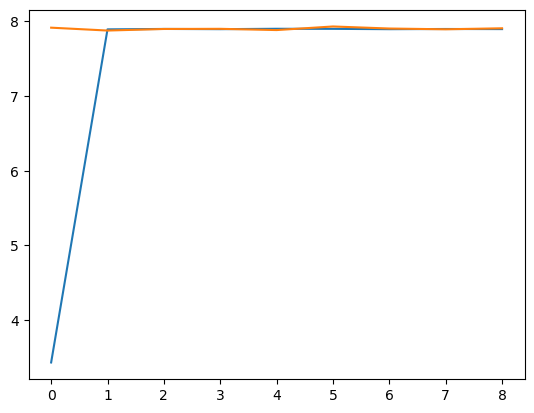

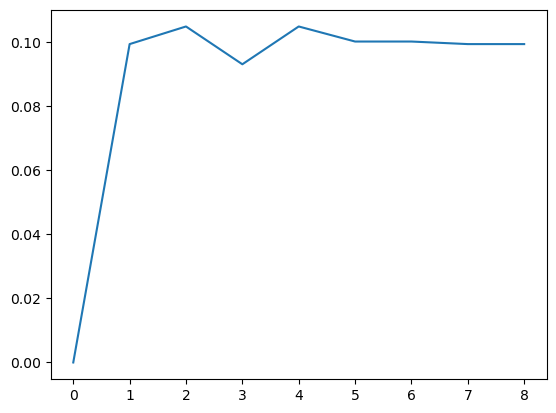

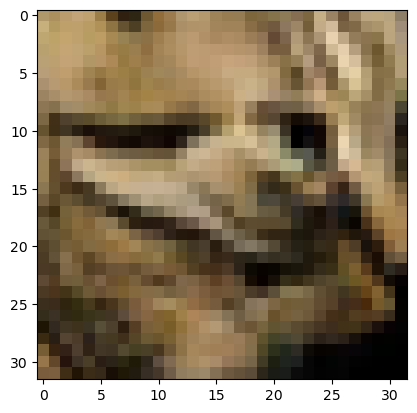

tensor([5, 6, 2, 7, 3, 3, 9, 7, 0, 1, 2, 2, 9, 2, 1, 7, 0, 8, 7, 2, 0, 1, 9, 3,
        6, 2, 9, 0, 1, 0, 7, 2, 6, 3, 4, 6, 8, 8, 1, 4, 0, 9, 0, 9, 1, 3, 4, 5,
        1, 6, 1, 1, 5, 7, 1, 4, 7, 4, 0, 3, 0, 6, 3, 6, 8, 9, 9, 2, 2, 6, 3, 3,
        1, 4, 0, 6, 4, 9, 1, 7, 2, 7, 3, 2, 5, 9, 4, 4, 8, 7, 6, 0, 8, 4, 5, 1,
        2, 3, 5, 8, 8, 1, 1, 1, 6, 9, 2, 9, 7, 1, 1, 6, 1, 1, 7, 0, 7, 6, 6, 8,
        1, 5, 0, 9, 3, 2, 6, 7, 8, 9, 8, 9, 9, 4, 8, 7, 3, 9, 6, 8, 5, 6, 0, 9,
        8, 1, 7, 8, 4, 3, 1, 6, 1, 7, 5, 7, 6, 1, 1, 2, 7, 9, 3, 6, 2, 4, 8, 4,
        6, 3, 1, 1, 5, 3, 5, 3, 6, 2, 6, 4], device='mps:0')
Loss: 7.9164862632751465, Batch Num: 0/223, Accuracy:0.10555555671453476, Epoch: 9
tensor(1.4588, device='mps:0')
tensor([6, 3, 6, 3, 6, 5, 8, 0, 2, 6, 6, 3, 3, 5, 1, 8, 9, 5, 8, 9, 1, 6, 4, 6,
        7, 2, 1, 0, 7, 9, 1, 1, 6, 3, 9, 7, 8, 0, 8, 6, 3, 3, 3, 1, 7, 4, 2, 0,
        1, 5, 1, 3, 7, 4, 0, 0, 4, 1, 1, 4, 6, 1, 8, 6, 1, 5, 0, 8, 9, 0, 6, 8,
        6, 5, 4, 3, 6, 8,

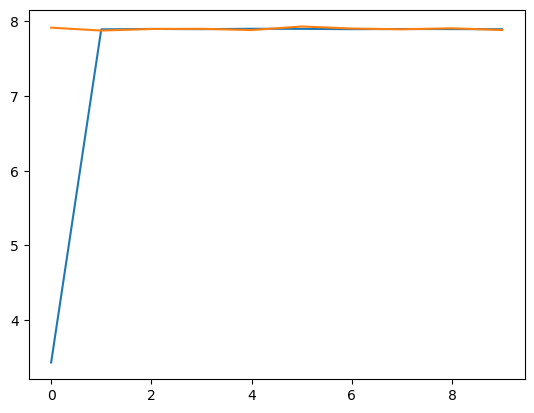

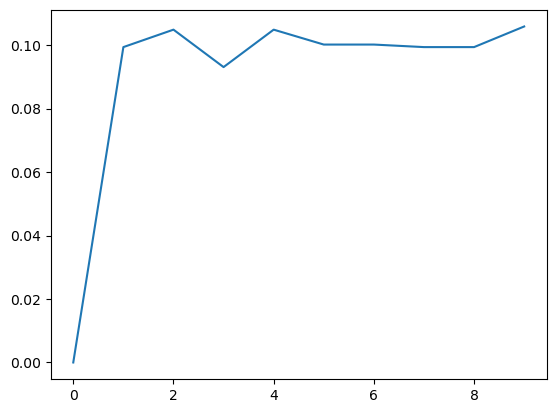

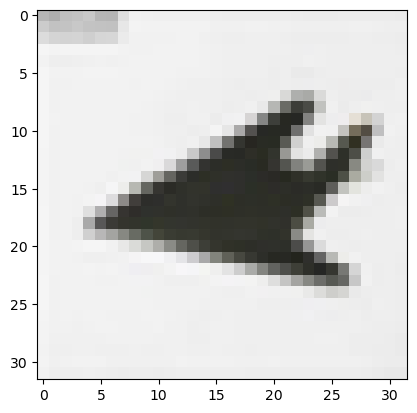

tensor([8, 0, 7, 9, 1, 2, 4, 4, 6, 9, 2, 4, 1, 7, 4, 3, 4, 6, 8, 6, 5, 6, 7, 8,
        0, 0, 7, 3, 3, 5, 6, 7, 1, 3, 4, 4, 2, 9, 3, 6, 5, 1, 7, 4, 9, 8, 5, 4,
        3, 2, 5, 1, 8, 1, 0, 4, 8, 5, 2, 3, 5, 3, 2, 1, 7, 7, 6, 4, 9, 1, 9, 8,
        8, 5, 0, 8, 6, 3, 3, 5, 0, 2, 6, 9, 2, 5, 7, 2, 4, 2, 1, 6, 0, 5, 2, 4,
        1, 8, 4, 6, 4, 6, 8, 0, 2, 9, 6, 9, 8, 4, 2, 4, 1, 4, 3, 8, 2, 5, 7, 5,
        2, 9, 3, 1, 0, 6, 6, 0, 6, 0, 6, 0, 9, 4, 6, 9, 4, 5, 5, 7, 5, 9, 6, 6,
        4, 5, 3, 0, 2, 8, 0, 7, 9, 9, 8, 1, 5, 2, 6, 6, 1, 4, 9, 1, 5, 9, 2, 8,
        6, 8, 5, 9, 5, 0, 8, 8, 5, 1, 3, 6], device='mps:0')
Loss: 7.882240295410156, Batch Num: 0/223, Accuracy:0.07777778059244156, Epoch: 10
tensor(1.0041, device='mps:0')
tensor([9, 7, 0, 0, 0, 8, 3, 7, 3, 4, 4, 5, 3, 8, 0, 9, 1, 4, 8, 6, 1, 4, 8, 4,
        8, 2, 3, 6, 3, 6, 4, 2, 6, 4, 9, 7, 0, 1, 6, 8, 3, 9, 8, 5, 0, 9, 8, 6,
        2, 3, 2, 6, 3, 4, 4, 6, 3, 3, 7, 4, 4, 6, 6, 5, 4, 0, 4, 4, 8, 8, 0, 9,
        4, 7, 2, 3, 5, 8,

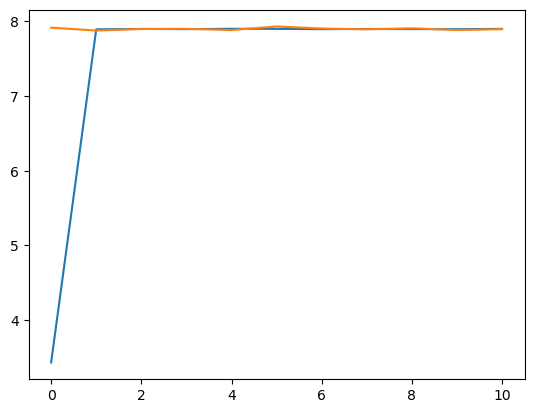

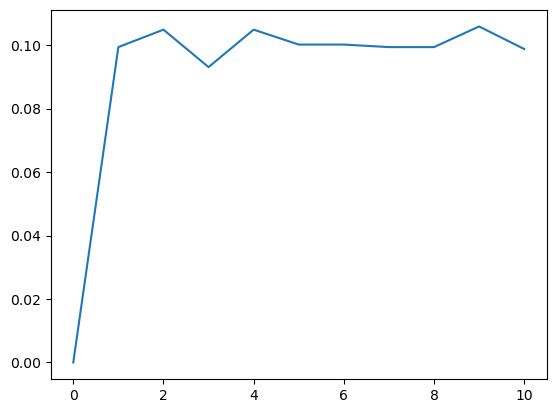

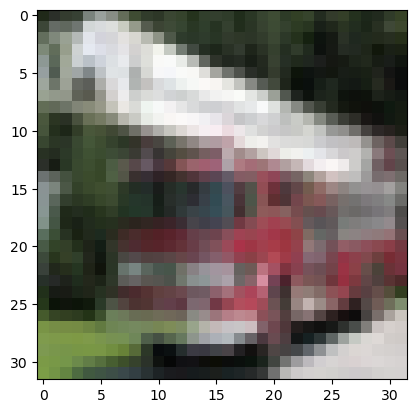

tensor([0, 8, 9, 6, 0, 5, 4, 0, 7, 7, 5, 5, 7, 9, 8, 5, 9, 4, 3, 7, 1, 7, 3, 5,
        6, 8, 1, 4, 7, 3, 5, 9, 0, 1, 4, 7, 3, 8, 8, 1, 1, 0, 9, 6, 3, 0, 7, 3,
        3, 6, 3, 4, 2, 4, 7, 3, 2, 3, 0, 6, 2, 7, 9, 5, 2, 8, 5, 1, 1, 2, 6, 6,
        9, 1, 1, 8, 7, 1, 9, 5, 1, 3, 2, 1, 4, 1, 5, 9, 4, 8, 5, 7, 9, 3, 5, 9,
        3, 8, 0, 8, 7, 2, 0, 1, 9, 1, 1, 0, 2, 0, 8, 6, 1, 9, 8, 5, 4, 8, 4, 7,
        7, 6, 8, 9, 4, 6, 2, 0, 1, 0, 8, 4, 2, 7, 0, 2, 0, 3, 7, 7, 1, 5, 2, 6,
        4, 9, 3, 8, 6, 2, 4, 3, 9, 3, 6, 5, 7, 9, 3, 6, 4, 3, 0, 7, 4, 0, 3, 1,
        7, 1, 1, 5, 4, 4, 6, 0, 9, 9, 6, 0], device='mps:0')
Loss: 7.888187885284424, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 11
tensor(0.8271, device='mps:0')
tensor([0, 4, 3, 3, 5, 2, 7, 1, 0, 7, 2, 6, 2, 9, 6, 6, 4, 8, 3, 7, 7, 0, 1, 7,
        0, 0, 0, 3, 1, 7, 7, 6, 5, 4, 7, 1, 3, 7, 0, 9, 9, 5, 8, 1, 1, 7, 6, 8,
        9, 1, 2, 2, 1, 0, 6, 6, 2, 3, 6, 0, 6, 6, 7, 4, 8, 6, 4, 5, 7, 7, 6, 6,
        1, 1, 4, 9, 7, 1,

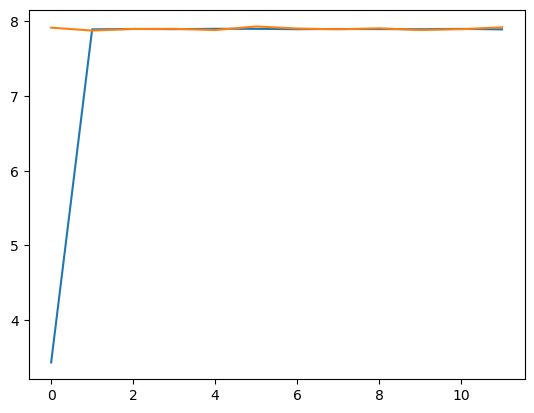

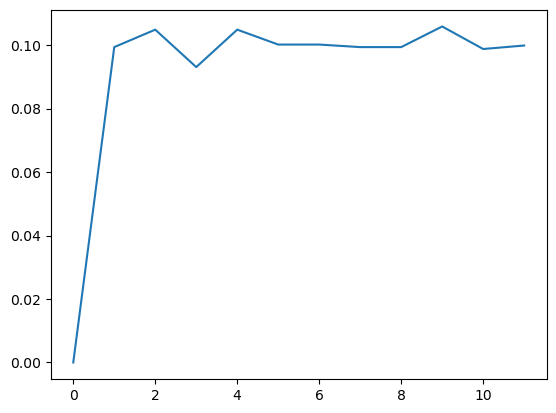

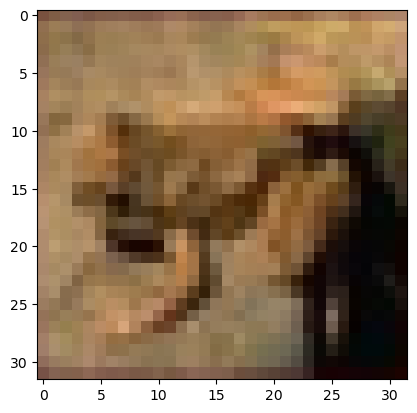

tensor([9, 4, 5, 2, 0, 2, 0, 8, 9, 4, 5, 4, 9, 2, 1, 6, 3, 0, 1, 7, 5, 0, 8, 7,
        8, 4, 4, 9, 3, 6, 3, 2, 9, 5, 2, 9, 0, 5, 9, 7, 7, 2, 6, 7, 2, 2, 2, 6,
        0, 5, 7, 1, 1, 0, 6, 2, 1, 4, 1, 8, 3, 2, 1, 7, 1, 1, 4, 3, 6, 2, 9, 2,
        9, 1, 8, 2, 1, 0, 2, 1, 4, 9, 0, 1, 2, 6, 0, 1, 0, 2, 1, 8, 1, 1, 6, 2,
        8, 1, 1, 1, 7, 8, 2, 4, 0, 8, 7, 5, 7, 2, 0, 3, 5, 5, 1, 9, 9, 9, 0, 9,
        9, 1, 9, 4, 1, 9, 9, 8, 0, 9, 2, 2, 6, 2, 9, 6, 1, 7, 1, 2, 1, 4, 7, 2,
        2, 0, 4, 9, 1, 8, 5, 0, 7, 5, 3, 1, 2, 0, 1, 2, 4, 7, 2, 0, 3, 0, 4, 7,
        0, 1, 2, 2, 1, 8, 1, 9, 0, 2, 6, 5], device='mps:0')
Loss: 7.913261413574219, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 12
tensor(2.1081, device='mps:0')
tensor([5, 1, 9, 5, 4, 2, 0, 5, 5, 1, 6, 8, 4, 4, 6, 8, 3, 8, 8, 1, 7, 9, 1, 2,
        6, 0, 5, 7, 4, 3, 4, 3, 9, 0, 3, 8, 0, 1, 8, 1, 5, 3, 3, 1, 7, 9, 3, 6,
        5, 0, 8, 1, 5, 7, 0, 9, 7, 7, 9, 8, 0, 1, 4, 4, 8, 0, 4, 1, 1, 5, 0, 2,
        4, 2, 3, 0, 4, 8,

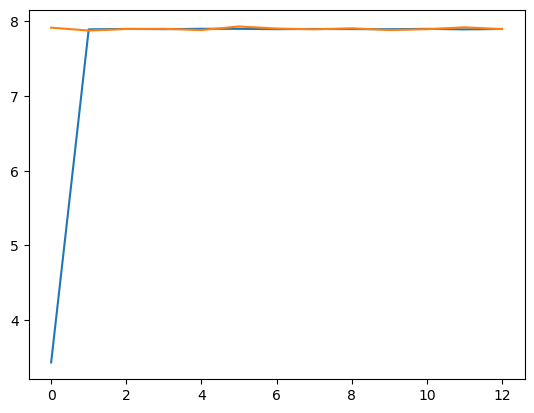

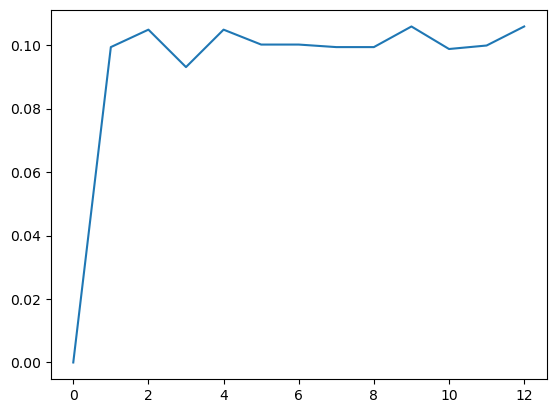

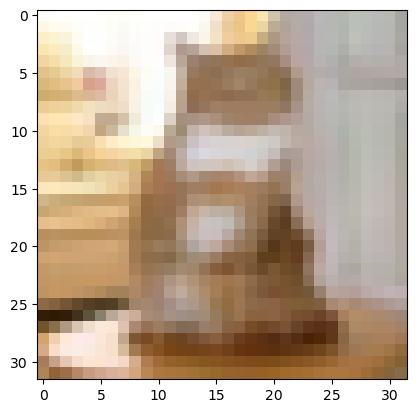

tensor([2, 6, 1, 3, 4, 1, 6, 3, 7, 3, 9, 8, 9, 6, 9, 8, 3, 0, 8, 6, 0, 9, 0, 1,
        2, 9, 8, 9, 7, 6, 2, 8, 4, 8, 7, 2, 8, 8, 1, 7, 7, 0, 6, 0, 8, 8, 5, 2,
        0, 9, 6, 6, 1, 0, 0, 8, 8, 7, 4, 3, 3, 6, 8, 1, 5, 5, 8, 7, 2, 3, 5, 4,
        9, 0, 2, 7, 8, 0, 1, 4, 1, 6, 7, 8, 3, 8, 7, 8, 0, 3, 3, 7, 7, 4, 2, 7,
        1, 4, 1, 8, 6, 6, 3, 2, 6, 5, 2, 3, 1, 7, 0, 3, 5, 1, 1, 8, 3, 7, 5, 3,
        7, 8, 1, 9, 2, 4, 9, 2, 1, 4, 7, 6, 2, 3, 8, 0, 0, 5, 0, 4, 6, 3, 5, 1,
        1, 5, 5, 2, 4, 2, 6, 1, 9, 6, 2, 9, 1, 1, 9, 8, 9, 2, 5, 5, 3, 5, 3, 3,
        8, 5, 6, 4, 4, 8, 4, 3, 1, 1, 5, 1], device='mps:0')
Loss: 7.904550552368164, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 13
tensor(1.1834, device='mps:0')
tensor([3, 9, 1, 6, 4, 8, 6, 6, 3, 6, 0, 3, 5, 8, 2, 8, 1, 3, 7, 5, 2, 8, 8, 2,
        2, 9, 6, 1, 9, 9, 8, 4, 8, 1, 7, 8, 1, 5, 7, 2, 5, 2, 7, 4, 6, 1, 6, 0,
        9, 8, 5, 3, 0, 8, 1, 8, 1, 4, 4, 9, 3, 0, 7, 0, 4, 9, 6, 6, 4, 1, 7, 6,
        6, 7, 8, 8, 4, 6,

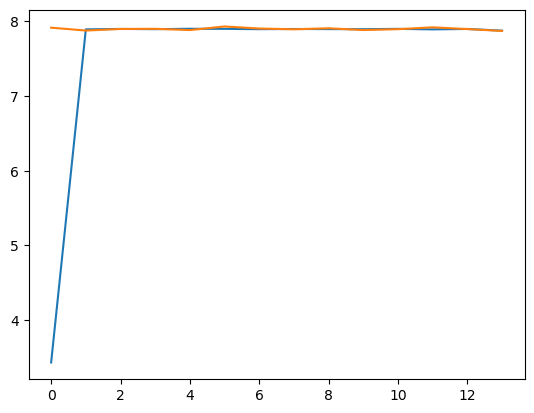

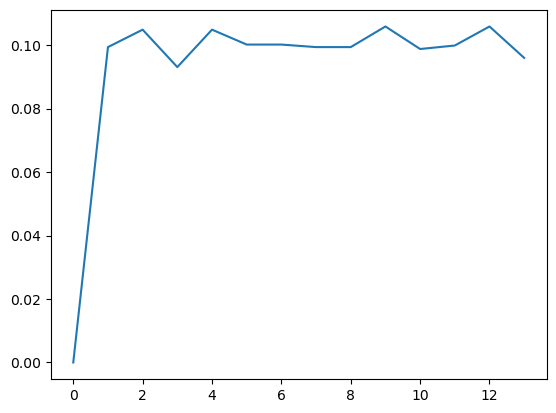

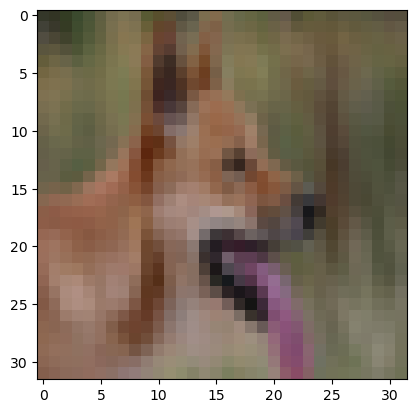

tensor([5, 9, 3, 0, 5, 2, 8, 0, 7, 4, 7, 2, 1, 3, 7, 8, 4, 5, 6, 9, 0, 7, 1, 9,
        7, 4, 5, 0, 0, 0, 0, 9, 4, 4, 8, 2, 4, 2, 3, 8, 0, 1, 0, 5, 2, 3, 5, 1,
        6, 0, 5, 7, 5, 1, 7, 2, 6, 8, 5, 6, 8, 5, 3, 9, 8, 4, 6, 5, 1, 1, 9, 3,
        7, 4, 0, 6, 5, 9, 8, 3, 9, 7, 0, 5, 5, 2, 9, 5, 1, 3, 6, 0, 3, 8, 5, 8,
        3, 8, 4, 3, 8, 0, 7, 7, 2, 6, 4, 0, 1, 1, 4, 1, 8, 2, 6, 4, 4, 8, 7, 6,
        9, 5, 2, 7, 2, 7, 8, 6, 6, 9, 5, 8, 5, 7, 6, 7, 7, 8, 6, 4, 0, 1, 3, 3,
        0, 2, 4, 9, 1, 2, 8, 7, 1, 5, 4, 7, 9, 0, 5, 9, 0, 2, 7, 1, 2, 3, 2, 1,
        2, 5, 9, 4, 1, 8, 9, 7, 0, 1, 7, 3], device='mps:0')
Loss: 7.8697428703308105, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 14
tensor(0.5982, device='mps:0')
tensor([9, 8, 1, 1, 4, 5, 4, 8, 9, 8, 9, 1, 8, 7, 1, 7, 5, 9, 2, 8, 3, 5, 8, 3,
        9, 6, 6, 4, 2, 4, 6, 3, 5, 5, 9, 1, 8, 0, 2, 3, 3, 2, 7, 4, 3, 5, 7, 6,
        8, 0, 1, 1, 1, 4, 7, 7, 8, 2, 8, 3, 8, 7, 7, 7, 3, 5, 0, 8, 8, 7, 4, 7,
        0, 2, 5, 9, 3, 1

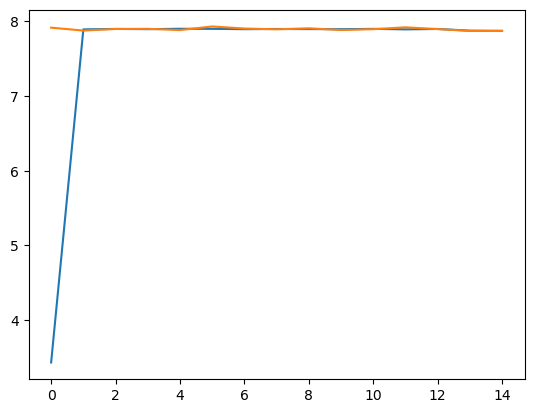

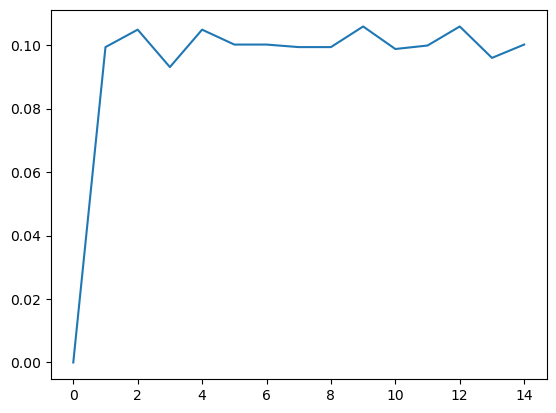

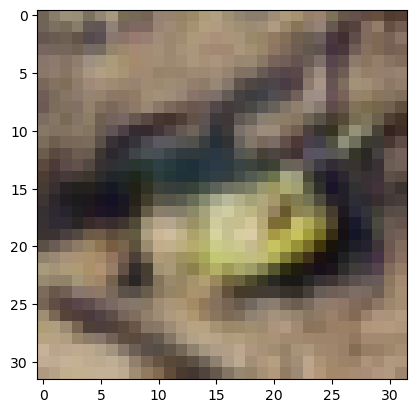

tensor([3, 4, 7, 2, 0, 7, 7, 2, 4, 4, 3, 6, 9, 4, 1, 8, 1, 4, 9, 2, 5, 7, 0, 2,
        6, 9, 5, 6, 3, 7, 5, 1, 8, 5, 7, 3, 1, 0, 6, 3, 6, 9, 2, 8, 3, 0, 3, 0,
        9, 1, 4, 5, 6, 6, 4, 0, 8, 6, 4, 3, 8, 7, 7, 2, 2, 7, 5, 7, 0, 5, 8, 2,
        8, 5, 3, 8, 2, 1, 7, 7, 6, 9, 7, 9, 5, 0, 1, 7, 4, 9, 5, 4, 2, 6, 3, 1,
        1, 2, 4, 0, 0, 3, 6, 6, 3, 8, 0, 9, 4, 7, 1, 2, 1, 3, 3, 6, 0, 9, 1, 2,
        9, 6, 6, 8, 2, 4, 7, 7, 2, 9, 2, 8, 9, 6, 4, 8, 1, 7, 5, 3, 3, 7, 8, 2,
        9, 0, 3, 5, 8, 2, 4, 5, 7, 7, 3, 2, 6, 3, 2, 4, 2, 4, 8, 2, 7, 5, 8, 8,
        5, 6, 2, 0, 0, 8, 9, 0, 4, 0, 7, 3], device='mps:0')
Loss: 7.865265369415283, Batch Num: 0/223, Accuracy:0.12777778506278992, Epoch: 15
tensor(0.6227, device='mps:0')
tensor([5, 8, 1, 0, 5, 1, 9, 4, 7, 2, 4, 7, 0, 4, 7, 2, 5, 5, 2, 4, 6, 5, 5, 6,
        2, 1, 3, 4, 2, 4, 7, 4, 8, 9, 7, 3, 0, 9, 8, 1, 5, 1, 5, 7, 1, 4, 0, 2,
        0, 0, 3, 7, 2, 5, 9, 2, 2, 4, 8, 4, 3, 5, 3, 7, 0, 1, 0, 4, 6, 8, 2, 8,
        7, 6, 8, 9, 4, 3,

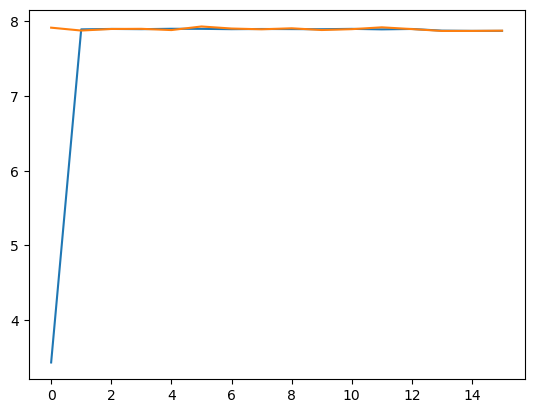

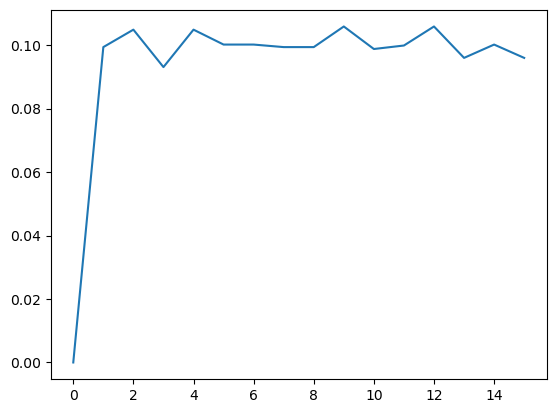

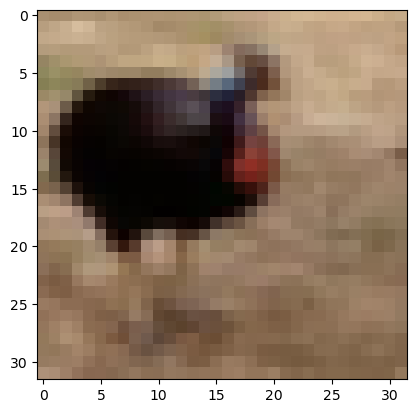

tensor([0, 7, 7, 9, 4, 4, 3, 8, 4, 0, 3, 7, 8, 6, 9, 3, 3, 3, 6, 1, 1, 2, 6, 2,
        0, 3, 4, 9, 0, 2, 1, 7, 7, 5, 9, 6, 9, 1, 9, 2, 8, 4, 6, 1, 8, 2, 9, 8,
        7, 8, 2, 8, 9, 1, 1, 7, 2, 3, 9, 2, 4, 4, 6, 8, 5, 8, 9, 2, 2, 3, 9, 0,
        4, 6, 1, 6, 1, 3, 8, 2, 4, 7, 6, 1, 0, 1, 1, 4, 0, 1, 3, 0, 0, 2, 9, 7,
        5, 7, 3, 1, 9, 5, 4, 0, 9, 8, 9, 7, 7, 6, 2, 0, 9, 3, 1, 7, 6, 6, 0, 2,
        4, 5, 6, 5, 6, 5, 1, 0, 3, 7, 7, 2, 8, 0, 0, 0, 0, 7, 0, 5, 8, 1, 1, 7,
        9, 6, 2, 6, 1, 2, 7, 4, 8, 4, 2, 8, 9, 5, 8, 3, 0, 1, 8, 9, 4, 1, 1, 5,
        8, 5, 4, 0, 6, 2, 7, 8, 5, 8, 5, 0], device='mps:0')
Loss: 7.870035648345947, Batch Num: 0/223, Accuracy:0.10555555671453476, Epoch: 16
tensor(0.6807, device='mps:0')
tensor([7, 8, 1, 4, 8, 5, 5, 8, 6, 0, 0, 0, 8, 8, 0, 0, 2, 8, 3, 5, 4, 4, 3, 9,
        4, 4, 9, 8, 3, 7, 2, 2, 1, 8, 9, 9, 6, 9, 7, 7, 8, 0, 3, 0, 6, 3, 4, 8,
        6, 6, 7, 8, 2, 6, 1, 7, 8, 9, 0, 6, 5, 3, 8, 3, 1, 0, 8, 3, 5, 2, 9, 6,
        3, 1, 5, 3, 7, 9,

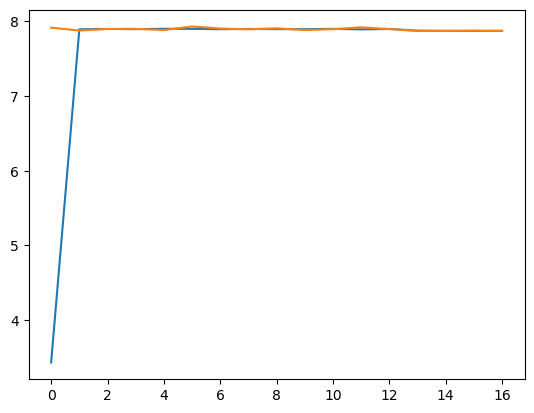

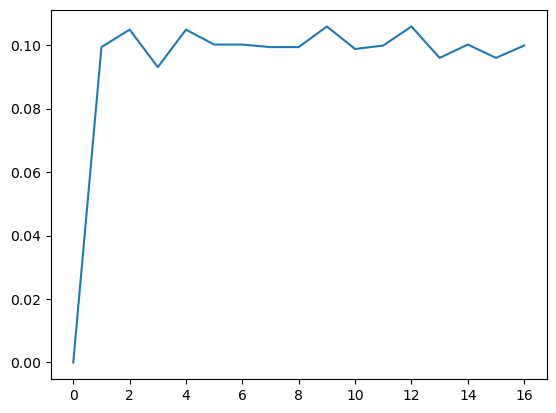

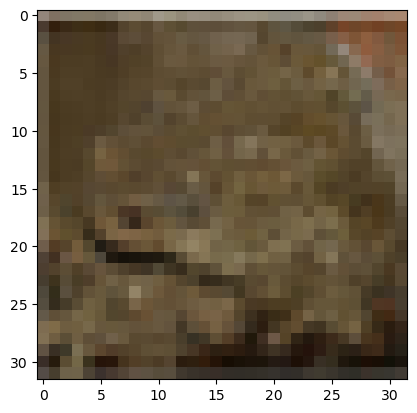

tensor([3, 2, 6, 0, 6, 5, 5, 8, 3, 8, 9, 7, 6, 2, 5, 5, 4, 7, 6, 2, 7, 3, 5, 4,
        9, 6, 2, 2, 5, 3, 2, 7, 7, 1, 6, 1, 8, 3, 9, 2, 4, 8, 8, 8, 1, 0, 4, 0,
        5, 1, 4, 6, 2, 3, 1, 6, 2, 4, 5, 3, 3, 7, 0, 1, 2, 8, 6, 8, 5, 7, 9, 9,
        3, 8, 3, 3, 6, 8, 5, 7, 1, 4, 3, 2, 6, 8, 0, 2, 1, 4, 7, 4, 0, 3, 8, 4,
        8, 9, 8, 1, 0, 9, 7, 1, 1, 1, 8, 1, 1, 0, 4, 2, 7, 7, 8, 1, 9, 2, 8, 7,
        6, 5, 0, 1, 5, 1, 3, 1, 7, 9, 6, 9, 5, 6, 3, 1, 6, 4, 7, 1, 4, 3, 2, 6,
        7, 5, 4, 0, 3, 8, 5, 5, 3, 5, 8, 2, 5, 7, 7, 7, 1, 6, 0, 6, 7, 7, 8, 4,
        4, 0, 2, 4, 0, 0, 3, 8, 6, 5, 5, 6], device='mps:0')
Loss: 7.873262405395508, Batch Num: 0/223, Accuracy:0.07777778059244156, Epoch: 17
tensor(0.8983, device='mps:0')
tensor([5, 2, 1, 8, 3, 5, 2, 2, 5, 3, 2, 9, 5, 5, 3, 7, 4, 6, 4, 6, 0, 6, 0, 7,
        5, 9, 4, 4, 4, 4, 5, 7, 3, 0, 0, 8, 4, 8, 8, 9, 8, 7, 3, 6, 5, 5, 0, 9,
        4, 9, 7, 8, 2, 6, 3, 2, 7, 8, 5, 3, 0, 1, 9, 8, 8, 5, 5, 9, 4, 9, 3, 3,
        9, 1, 9, 8, 7, 0,

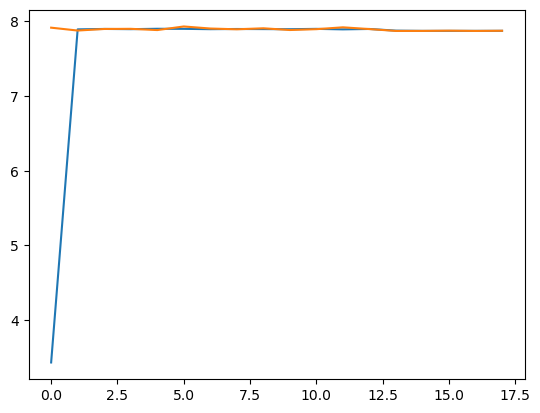

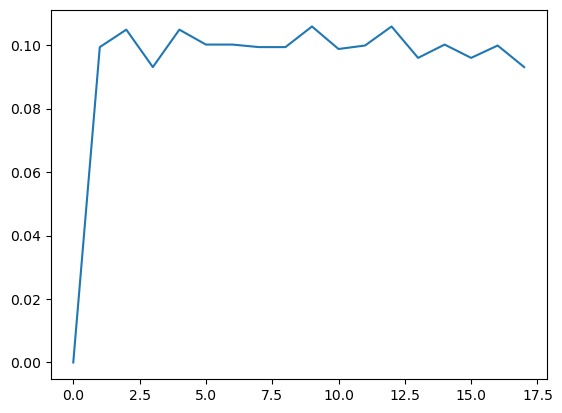

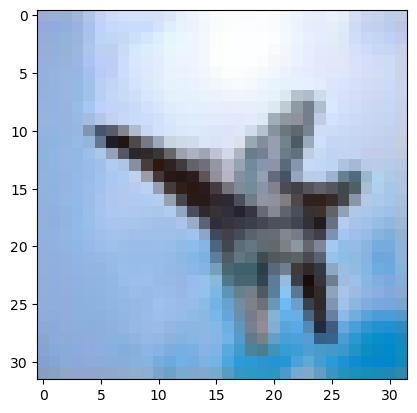

tensor([5, 8, 7, 1, 0, 9, 5, 1, 8, 6, 7, 7, 8, 5, 7, 2, 4, 0, 8, 9, 9, 5, 5, 9,
        9, 8, 8, 5, 0, 6, 2, 0, 4, 5, 7, 4, 9, 2, 8, 9, 3, 2, 9, 3, 7, 7, 3, 2,
        7, 5, 5, 0, 2, 3, 1, 3, 2, 5, 3, 3, 1, 7, 9, 0, 3, 6, 2, 9, 9, 3, 7, 8,
        2, 7, 5, 1, 9, 3, 1, 0, 5, 3, 6, 2, 7, 8, 0, 0, 6, 8, 9, 7, 4, 9, 3, 8,
        6, 6, 5, 5, 0, 4, 2, 9, 5, 1, 9, 4, 2, 0, 7, 3, 7, 2, 6, 1, 6, 9, 1, 1,
        4, 1, 9, 7, 0, 0, 0, 2, 0, 6, 4, 3, 4, 9, 4, 5, 2, 5, 4, 9, 6, 4, 7, 8,
        3, 8, 8, 7, 1, 3, 4, 3, 5, 3, 0, 5, 6, 2, 9, 4, 6, 0, 1, 5, 5, 4, 3, 8,
        4, 9, 7, 9, 7, 0, 5, 0, 7, 1, 4, 6], device='mps:0')
Loss: 7.872298240661621, Batch Num: 0/223, Accuracy:0.09444444626569748, Epoch: 18
tensor(0.8089, device='mps:0')
tensor([8, 1, 5, 7, 3, 9, 9, 5, 5, 2, 6, 8, 7, 8, 6, 2, 3, 8, 1, 7, 4, 2, 2, 2,
        8, 3, 1, 2, 3, 4, 2, 8, 5, 6, 8, 6, 8, 4, 4, 3, 6, 3, 4, 1, 0, 9, 6, 5,
        1, 4, 4, 9, 3, 6, 5, 4, 9, 4, 8, 7, 2, 1, 7, 2, 0, 0, 1, 2, 1, 5, 9, 1,
        9, 0, 2, 3, 5, 0,

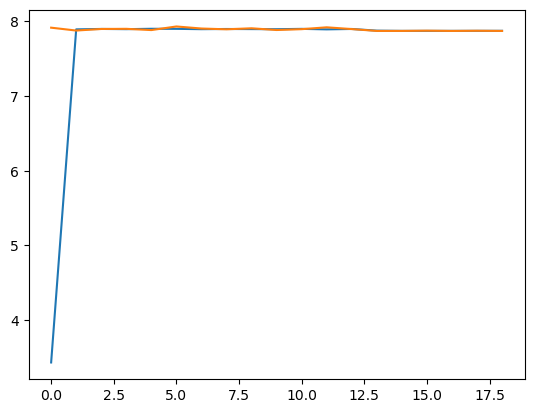

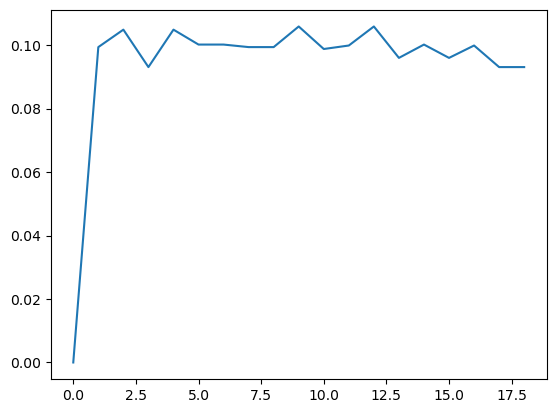

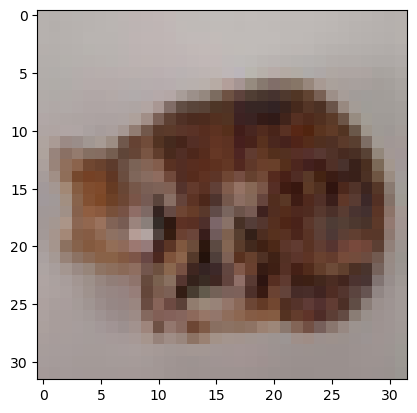

tensor([8, 7, 1, 6, 7, 4, 9, 8, 6, 8, 9, 6, 4, 8, 6, 9, 6, 2, 7, 7, 5, 5, 0, 8,
        5, 3, 7, 6, 0, 3, 9, 2, 1, 1, 4, 3, 9, 4, 4, 6, 3, 2, 5, 4, 5, 8, 7, 0,
        5, 8, 9, 3, 1, 9, 4, 7, 7, 6, 9, 8, 4, 2, 2, 3, 2, 5, 0, 0, 8, 0, 8, 2,
        0, 1, 7, 1, 1, 0, 5, 5, 0, 3, 1, 1, 5, 3, 3, 2, 0, 0, 9, 3, 8, 7, 7, 8,
        3, 7, 2, 6, 7, 3, 4, 9, 0, 5, 9, 1, 4, 5, 8, 0, 0, 8, 0, 8, 8, 6, 1, 3,
        6, 0, 7, 7, 2, 1, 5, 8, 2, 5, 1, 7, 6, 3, 5, 1, 1, 5, 9, 5, 9, 7, 5, 5,
        0, 0, 6, 5, 9, 4, 9, 2, 9, 2, 4, 8, 6, 4, 0, 0, 4, 2, 1, 6, 9, 8, 0, 9,
        8, 6, 6, 8, 3, 1, 4, 1, 9, 2, 1, 8], device='mps:0')
Loss: 7.878238201141357, Batch Num: 0/223, Accuracy:0.0833333358168602, Epoch: 19
tensor(0.8286, device='mps:0')
tensor([5, 1, 0, 4, 4, 7, 3, 3, 0, 5, 6, 3, 1, 2, 1, 8, 1, 6, 9, 9, 8, 7, 1, 9,
        8, 9, 9, 2, 4, 6, 0, 2, 0, 8, 1, 3, 0, 7, 0, 4, 5, 2, 3, 1, 7, 1, 3, 4,
        5, 1, 8, 2, 9, 4, 4, 9, 5, 6, 6, 4, 4, 3, 0, 0, 8, 2, 3, 0, 2, 6, 3, 8,
        3, 2, 7, 1, 0, 9, 

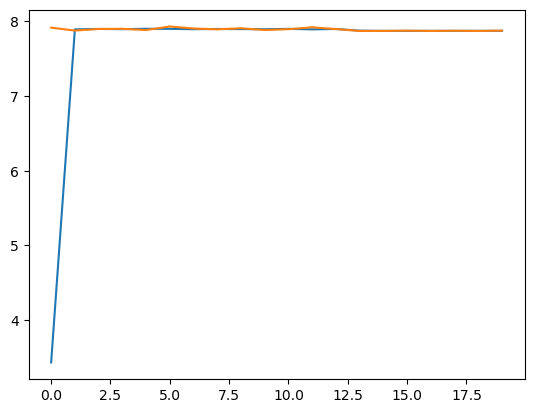

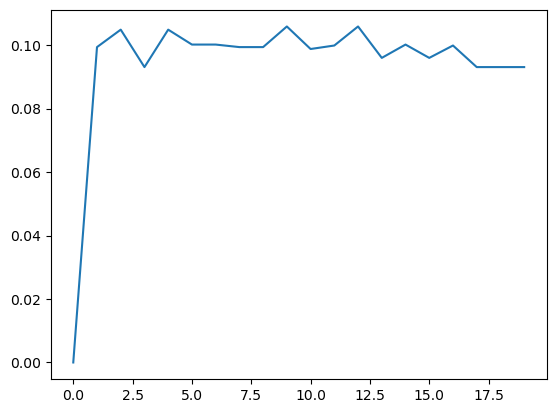

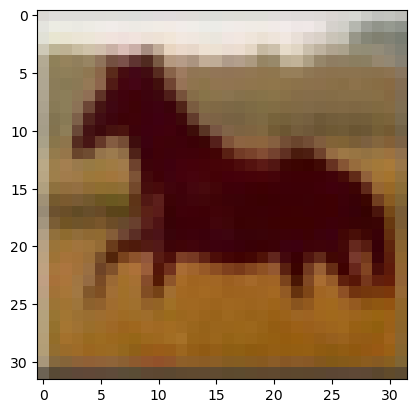

tensor([9, 4, 9, 2, 6, 2, 4, 3, 8, 1, 4, 7, 8, 7, 8, 6, 7, 9, 6, 5, 3, 3, 4, 7,
        5, 3, 8, 7, 4, 5, 2, 6, 6, 3, 9, 7, 7, 7, 4, 8, 7, 3, 3, 1, 5, 6, 1, 9,
        4, 1, 4, 8, 3, 6, 1, 5, 4, 7, 3, 7, 3, 9, 7, 0, 9, 7, 1, 7, 1, 4, 0, 9,
        9, 2, 7, 4, 6, 9, 0, 4, 4, 3, 2, 3, 0, 6, 1, 9, 8, 3, 0, 8, 7, 6, 9, 5,
        8, 2, 6, 7, 2, 0, 2, 0, 5, 4, 1, 6, 5, 1, 5, 0, 4, 3, 5, 2, 4, 5, 7, 0,
        5, 9, 1, 6, 8, 8, 2, 4, 2, 2, 4, 0, 3, 2, 8, 5, 4, 5, 7, 7, 5, 1, 5, 3,
        8, 4, 5, 3, 1, 1, 5, 4, 4, 6, 3, 7, 8, 9, 2, 8, 6, 3, 2, 1, 6, 5, 5, 5,
        1, 0, 7, 6, 2, 0, 7, 1, 4, 3, 5, 7], device='mps:0')
Loss: 7.868517875671387, Batch Num: 0/223, Accuracy:0.12777778506278992, Epoch: 20
tensor(0.8990, device='mps:0')
tensor([1, 9, 4, 2, 2, 0, 7, 8, 7, 9, 0, 6, 0, 8, 8, 1, 6, 2, 0, 4, 5, 5, 5, 7,
        8, 9, 8, 4, 8, 0, 0, 0, 1, 4, 1, 5, 8, 1, 3, 3, 3, 8, 1, 4, 2, 2, 7, 3,
        3, 6, 2, 2, 5, 9, 2, 8, 7, 1, 7, 9, 3, 6, 1, 6, 9, 1, 5, 2, 1, 1, 2, 9,
        8, 6, 3, 5, 6, 7,

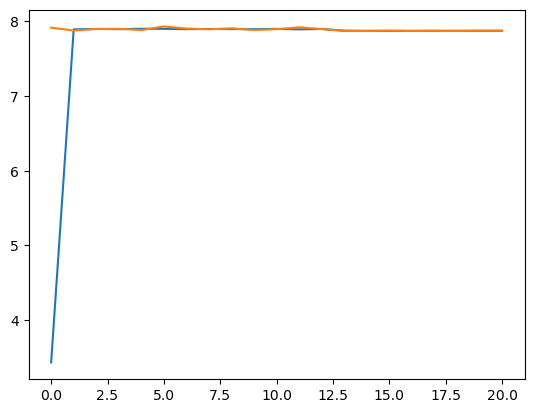

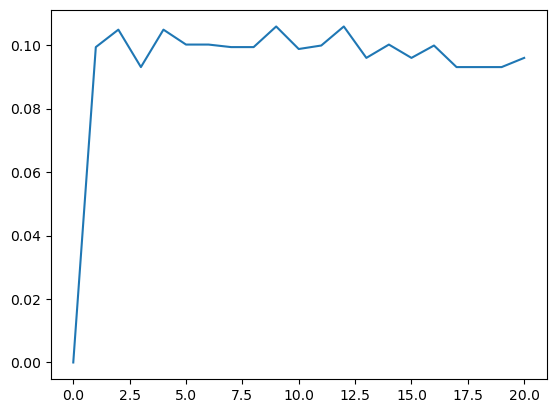

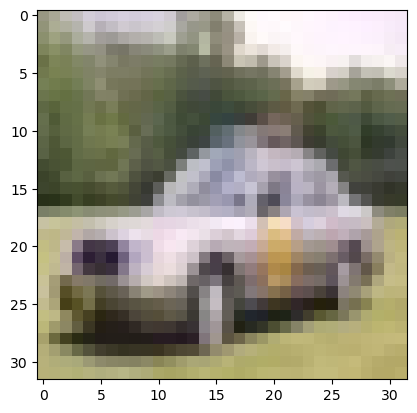

tensor([3, 5, 9, 1, 6, 3, 0, 4, 4, 6, 8, 5, 3, 5, 1, 4, 1, 1, 5, 4, 1, 8, 2, 4,
        2, 2, 6, 5, 4, 6, 2, 7, 1, 2, 1, 4, 7, 4, 8, 3, 5, 5, 5, 7, 9, 1, 0, 6,
        3, 3, 2, 2, 7, 2, 7, 3, 1, 4, 4, 7, 8, 9, 7, 7, 6, 5, 3, 0, 4, 9, 2, 2,
        2, 7, 1, 9, 5, 5, 3, 9, 5, 0, 8, 6, 4, 9, 9, 0, 4, 9, 7, 5, 4, 9, 2, 4,
        2, 1, 8, 5, 9, 1, 4, 8, 8, 8, 2, 9, 9, 8, 7, 5, 9, 7, 0, 7, 3, 8, 4, 1,
        2, 0, 2, 5, 1, 5, 6, 8, 4, 7, 1, 9, 4, 6, 5, 1, 2, 7, 2, 8, 7, 4, 1, 6,
        4, 5, 2, 0, 8, 9, 9, 9, 5, 2, 5, 7, 4, 5, 8, 0, 0, 2, 4, 6, 9, 8, 4, 7,
        7, 8, 6, 7, 9, 0, 2, 3, 2, 6, 8, 2], device='mps:0')
Loss: 7.869953155517578, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 21
tensor(1.1402, device='mps:0')
tensor([8, 4, 5, 4, 5, 5, 4, 2, 9, 7, 7, 7, 4, 5, 6, 1, 1, 9, 3, 9, 0, 4, 2, 3,
        8, 7, 9, 1, 5, 9, 4, 2, 7, 6, 5, 3, 1, 7, 3, 3, 7, 6, 6, 8, 1, 9, 7, 5,
        4, 7, 4, 7, 8, 8, 4, 1, 8, 6, 1, 0, 9, 3, 1, 2, 1, 2, 1, 6, 3, 9, 7, 3,
        8, 3, 2, 0, 4, 2, 

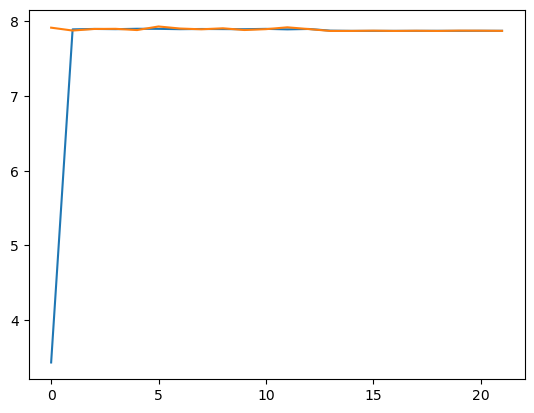

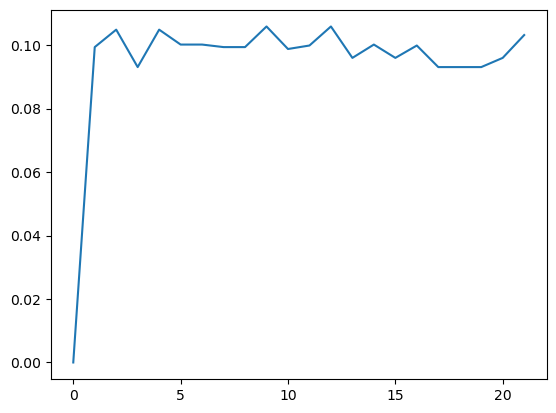

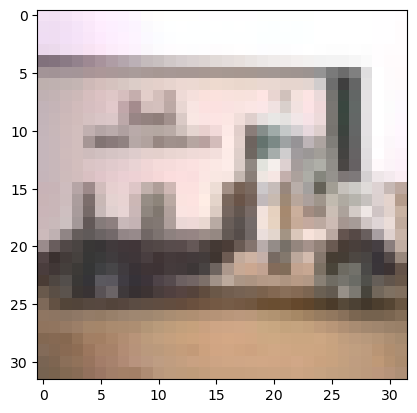

tensor([4, 5, 2, 5, 9, 6, 6, 3, 2, 1, 6, 9, 3, 7, 5, 6, 2, 4, 6, 3, 7, 3, 0, 4,
        4, 4, 7, 9, 4, 9, 6, 0, 7, 9, 1, 9, 8, 9, 9, 9, 8, 5, 0, 9, 5, 6, 7, 3,
        5, 9, 1, 8, 5, 3, 9, 2, 2, 8, 4, 0, 7, 1, 8, 8, 5, 7, 1, 7, 4, 6, 9, 5,
        7, 9, 3, 0, 2, 2, 9, 5, 7, 7, 8, 9, 6, 0, 5, 1, 0, 2, 2, 4, 5, 4, 7, 3,
        5, 0, 1, 2, 8, 4, 2, 6, 5, 9, 6, 4, 1, 4, 3, 2, 0, 5, 0, 5, 6, 6, 9, 6,
        8, 0, 1, 4, 5, 4, 2, 5, 8, 9, 3, 0, 2, 6, 4, 8, 3, 1, 0, 1, 4, 5, 4, 2,
        6, 1, 0, 0, 8, 5, 5, 9, 6, 1, 1, 1, 5, 7, 8, 1, 5, 4, 1, 9, 1, 2, 4, 4,
        8, 7, 7, 8, 4, 1, 1, 5, 4, 7, 2, 7], device='mps:0')
Loss: 7.86627721786499, Batch Num: 0/223, Accuracy:0.13333334028720856, Epoch: 22
tensor(0.8728, device='mps:0')
tensor([6, 9, 9, 5, 2, 8, 0, 3, 9, 9, 0, 6, 2, 9, 5, 6, 4, 3, 9, 6, 2, 0, 7, 9,
        2, 3, 9, 9, 0, 5, 5, 3, 1, 3, 6, 7, 5, 8, 8, 4, 1, 1, 0, 2, 4, 0, 5, 4,
        0, 2, 3, 1, 0, 4, 9, 5, 2, 1, 1, 7, 4, 2, 8, 0, 6, 5, 9, 6, 8, 4, 8, 1,
        2, 2, 6, 8, 7, 2, 

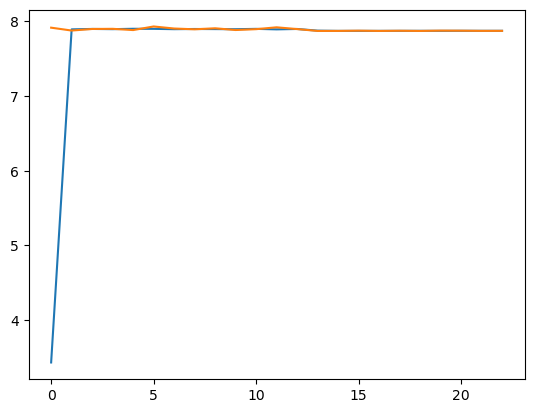

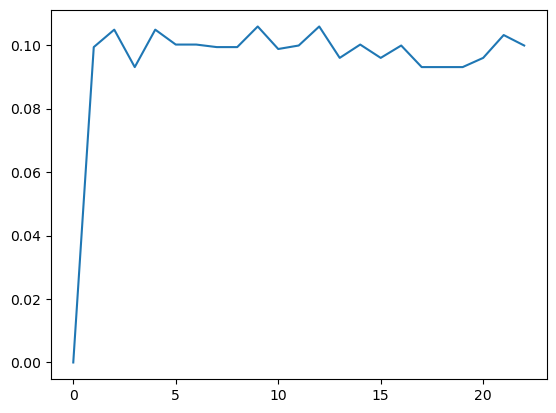

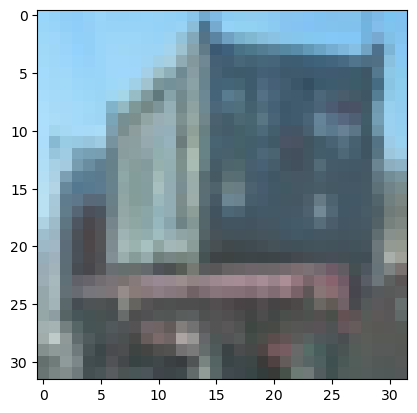

tensor([4, 4, 1, 2, 9, 3, 0, 5, 9, 4, 5, 7, 5, 8, 5, 8, 1, 9, 7, 8, 3, 4, 9, 7,
        7, 5, 6, 1, 2, 6, 2, 0, 2, 7, 0, 8, 7, 2, 6, 1, 1, 6, 5, 5, 0, 3, 7, 3,
        6, 4, 7, 8, 5, 9, 3, 8, 4, 3, 2, 7, 9, 6, 9, 1, 5, 2, 9, 5, 9, 5, 9, 6,
        0, 2, 3, 1, 9, 3, 7, 4, 9, 2, 4, 4, 6, 0, 6, 1, 1, 6, 9, 1, 0, 6, 1, 7,
        0, 2, 6, 5, 3, 8, 4, 3, 4, 3, 9, 2, 8, 2, 9, 7, 5, 7, 8, 2, 3, 9, 2, 4,
        4, 5, 1, 2, 1, 5, 5, 3, 6, 4, 5, 6, 3, 1, 0, 3, 8, 8, 1, 8, 7, 5, 0, 5,
        3, 7, 2, 3, 5, 5, 0, 0, 2, 2, 3, 4, 2, 8, 5, 0, 6, 1, 5, 5, 6, 2, 8, 5,
        8, 1, 3, 4, 8, 3, 9, 1, 4, 8, 3, 1], device='mps:0')
Loss: 7.882107734680176, Batch Num: 0/223, Accuracy:0.07222222536802292, Epoch: 23
tensor(1.0597, device='mps:0')
tensor([7, 4, 3, 3, 6, 4, 0, 8, 0, 1, 5, 8, 7, 6, 6, 2, 2, 9, 0, 5, 1, 9, 9, 4,
        0, 6, 1, 8, 8, 4, 1, 8, 9, 1, 0, 9, 8, 0, 9, 7, 0, 5, 9, 1, 2, 0, 8, 4,
        5, 4, 0, 5, 4, 0, 5, 5, 0, 0, 7, 2, 5, 0, 6, 2, 2, 8, 8, 1, 3, 4, 9, 8,
        5, 4, 2, 1, 4, 3,

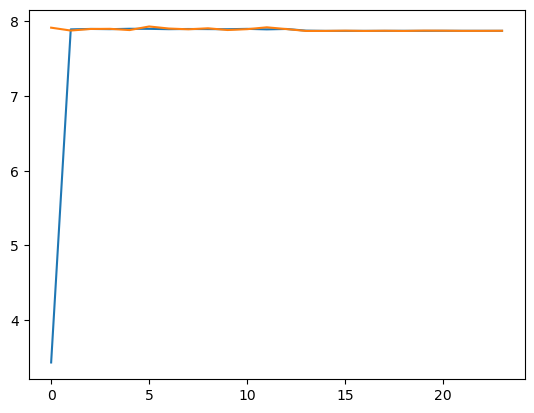

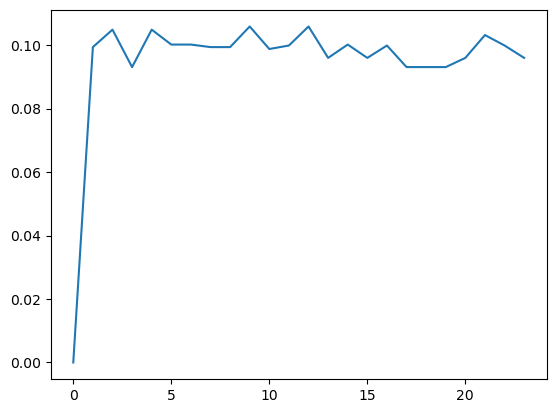

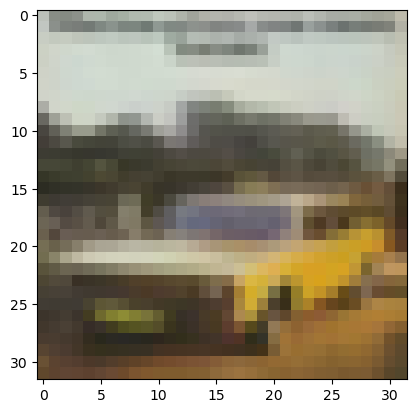

tensor([8, 0, 2, 6, 0, 7, 1, 0, 8, 6, 6, 5, 4, 0, 8, 1, 1, 0, 3, 1, 3, 4, 2, 5,
        3, 3, 8, 9, 1, 5, 9, 5, 4, 9, 8, 3, 5, 9, 6, 9, 0, 2, 1, 0, 7, 6, 0, 9,
        1, 2, 4, 2, 6, 8, 2, 1, 5, 6, 2, 2, 7, 7, 4, 9, 0, 3, 8, 1, 8, 6, 1, 3,
        8, 9, 7, 7, 3, 5, 0, 6, 0, 8, 6, 9, 0, 7, 1, 5, 5, 3, 8, 8, 8, 9, 4, 8,
        7, 5, 8, 3, 6, 9, 3, 7, 4, 4, 4, 1, 3, 5, 0, 6, 4, 9, 4, 2, 2, 0, 6, 8,
        5, 4, 7, 3, 4, 0, 8, 4, 5, 8, 9, 0, 2, 9, 4, 7, 2, 5, 3, 2, 2, 8, 4, 5,
        7, 5, 8, 7, 5, 6, 9, 0, 7, 1, 5, 1, 8, 9, 4, 4, 3, 5, 6, 5, 2, 1, 7, 5,
        5, 5, 4, 1, 8, 5, 6, 7, 9, 6, 0, 2], device='mps:0')
Loss: 7.872892379760742, Batch Num: 0/223, Accuracy:0.08888889104127884, Epoch: 24
tensor(0.8041, device='mps:0')
tensor([2, 1, 8, 0, 3, 7, 8, 2, 4, 9, 4, 0, 1, 2, 5, 1, 5, 2, 4, 8, 7, 3, 8, 7,
        3, 2, 2, 8, 2, 0, 3, 0, 1, 7, 8, 0, 5, 5, 5, 1, 4, 2, 2, 2, 2, 9, 5, 6,
        1, 2, 9, 0, 4, 1, 8, 0, 2, 4, 2, 9, 5, 5, 8, 3, 0, 5, 4, 1, 7, 2, 7, 6,
        1, 3, 7, 5, 0, 2,

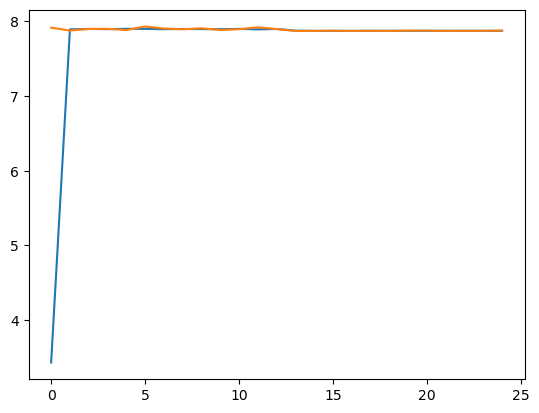

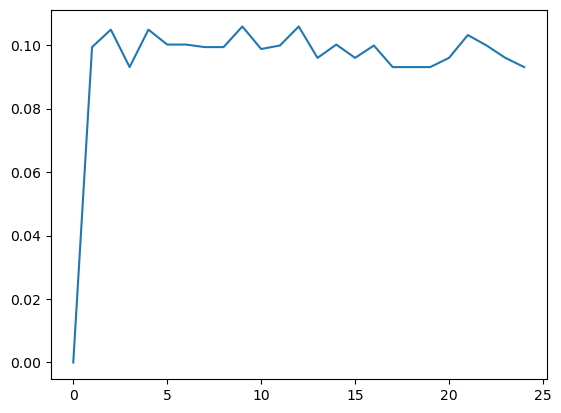

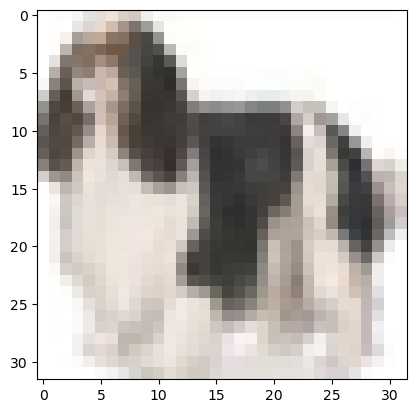

tensor([2, 4, 7, 0, 4, 4, 1, 5, 2, 8, 7, 4, 6, 3, 3, 8, 6, 4, 7, 6, 4, 7, 9, 6,
        0, 0, 0, 7, 6, 9, 5, 2, 1, 8, 9, 4, 0, 3, 7, 5, 3, 1, 9, 2, 2, 7, 0, 9,
        2, 7, 1, 9, 2, 0, 4, 9, 9, 2, 4, 8, 5, 9, 9, 5, 1, 8, 8, 4, 5, 5, 6, 7,
        4, 1, 0, 8, 4, 2, 9, 7, 6, 7, 8, 0, 8, 7, 2, 8, 3, 2, 0, 9, 7, 2, 7, 8,
        5, 1, 3, 2, 9, 7, 6, 8, 5, 7, 5, 0, 7, 4, 8, 6, 6, 1, 6, 1, 7, 0, 4, 2,
        3, 2, 2, 1, 3, 0, 1, 6, 4, 2, 3, 8, 7, 8, 2, 0, 5, 9, 3, 1, 2, 0, 9, 9,
        3, 7, 9, 7, 0, 5, 2, 7, 5, 0, 5, 0, 5, 8, 6, 5, 3, 6, 7, 1, 9, 1, 4, 7,
        5, 0, 3, 4, 7, 4, 0, 5, 8, 4, 4, 2], device='mps:0')
Loss: 7.860191345214844, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 25
tensor(0.6495, device='mps:0')
tensor([2, 4, 3, 5, 6, 3, 7, 5, 2, 0, 3, 2, 7, 2, 0, 3, 1, 4, 5, 4, 4, 2, 1, 2,
        6, 7, 3, 7, 6, 7, 4, 5, 9, 0, 0, 2, 0, 7, 7, 1, 5, 7, 8, 0, 2, 3, 9, 5,
        7, 6, 6, 4, 5, 1, 3, 0, 1, 5, 9, 9, 7, 2, 1, 2, 0, 6, 8, 6, 0, 6, 7, 9,
        4, 1, 7, 6, 0, 8, 

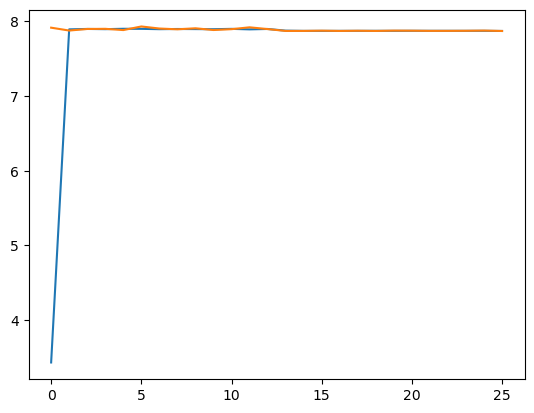

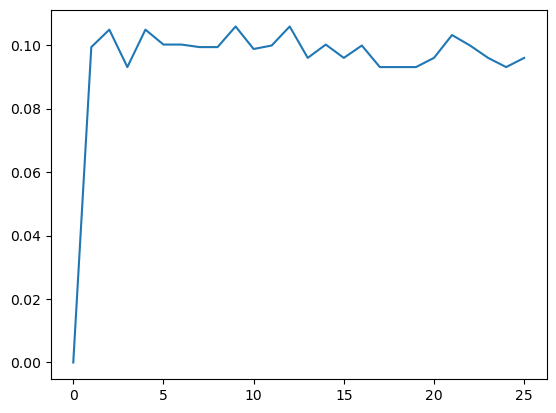

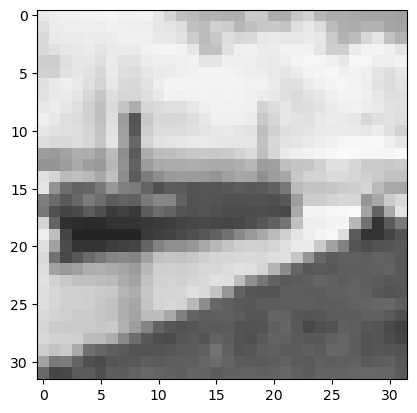

tensor([1, 2, 2, 1, 0, 5, 6, 1, 1, 0, 6, 7, 2, 0, 2, 0, 9, 9, 4, 7, 9, 0, 0, 8,
        0, 6, 2, 5, 2, 4, 0, 4, 9, 9, 1, 1, 1, 5, 1, 4, 0, 5, 5, 7, 6, 0, 3, 4,
        5, 2, 8, 0, 7, 9, 7, 2, 4, 5, 4, 0, 6, 1, 6, 3, 3, 1, 2, 8, 0, 0, 9, 2,
        2, 7, 8, 0, 6, 2, 1, 5, 3, 3, 0, 5, 6, 5, 1, 1, 4, 0, 0, 5, 1, 9, 5, 2,
        0, 5, 5, 9, 8, 0, 6, 0, 8, 9, 7, 9, 0, 8, 4, 1, 5, 6, 9, 8, 4, 2, 3, 5,
        0, 3, 4, 6, 0, 5, 8, 5, 6, 8, 4, 0, 0, 1, 4, 2, 9, 8, 9, 4, 3, 8, 7, 0,
        0, 3, 6, 9, 8, 0, 1, 2, 0, 6, 6, 0, 0, 8, 4, 1, 0, 0, 1, 5, 7, 0, 6, 7,
        6, 1, 8, 0, 4, 3, 7, 8, 5, 6, 5, 1], device='mps:0')
Loss: 7.874161243438721, Batch Num: 0/223, Accuracy:0.06111111119389534, Epoch: 26
tensor(1.7917, device='mps:0')
tensor([6, 6, 2, 2, 4, 0, 5, 8, 1, 2, 6, 7, 4, 7, 2, 4, 4, 7, 5, 5, 1, 8, 2, 2,
        6, 8, 7, 2, 8, 7, 3, 1, 6, 5, 6, 0, 0, 3, 4, 9, 3, 6, 0, 2, 7, 5, 3, 0,
        9, 7, 1, 3, 6, 9, 6, 1, 8, 2, 8, 4, 1, 7, 8, 2, 7, 5, 1, 3, 7, 2, 4, 9,
        7, 7, 5, 1, 6, 9,

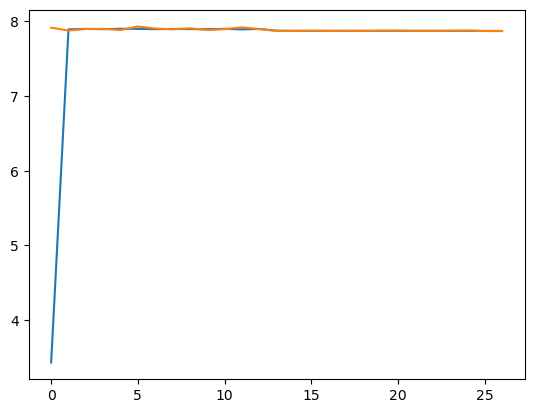

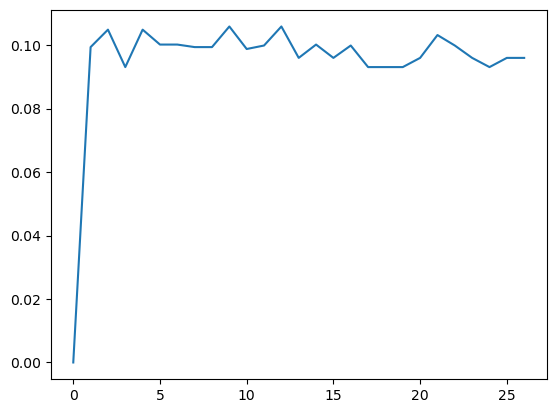

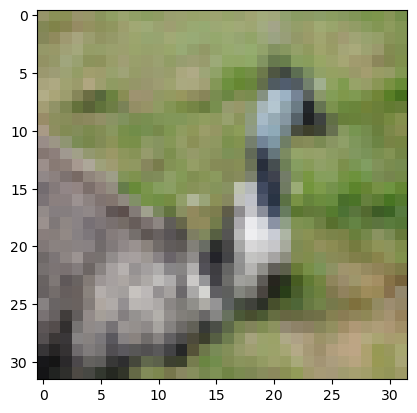

tensor([4, 5, 4, 6, 0, 0, 3, 5, 3, 3, 9, 8, 2, 3, 6, 6, 1, 4, 4, 7, 9, 9, 8, 0,
        8, 3, 2, 7, 6, 6, 1, 1, 7, 0, 0, 2, 2, 8, 6, 2, 7, 1, 1, 9, 9, 9, 8, 6,
        8, 2, 0, 4, 8, 5, 8, 6, 8, 5, 0, 8, 3, 0, 1, 6, 0, 1, 1, 8, 1, 5, 0, 8,
        5, 9, 9, 8, 7, 0, 4, 1, 2, 1, 1, 7, 8, 4, 4, 3, 8, 2, 8, 2, 9, 3, 7, 1,
        8, 7, 7, 7, 2, 3, 2, 5, 1, 6, 2, 6, 7, 1, 2, 0, 1, 6, 0, 5, 0, 3, 9, 4,
        4, 7, 2, 3, 2, 4, 5, 0, 8, 0, 5, 7, 9, 7, 8, 5, 2, 1, 4, 0, 5, 0, 4, 9,
        6, 1, 3, 7, 3, 6, 3, 0, 7, 8, 4, 2, 1, 9, 5, 5, 1, 7, 2, 4, 3, 3, 8, 6,
        1, 1, 3, 6, 6, 2, 1, 2, 6, 7, 6, 8], device='mps:0')
Loss: 7.871151924133301, Batch Num: 0/223, Accuracy:0.10000000149011612, Epoch: 27
tensor(0.8076, device='mps:0')
tensor([3, 7, 1, 8, 3, 1, 9, 2, 4, 9, 5, 7, 7, 6, 1, 1, 0, 0, 5, 9, 6, 9, 0, 8,
        4, 9, 0, 2, 2, 9, 9, 4, 5, 3, 2, 9, 9, 2, 5, 9, 2, 0, 1, 0, 5, 1, 5, 9,
        7, 2, 4, 1, 1, 0, 1, 7, 6, 4, 2, 5, 3, 1, 3, 3, 2, 2, 8, 8, 4, 0, 8, 3,
        8, 9, 4, 4, 2, 9,

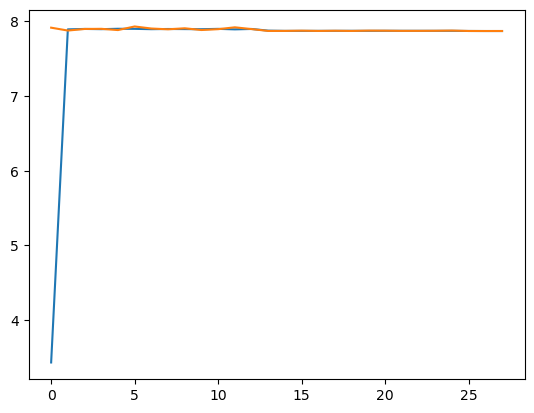

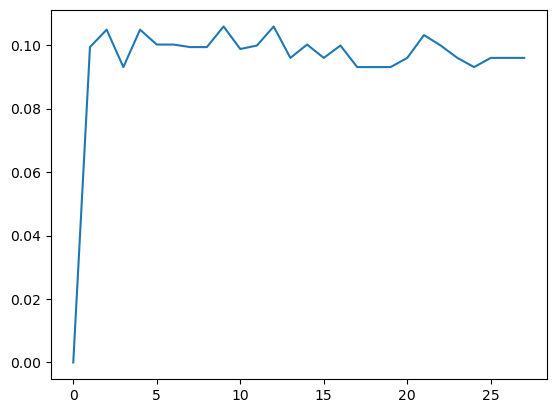

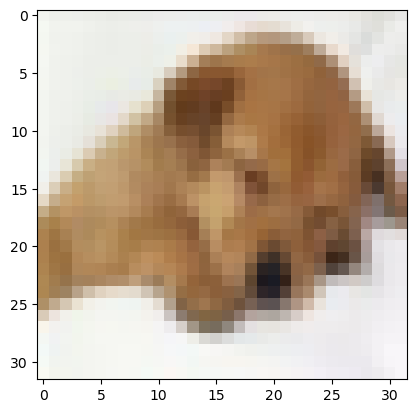

tensor([8, 7, 3, 3, 3, 6, 8, 5, 6, 9, 0, 9, 5, 9, 6, 7, 2, 9, 0, 0, 2, 5, 9, 6,
        2, 5, 8, 5, 2, 6, 8, 7, 0, 5, 7, 4, 8, 6, 6, 9, 6, 2, 5, 4, 3, 3, 3, 7,
        4, 6, 5, 9, 4, 5, 7, 1, 0, 5, 8, 1, 8, 4, 5, 5, 7, 7, 1, 8, 1, 8, 4, 5,
        8, 4, 4, 9, 0, 5, 8, 6, 8, 7, 6, 6, 8, 2, 4, 3, 1, 6, 5, 5, 7, 1, 8, 3,
        2, 8, 6, 5, 4, 8, 8, 4, 8, 1, 2, 9, 3, 8, 0, 4, 5, 3, 4, 0, 1, 6, 0, 1,
        0, 0, 7, 6, 7, 8, 6, 7, 8, 8, 7, 9, 5, 6, 4, 4, 6, 9, 4, 8, 2, 8, 5, 4,
        9, 9, 6, 6, 7, 4, 0, 4, 6, 0, 9, 4, 7, 5, 1, 2, 7, 0, 5, 3, 0, 3, 0, 4,
        7, 7, 5, 0, 8, 3, 0, 7, 1, 1, 9, 3], device='mps:0')
Loss: 7.871474742889404, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 28
tensor(1.1960, device='mps:0')
tensor([9, 4, 1, 0, 5, 7, 1, 4, 2, 5, 6, 1, 6, 5, 2, 3, 9, 1, 3, 9, 1, 5, 0, 1,
        5, 0, 2, 2, 7, 2, 1, 4, 7, 6, 3, 4, 7, 5, 3, 9, 0, 4, 9, 1, 4, 8, 6, 0,
        5, 6, 6, 1, 0, 6, 1, 9, 5, 6, 2, 1, 9, 9, 6, 2, 1, 1, 2, 6, 6, 5, 7, 0,
        0, 4, 1, 3, 5, 2, 

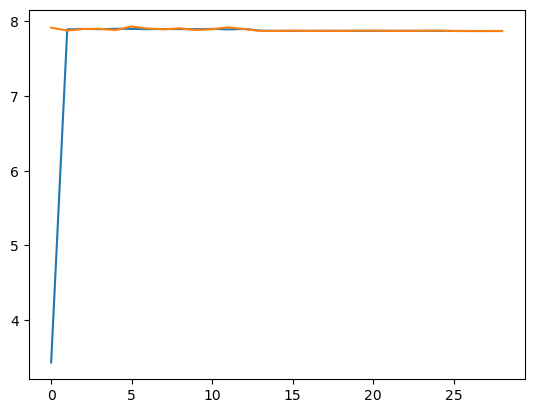

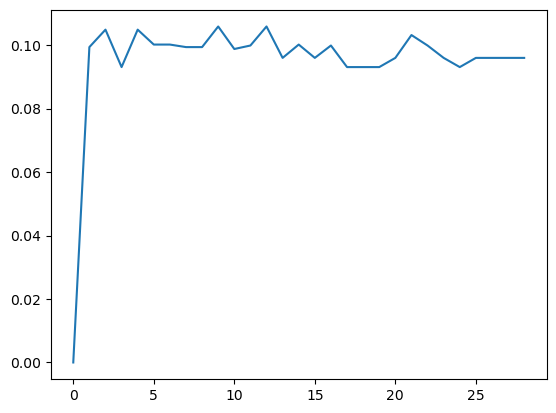

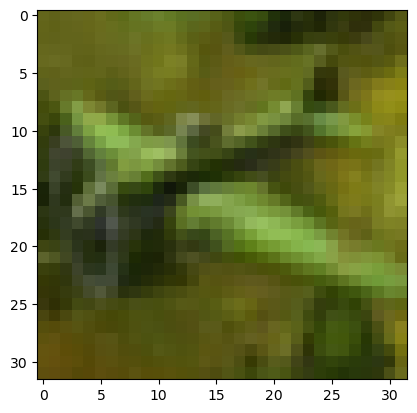

tensor([2, 5, 8, 7, 7, 3, 9, 3, 1, 5, 5, 7, 0, 0, 0, 1, 0, 4, 1, 7, 0, 7, 9, 0,
        7, 0, 9, 6, 4, 1, 5, 8, 2, 0, 5, 1, 6, 6, 8, 7, 8, 9, 2, 7, 5, 8, 5, 4,
        5, 3, 4, 6, 6, 0, 5, 5, 1, 8, 0, 8, 5, 7, 5, 5, 5, 0, 5, 4, 0, 3, 0, 6,
        2, 1, 3, 2, 5, 9, 1, 0, 6, 0, 8, 2, 7, 6, 3, 4, 8, 8, 2, 9, 2, 6, 9, 0,
        1, 8, 0, 7, 5, 8, 6, 2, 7, 7, 4, 0, 6, 0, 6, 5, 5, 5, 6, 8, 1, 1, 8, 9,
        4, 8, 6, 4, 5, 3, 2, 1, 7, 3, 3, 9, 2, 1, 0, 7, 9, 4, 8, 2, 3, 6, 7, 7,
        1, 2, 2, 0, 5, 2, 4, 5, 0, 7, 1, 2, 0, 3, 0, 3, 5, 1, 6, 5, 0, 9, 5, 1,
        6, 3, 2, 0, 0, 7, 3, 0, 5, 9, 1, 9], device='mps:0')
Loss: 7.87190055847168, Batch Num: 0/223, Accuracy:0.10555555671453476, Epoch: 29
tensor(1.3238, device='mps:0')
tensor([2, 5, 5, 0, 0, 3, 3, 5, 4, 9, 5, 8, 4, 1, 2, 1, 2, 5, 3, 3, 5, 3, 4, 2,
        0, 7, 8, 4, 5, 0, 0, 0, 7, 2, 1, 5, 8, 0, 3, 5, 7, 4, 7, 7, 1, 9, 3, 5,
        3, 6, 3, 1, 1, 0, 5, 7, 8, 6, 9, 0, 2, 8, 7, 1, 6, 1, 1, 2, 0, 0, 4, 6,
        9, 1, 4, 8, 7, 3, 

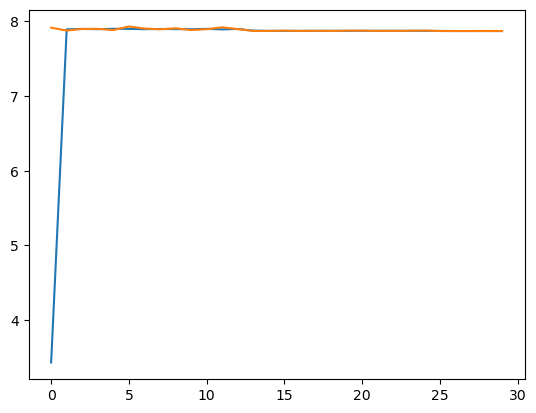

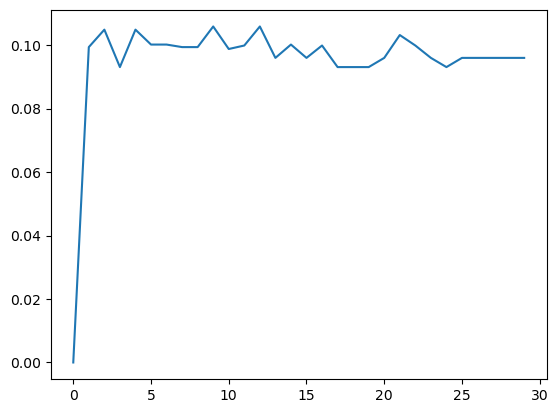

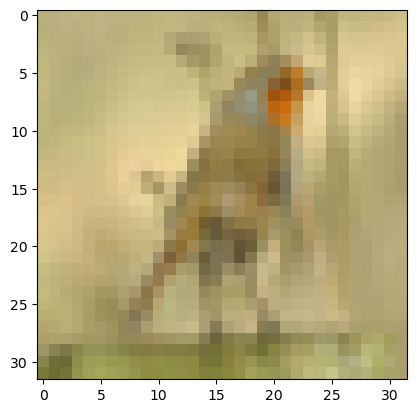

tensor([1, 2, 5, 4, 4, 9, 9, 2, 0, 3, 9, 9, 0, 7, 3, 5, 8, 8, 3, 5, 9, 9, 2, 4,
        3, 4, 3, 2, 3, 1, 5, 9, 6, 0, 6, 8, 7, 2, 1, 1, 4, 7, 1, 8, 1, 6, 3, 6,
        6, 9, 9, 6, 0, 2, 5, 6, 8, 5, 1, 4, 5, 5, 9, 9, 9, 7, 4, 4, 4, 0, 5, 2,
        2, 0, 4, 4, 8, 0, 9, 6, 1, 3, 2, 3, 0, 6, 4, 4, 4, 4, 4, 3, 4, 7, 1, 9,
        5, 4, 4, 2, 0, 0, 6, 0, 0, 6, 6, 3, 2, 0, 7, 4, 2, 9, 2, 8, 0, 7, 0, 1,
        9, 7, 6, 9, 9, 3, 2, 1, 3, 6, 1, 4, 7, 9, 9, 3, 6, 2, 8, 8, 4, 3, 5, 6,
        5, 8, 7, 9, 9, 1, 3, 5, 2, 2, 7, 6, 9, 7, 3, 3, 1, 6, 8, 6, 7, 1, 6, 7,
        5, 9, 4, 1, 8, 9, 2, 9, 2, 4, 9, 7], device='mps:0')
Loss: 7.872892379760742, Batch Num: 0/223, Accuracy:0.0833333358168602, Epoch: 30
tensor(1.1730, device='mps:0')
tensor([6, 6, 0, 8, 7, 2, 2, 6, 1, 7, 9, 6, 8, 1, 3, 1, 0, 0, 6, 6, 1, 5, 5, 3,
        4, 1, 8, 7, 1, 3, 8, 7, 8, 8, 1, 1, 1, 7, 4, 2, 2, 9, 5, 2, 5, 4, 8, 2,
        7, 4, 9, 9, 8, 8, 7, 3, 4, 4, 7, 7, 3, 8, 5, 5, 1, 6, 5, 8, 9, 6, 9, 6,
        9, 8, 6, 3, 0, 0, 

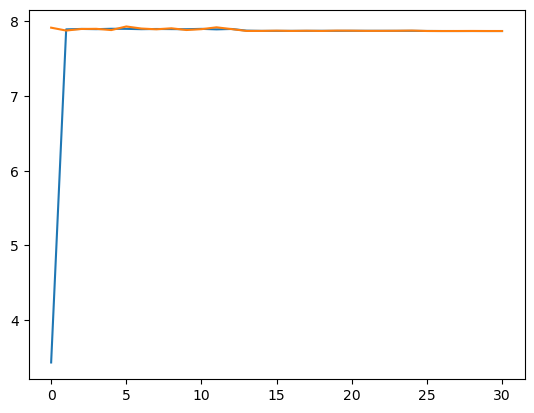

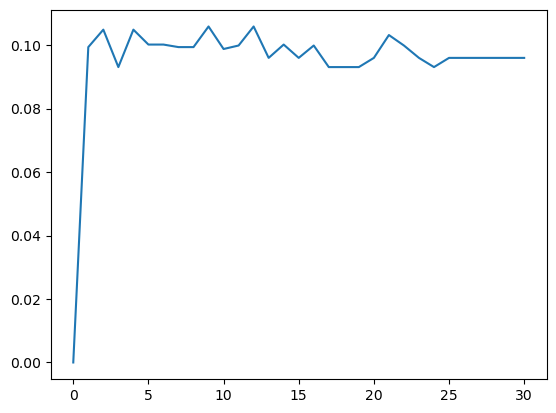

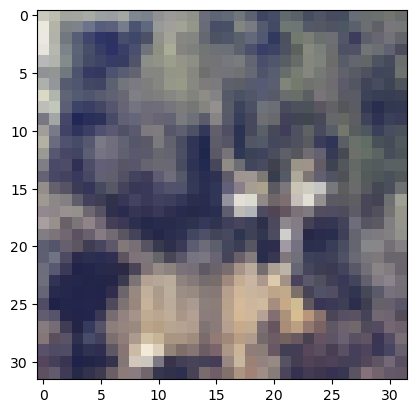

tensor([1, 9, 3, 8, 0, 2, 6, 9, 2, 0, 7, 8, 6, 5, 7, 5, 5, 9, 8, 4, 1, 8, 0, 8,
        6, 1, 0, 1, 3, 1, 9, 6, 1, 2, 0, 2, 5, 7, 6, 0, 6, 2, 6, 5, 7, 1, 9, 7,
        1, 3, 7, 9, 0, 4, 2, 7, 8, 9, 6, 0, 0, 1, 6, 2, 6, 3, 1, 7, 5, 2, 8, 6,
        9, 8, 1, 4, 8, 3, 7, 7, 1, 8, 7, 7, 9, 4, 1, 4, 6, 1, 8, 6, 8, 2, 4, 9,
        7, 0, 9, 9, 3, 2, 8, 3, 9, 4, 8, 2, 3, 8, 8, 4, 5, 2, 1, 9, 2, 5, 0, 3,
        0, 0, 2, 1, 2, 5, 8, 5, 8, 5, 0, 2, 8, 1, 7, 2, 9, 7, 7, 7, 3, 9, 6, 0,
        8, 3, 5, 5, 8, 4, 4, 9, 3, 6, 6, 0, 0, 5, 6, 4, 3, 1, 6, 4, 7, 2, 1, 3,
        6, 6, 7, 0, 7, 0, 6, 8, 6, 3, 1, 3], device='mps:0')
Loss: 7.870331287384033, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 31
tensor(0.7866, device='mps:0')
tensor([9, 7, 1, 7, 8, 3, 9, 6, 4, 4, 6, 1, 6, 1, 5, 7, 8, 4, 5, 7, 5, 8, 4, 0,
        7, 4, 0, 9, 7, 8, 8, 0, 4, 2, 9, 1, 2, 5, 9, 5, 2, 0, 0, 0, 6, 6, 2, 1,
        9, 9, 8, 0, 7, 9, 0, 7, 6, 5, 8, 4, 2, 8, 4, 7, 9, 1, 7, 3, 9, 1, 1, 4,
        3, 1, 2, 5, 2, 4, 

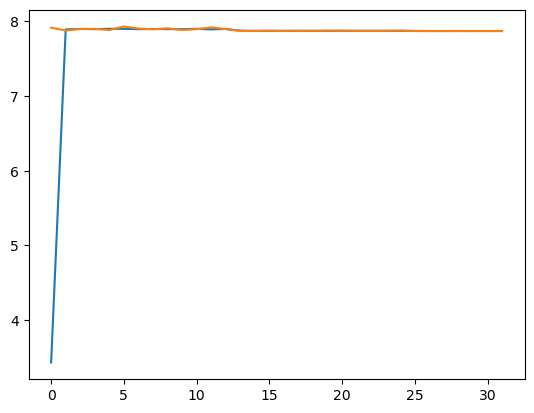

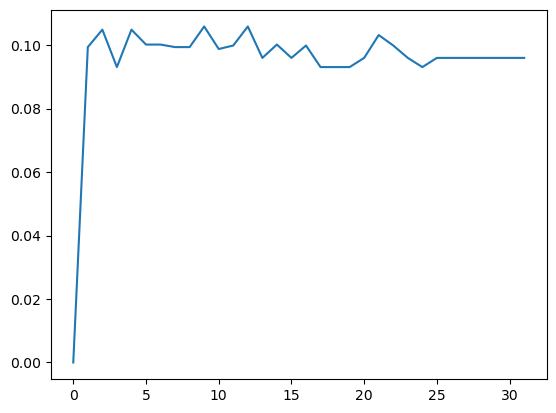

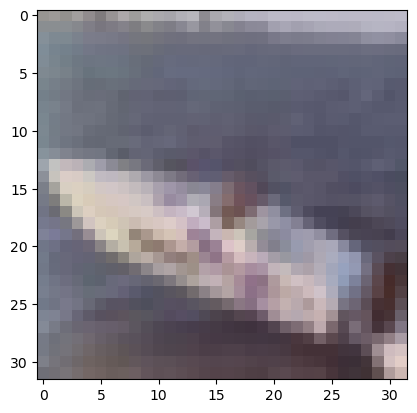

tensor([3, 5, 6, 5, 2, 9, 1, 4, 5, 6, 0, 4, 5, 0, 8, 5, 4, 3, 3, 2, 3, 2, 8, 8,
        6, 7, 7, 2, 2, 8, 1, 4, 4, 9, 3, 6, 7, 1, 6, 0, 2, 3, 6, 9, 2, 0, 9, 3,
        5, 7, 0, 4, 8, 5, 3, 4, 7, 6, 6, 4, 6, 6, 8, 6, 5, 9, 0, 1, 7, 0, 2, 7,
        6, 0, 7, 6, 2, 7, 3, 0, 1, 8, 9, 5, 7, 1, 8, 6, 5, 1, 0, 4, 9, 0, 7, 8,
        1, 6, 9, 4, 3, 2, 2, 4, 7, 0, 2, 7, 1, 3, 6, 6, 2, 5, 8, 8, 7, 6, 4, 2,
        2, 6, 8, 3, 1, 8, 9, 8, 2, 1, 7, 6, 5, 4, 7, 5, 2, 1, 1, 1, 1, 3, 8, 3,
        0, 9, 8, 0, 5, 9, 2, 2, 0, 5, 2, 8, 7, 1, 3, 2, 5, 4, 4, 5, 8, 3, 7, 8,
        9, 9, 3, 5, 3, 4, 3, 9, 9, 1, 6, 5], device='mps:0')
Loss: 7.870971202850342, Batch Num: 0/223, Accuracy:0.10000000149011612, Epoch: 32
tensor(0.5832, device='mps:0')
tensor([0, 0, 8, 2, 3, 2, 2, 5, 9, 8, 2, 6, 7, 0, 3, 8, 5, 9, 2, 0, 8, 4, 4, 7,
        2, 9, 9, 8, 5, 6, 6, 4, 9, 2, 6, 6, 2, 9, 1, 4, 5, 7, 8, 5, 5, 2, 6, 4,
        3, 8, 0, 6, 6, 6, 6, 2, 7, 3, 8, 3, 0, 8, 1, 0, 1, 0, 0, 8, 0, 9, 6, 1,
        6, 1, 9, 9, 0, 2,

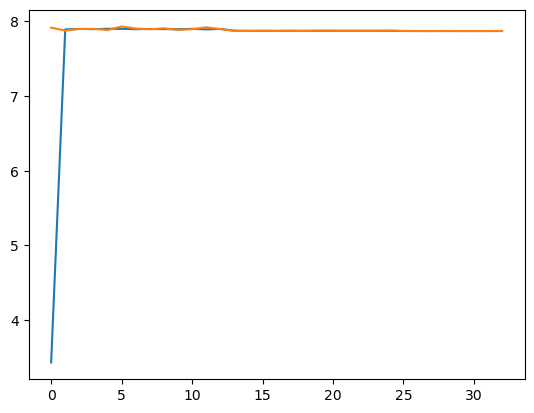

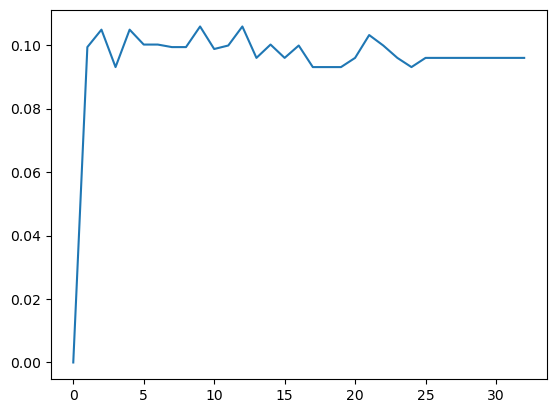

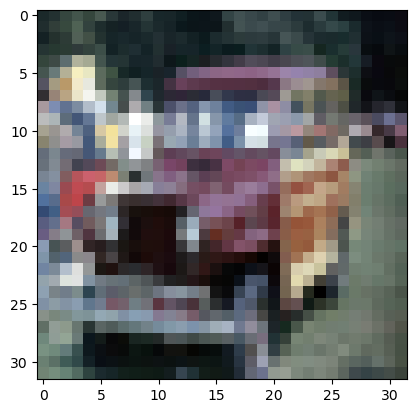

tensor([5, 3, 5, 9, 8, 3, 0, 9, 8, 3, 9, 0, 0, 3, 3, 4, 9, 8, 0, 2, 0, 1, 3, 9,
        3, 7, 8, 6, 9, 3, 4, 9, 2, 5, 8, 3, 5, 9, 2, 7, 4, 7, 9, 3, 7, 5, 1, 5,
        9, 3, 0, 9, 4, 3, 2, 5, 2, 2, 7, 1, 0, 3, 4, 4, 8, 2, 5, 4, 8, 0, 5, 0,
        2, 5, 2, 8, 4, 4, 7, 4, 4, 4, 1, 5, 9, 5, 5, 4, 5, 5, 4, 2, 9, 5, 6, 3,
        2, 3, 0, 5, 5, 9, 3, 7, 8, 0, 7, 2, 3, 7, 2, 9, 4, 6, 7, 2, 0, 1, 5, 8,
        6, 0, 3, 5, 7, 0, 3, 0, 3, 8, 3, 5, 1, 5, 2, 6, 8, 6, 2, 3, 3, 9, 7, 5,
        4, 3, 9, 5, 6, 8, 8, 0, 1, 4, 5, 9, 6, 4, 5, 8, 6, 7, 5, 7, 5, 2, 5, 6,
        2, 1, 0, 6, 7, 1, 6, 1, 9, 6, 3, 3], device='mps:0')
Loss: 7.873859882354736, Batch Num: 0/223, Accuracy:0.0833333358168602, Epoch: 33
tensor(1.4212, device='mps:0')
tensor([5, 0, 9, 2, 6, 3, 0, 6, 7, 2, 0, 7, 4, 6, 2, 1, 8, 0, 4, 3, 5, 3, 7, 4,
        6, 6, 3, 2, 8, 7, 6, 0, 8, 6, 4, 6, 1, 8, 3, 2, 1, 6, 8, 7, 2, 2, 1, 3,
        1, 3, 3, 5, 0, 7, 5, 3, 6, 9, 4, 4, 5, 4, 3, 7, 0, 6, 9, 3, 3, 2, 2, 8,
        9, 6, 4, 0, 7, 1, 

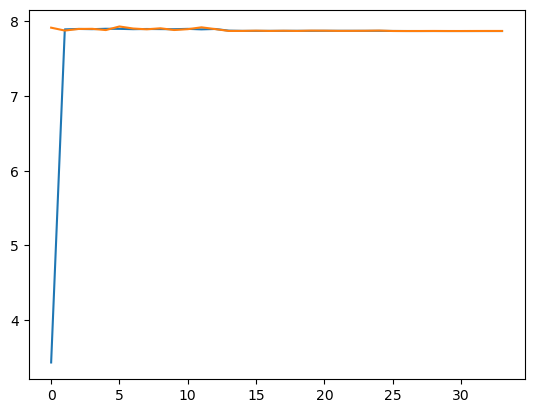

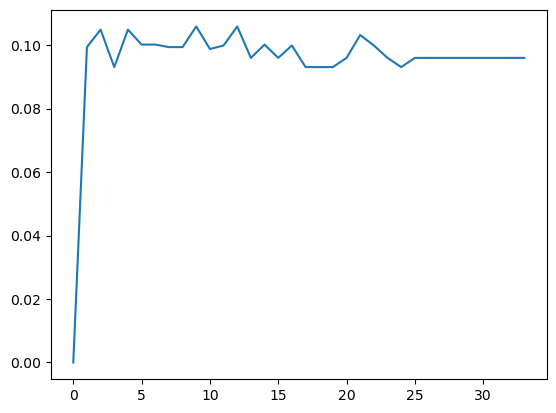

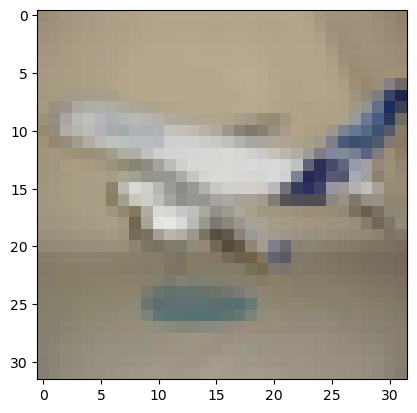

tensor([6, 4, 1, 3, 0, 1, 9, 6, 2, 7, 8, 8, 2, 0, 9, 8, 4, 7, 3, 0, 1, 0, 4, 2,
        8, 7, 8, 5, 3, 3, 5, 9, 3, 8, 2, 1, 0, 2, 3, 4, 6, 3, 9, 4, 4, 1, 0, 6,
        4, 2, 6, 7, 7, 6, 3, 2, 2, 3, 7, 8, 3, 6, 1, 8, 8, 2, 0, 8, 0, 9, 4, 1,
        0, 2, 0, 9, 1, 2, 9, 5, 2, 4, 7, 0, 9, 4, 4, 6, 1, 7, 8, 1, 8, 2, 5, 1,
        4, 8, 8, 1, 5, 6, 8, 3, 9, 3, 4, 5, 3, 0, 4, 9, 0, 2, 4, 3, 3, 8, 8, 9,
        4, 4, 0, 5, 1, 7, 8, 3, 2, 1, 9, 7, 4, 6, 9, 6, 4, 5, 7, 3, 9, 2, 1, 2,
        8, 2, 4, 8, 5, 7, 9, 0, 6, 2, 7, 5, 2, 1, 0, 0, 1, 0, 3, 1, 3, 0, 9, 1,
        5, 9, 0, 8, 8, 2, 4, 0, 8, 4, 4, 4], device='mps:0')
Loss: 7.8682637214660645, Batch Num: 0/223, Accuracy:0.07222222536802292, Epoch: 34
tensor(1.1205, device='mps:0')
tensor([9, 5, 8, 0, 5, 1, 0, 8, 9, 3, 3, 8, 1, 7, 5, 0, 2, 7, 8, 7, 4, 0, 0, 4,
        4, 0, 5, 5, 6, 2, 6, 6, 7, 4, 6, 0, 5, 1, 3, 0, 3, 0, 1, 1, 9, 6, 8, 5,
        9, 1, 5, 3, 5, 5, 4, 9, 9, 9, 2, 5, 5, 7, 7, 9, 3, 1, 9, 1, 2, 9, 6, 5,
        7, 0, 3, 9, 7, 0

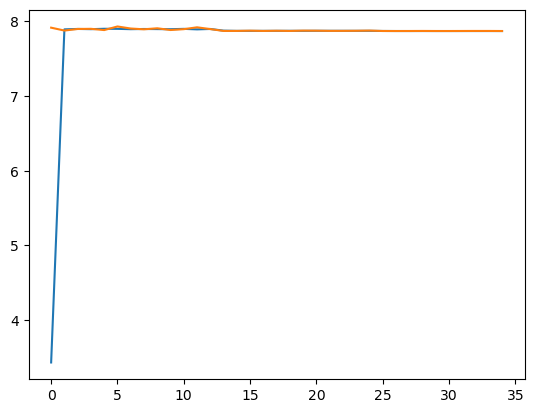

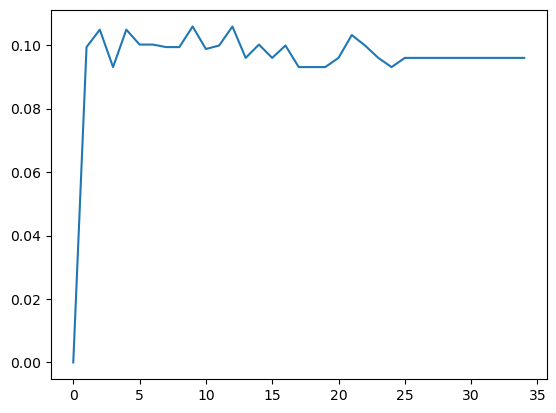

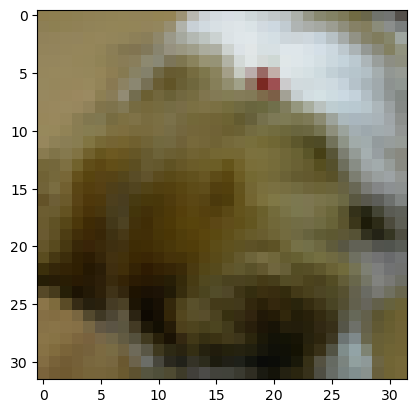

tensor([9, 9, 7, 2, 6, 7, 9, 9, 6, 7, 1, 9, 6, 0, 6, 7, 8, 6, 7, 8, 0, 7, 6, 8,
        6, 7, 5, 9, 2, 0, 6, 8, 5, 0, 0, 1, 0, 7, 1, 0, 1, 4, 0, 1, 5, 4, 5, 2,
        7, 7, 5, 4, 2, 5, 2, 0, 5, 2, 1, 0, 0, 1, 9, 3, 2, 9, 9, 3, 7, 3, 4, 9,
        1, 1, 3, 8, 9, 5, 9, 1, 3, 2, 6, 4, 3, 4, 3, 6, 0, 3, 6, 8, 6, 5, 5, 7,
        9, 6, 0, 5, 6, 9, 2, 0, 2, 1, 0, 6, 7, 9, 6, 2, 3, 5, 8, 9, 1, 0, 7, 8,
        1, 1, 4, 5, 1, 9, 0, 9, 2, 6, 7, 4, 4, 4, 9, 2, 4, 6, 7, 4, 2, 5, 4, 7,
        3, 3, 8, 3, 8, 8, 5, 6, 1, 1, 3, 4, 7, 4, 4, 4, 9, 4, 7, 9, 5, 0, 8, 3,
        2, 8, 7, 9, 1, 7, 3, 4, 3, 6, 1, 8], device='mps:0')
Loss: 7.869716167449951, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 35
tensor(0.6305, device='mps:0')
tensor([4, 5, 9, 9, 2, 2, 1, 7, 4, 2, 6, 0, 3, 2, 0, 9, 1, 0, 3, 3, 0, 6, 7, 4,
        9, 7, 3, 2, 7, 0, 8, 5, 6, 3, 2, 5, 6, 3, 5, 6, 0, 9, 9, 3, 6, 1, 1, 0,
        1, 3, 9, 9, 6, 6, 2, 9, 4, 2, 8, 5, 4, 3, 1, 7, 7, 3, 1, 7, 2, 6, 2, 8,
        9, 0, 4, 6, 7, 6,

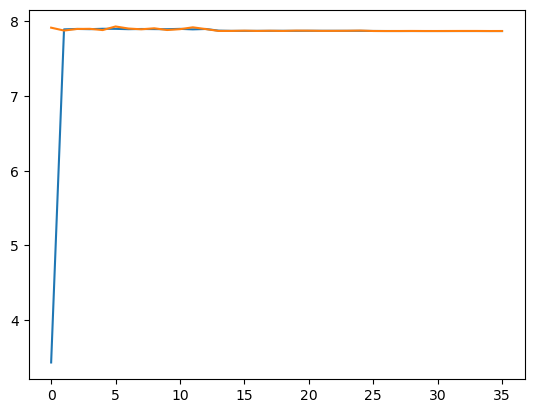

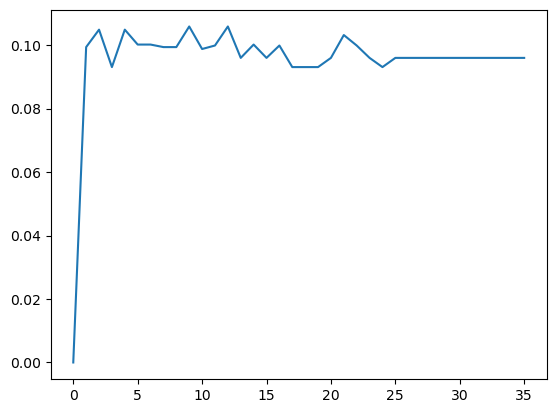

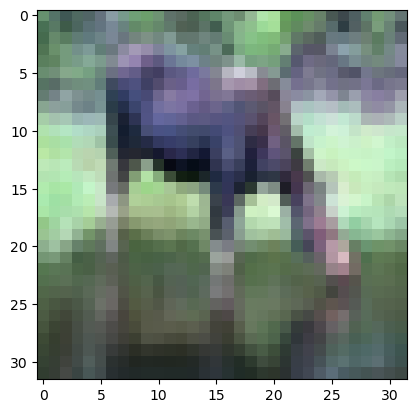

tensor([4, 8, 3, 2, 6, 0, 4, 6, 4, 7, 0, 0, 8, 1, 4, 4, 6, 3, 0, 2, 6, 9, 2, 6,
        1, 6, 7, 0, 6, 9, 6, 2, 8, 1, 0, 7, 3, 0, 2, 0, 5, 0, 0, 9, 2, 9, 7, 9,
        9, 9, 2, 6, 1, 5, 9, 4, 0, 1, 9, 8, 6, 0, 4, 6, 8, 8, 5, 8, 3, 8, 1, 0,
        5, 4, 5, 0, 5, 0, 6, 7, 2, 5, 0, 6, 9, 0, 5, 8, 6, 5, 8, 1, 8, 9, 0, 6,
        8, 3, 7, 8, 1, 2, 6, 3, 9, 9, 0, 9, 7, 1, 6, 4, 7, 2, 5, 9, 1, 3, 9, 4,
        1, 1, 3, 9, 0, 7, 2, 2, 5, 9, 3, 7, 5, 5, 1, 8, 1, 4, 6, 9, 4, 0, 9, 5,
        3, 7, 0, 4, 5, 9, 3, 3, 9, 8, 1, 9, 0, 3, 6, 0, 6, 0, 2, 8, 9, 3, 0, 6,
        8, 1, 3, 2, 6, 1, 4, 3, 3, 9, 3, 4], device='mps:0')
Loss: 7.873387336730957, Batch Num: 0/223, Accuracy:0.06111111119389534, Epoch: 36
tensor(1.2872, device='mps:0')
tensor([0, 3, 0, 8, 2, 0, 9, 2, 9, 1, 9, 8, 6, 5, 5, 6, 9, 9, 8, 3, 4, 8, 6, 9,
        6, 4, 2, 0, 0, 0, 1, 7, 1, 2, 8, 7, 5, 0, 6, 6, 8, 9, 5, 4, 8, 0, 5, 7,
        1, 9, 0, 3, 9, 2, 3, 2, 6, 7, 2, 1, 3, 1, 5, 5, 1, 8, 7, 1, 9, 9, 9, 9,
        1, 7, 1, 7, 2, 0,

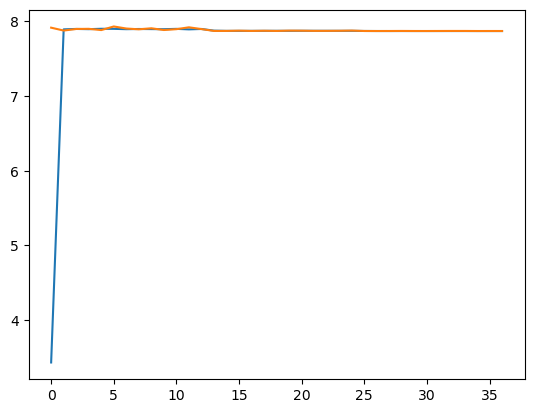

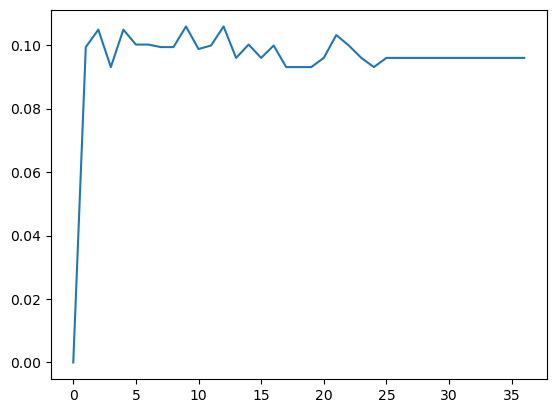

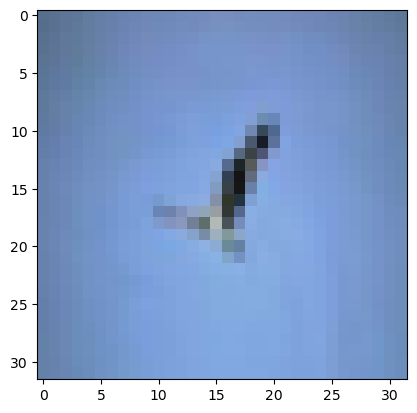

tensor([7, 6, 2, 1, 8, 0, 4, 8, 2, 4, 5, 4, 3, 5, 3, 0, 4, 4, 4, 4, 9, 4, 9, 8,
        4, 8, 1, 7, 9, 4, 4, 1, 8, 3, 0, 4, 4, 9, 9, 4, 1, 5, 5, 3, 2, 2, 5, 0,
        0, 3, 7, 6, 7, 5, 9, 5, 0, 0, 3, 8, 4, 0, 2, 4, 5, 0, 7, 5, 4, 4, 2, 0,
        9, 7, 7, 8, 0, 7, 0, 0, 4, 3, 2, 4, 6, 9, 7, 2, 8, 5, 1, 8, 1, 7, 7, 2,
        1, 2, 9, 0, 8, 1, 7, 1, 0, 7, 7, 0, 2, 1, 8, 9, 0, 6, 6, 0, 7, 3, 2, 6,
        9, 7, 8, 2, 1, 6, 9, 7, 4, 5, 8, 4, 8, 0, 7, 0, 4, 1, 4, 4, 7, 5, 0, 3,
        9, 8, 5, 3, 2, 6, 4, 1, 0, 0, 8, 5, 3, 6, 5, 4, 3, 1, 0, 2, 5, 0, 7, 4,
        6, 8, 6, 3, 7, 6, 5, 5, 5, 0, 7, 1], device='mps:0')
Loss: 7.865753650665283, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 37
tensor(1.2591, device='mps:0')
tensor([2, 3, 8, 4, 0, 4, 8, 7, 4, 8, 4, 1, 8, 5, 9, 4, 4, 8, 7, 5, 5, 4, 2, 9,
        9, 5, 1, 8, 3, 8, 7, 0, 3, 9, 7, 6, 9, 6, 4, 4, 1, 8, 3, 9, 0, 0, 1, 4,
        9, 1, 1, 0, 4, 1, 6, 5, 2, 2, 5, 9, 7, 4, 4, 9, 6, 3, 8, 0, 0, 7, 2, 0,
        4, 7, 8, 3, 9, 5,

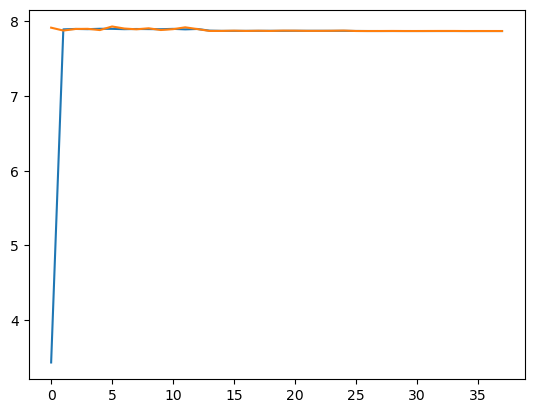

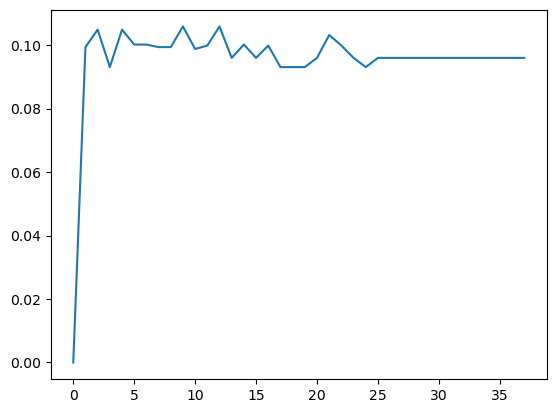

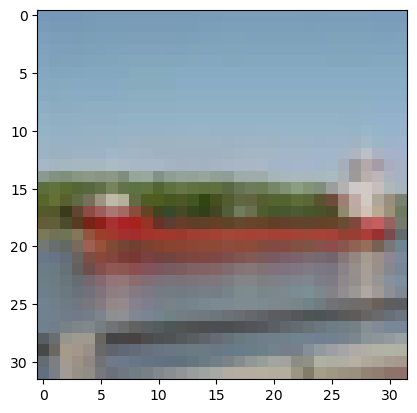

tensor([3, 7, 6, 3, 6, 2, 2, 4, 6, 6, 9, 7, 3, 6, 1, 6, 0, 2, 4, 5, 4, 1, 3, 7,
        8, 2, 9, 2, 3, 2, 0, 7, 7, 0, 9, 4, 6, 9, 4, 3, 6, 4, 6, 0, 0, 5, 3, 7,
        6, 1, 1, 0, 7, 6, 8, 4, 6, 2, 7, 2, 3, 1, 2, 8, 7, 1, 6, 6, 4, 0, 9, 4,
        1, 2, 6, 0, 1, 5, 5, 5, 3, 5, 1, 1, 7, 3, 7, 6, 3, 8, 4, 9, 3, 5, 3, 9,
        9, 0, 7, 4, 5, 9, 9, 6, 9, 7, 0, 2, 1, 9, 1, 2, 9, 0, 8, 3, 9, 6, 1, 2,
        1, 3, 5, 3, 4, 5, 3, 6, 0, 6, 8, 6, 5, 1, 5, 1, 8, 1, 9, 0, 9, 7, 5, 8,
        1, 7, 3, 1, 1, 6, 1, 9, 8, 1, 7, 7, 2, 2, 2, 9, 9, 8, 4, 4, 8, 7, 8, 7,
        0, 7, 8, 7, 5, 3, 6, 6, 8, 9, 0, 5], device='mps:0')
Loss: 7.869338035583496, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 38
tensor(0.8486, device='mps:0')
tensor([5, 3, 8, 3, 6, 3, 1, 6, 2, 3, 8, 0, 0, 2, 1, 4, 4, 8, 3, 6, 1, 2, 1, 6,
        4, 6, 2, 0, 5, 0, 7, 6, 8, 8, 1, 9, 7, 6, 3, 7, 8, 1, 0, 1, 8, 4, 3, 6,
        9, 5, 2, 7, 6, 4, 6, 5, 3, 8, 6, 4, 3, 4, 6, 5, 2, 9, 5, 9, 3, 6, 7, 4,
        1, 0, 4, 9, 2, 2,

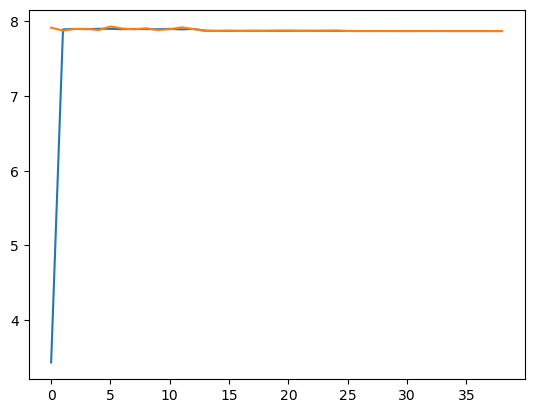

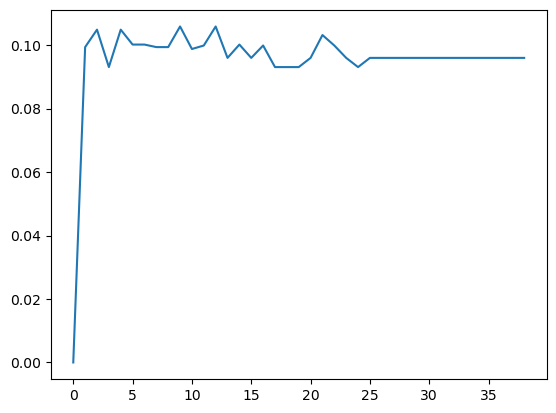

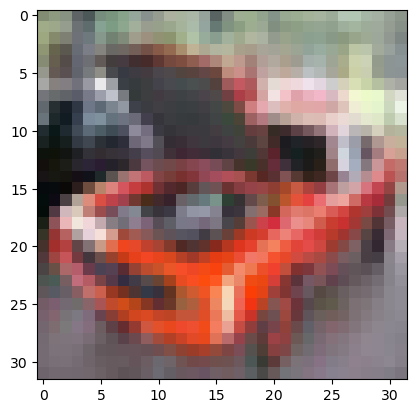

tensor([1, 9, 5, 5, 6, 3, 2, 7, 6, 1, 7, 5, 0, 1, 8, 1, 3, 3, 5, 7, 4, 8, 2, 7,
        4, 8, 0, 8, 9, 4, 9, 1, 8, 1, 8, 8, 9, 5, 7, 1, 0, 9, 5, 4, 1, 7, 3, 2,
        6, 8, 1, 2, 0, 8, 7, 6, 6, 4, 2, 4, 3, 3, 4, 1, 7, 5, 0, 0, 0, 4, 3, 9,
        4, 2, 8, 2, 3, 0, 7, 4, 3, 1, 7, 4, 3, 2, 5, 9, 4, 8, 2, 0, 5, 5, 1, 9,
        6, 8, 8, 0, 6, 0, 9, 4, 4, 1, 8, 6, 3, 5, 4, 2, 6, 8, 9, 0, 9, 4, 2, 2,
        1, 8, 6, 3, 3, 1, 2, 8, 4, 4, 1, 9, 3, 4, 4, 4, 5, 6, 5, 9, 4, 0, 5, 6,
        7, 2, 3, 4, 1, 7, 0, 2, 9, 2, 7, 5, 8, 6, 6, 0, 1, 9, 4, 8, 8, 4, 0, 4,
        1, 6, 3, 7, 4, 6, 4, 9, 0, 5, 1, 5], device='mps:0')
Loss: 7.871671676635742, Batch Num: 0/223, Accuracy:0.07777778059244156, Epoch: 39
tensor(1.0227, device='mps:0')
tensor([2, 2, 6, 3, 7, 4, 8, 7, 5, 4, 2, 1, 2, 4, 9, 5, 8, 8, 9, 6, 7, 8, 4, 8,
        6, 2, 4, 9, 6, 6, 7, 1, 6, 0, 7, 0, 6, 1, 6, 5, 1, 5, 2, 9, 0, 9, 9, 7,
        8, 1, 5, 7, 0, 5, 4, 5, 9, 0, 2, 3, 8, 8, 4, 1, 5, 2, 8, 5, 9, 7, 7, 1,
        4, 1, 0, 6, 6, 9,

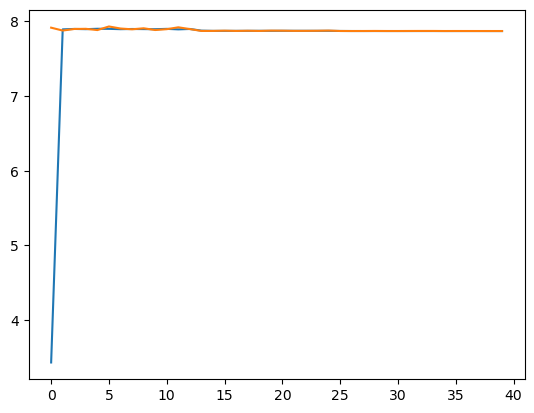

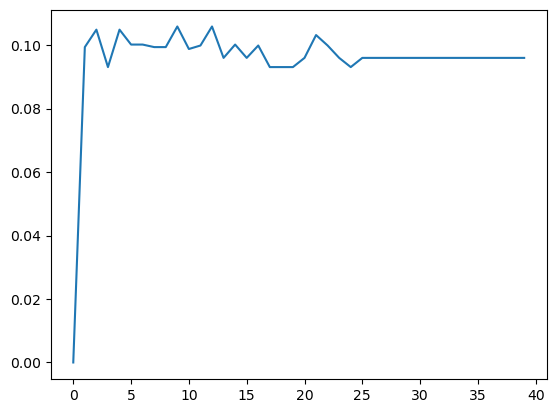

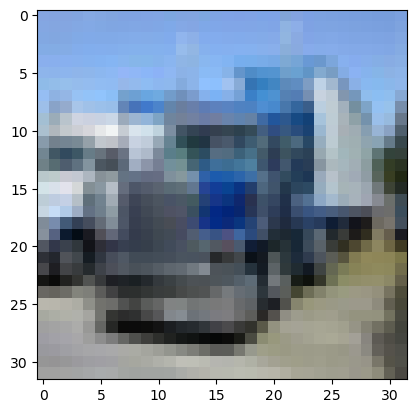

tensor([0, 3, 1, 8, 2, 1, 8, 7, 8, 5, 4, 6, 4, 7, 2, 1, 8, 3, 1, 5, 6, 0, 6, 0,
        4, 2, 0, 0, 5, 3, 6, 3, 7, 4, 5, 4, 2, 2, 5, 9, 7, 8, 6, 6, 4, 1, 7, 5,
        5, 4, 7, 2, 1, 8, 6, 6, 0, 7, 5, 3, 2, 5, 9, 7, 4, 6, 9, 0, 3, 2, 3, 2,
        5, 1, 3, 2, 8, 7, 0, 7, 2, 1, 5, 7, 5, 1, 5, 7, 5, 1, 1, 8, 7, 0, 0, 9,
        9, 6, 9, 6, 5, 3, 0, 0, 4, 3, 0, 6, 8, 2, 7, 7, 3, 1, 8, 4, 3, 9, 5, 3,
        5, 1, 0, 5, 5, 5, 3, 0, 7, 7, 6, 2, 5, 4, 6, 4, 9, 7, 5, 5, 7, 4, 9, 8,
        0, 4, 8, 6, 5, 7, 4, 7, 3, 9, 4, 6, 4, 2, 2, 3, 6, 0, 9, 3, 6, 1, 2, 9,
        1, 6, 6, 4, 4, 8, 0, 6, 9, 5, 7, 7], device='mps:0')
Loss: 7.86965799331665, Batch Num: 0/223, Accuracy:0.12777778506278992, Epoch: 40
tensor(0.9543, device='mps:0')
tensor([6, 9, 9, 5, 7, 2, 3, 5, 3, 6, 0, 7, 5, 1, 1, 4, 1, 7, 4, 8, 8, 6, 4, 6,
        8, 1, 9, 0, 2, 2, 1, 1, 4, 1, 0, 3, 1, 7, 4, 0, 7, 7, 6, 1, 2, 5, 3, 6,
        8, 6, 2, 4, 3, 0, 7, 1, 3, 7, 1, 5, 6, 3, 4, 5, 1, 1, 6, 3, 2, 3, 6, 0,
        2, 7, 0, 5, 8, 4, 

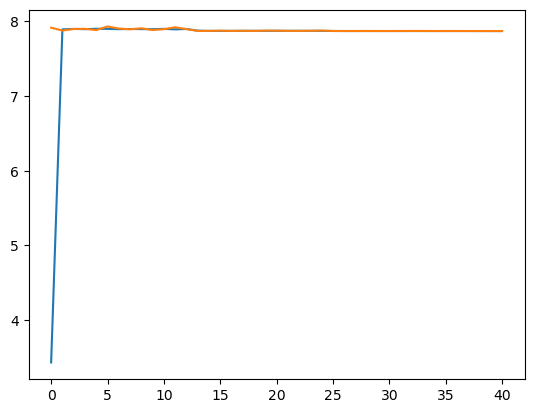

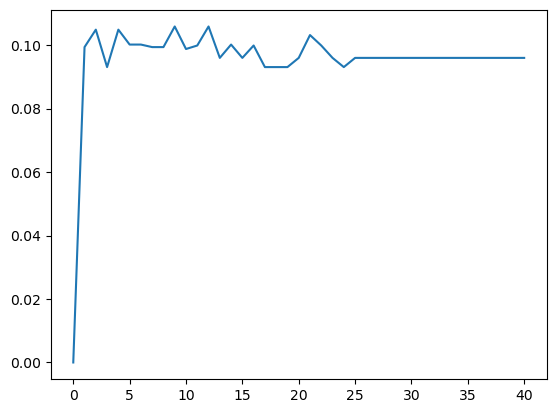

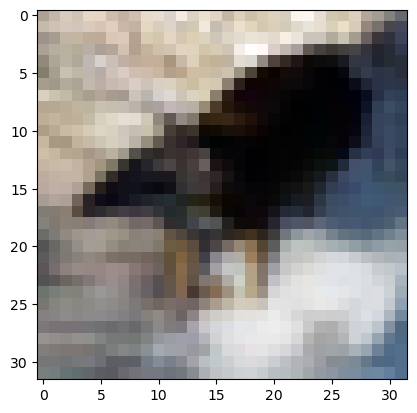

tensor([3, 4, 1, 4, 3, 8, 5, 5, 3, 2, 0, 5, 1, 9, 7, 1, 1, 3, 3, 0, 1, 6, 3, 0,
        1, 5, 0, 8, 7, 7, 6, 7, 4, 4, 3, 9, 3, 4, 3, 0, 8, 5, 2, 9, 4, 3, 7, 7,
        6, 4, 7, 8, 6, 9, 5, 0, 6, 2, 5, 5, 4, 8, 5, 9, 8, 7, 6, 4, 5, 3, 8, 6,
        1, 0, 0, 1, 8, 3, 3, 0, 8, 8, 6, 0, 1, 7, 9, 0, 8, 6, 3, 8, 1, 3, 7, 7,
        5, 0, 6, 9, 3, 0, 1, 7, 0, 8, 2, 0, 8, 5, 2, 7, 7, 1, 1, 3, 7, 9, 1, 6,
        7, 1, 0, 8, 1, 5, 2, 1, 5, 4, 1, 9, 6, 4, 2, 7, 6, 8, 4, 2, 8, 0, 6, 1,
        3, 8, 7, 8, 7, 2, 6, 2, 2, 3, 9, 9, 9, 5, 8, 0, 9, 3, 6, 5, 7, 7, 4, 4,
        1, 3, 8, 2, 8, 9, 6, 7, 9, 8, 5, 1], device='mps:0')
Loss: 7.868851661682129, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 41
tensor(0.8457, device='mps:0')
tensor([5, 9, 3, 2, 9, 2, 7, 6, 4, 7, 9, 2, 3, 1, 1, 5, 8, 0, 4, 1, 9, 3, 1, 5,
        2, 1, 6, 6, 7, 3, 8, 5, 6, 8, 3, 4, 0, 8, 0, 1, 1, 7, 1, 5, 0, 6, 8, 5,
        7, 5, 1, 9, 6, 4, 6, 9, 8, 1, 5, 2, 6, 4, 6, 2, 2, 3, 7, 3, 9, 5, 3, 1,
        7, 3, 3, 6, 3, 1,

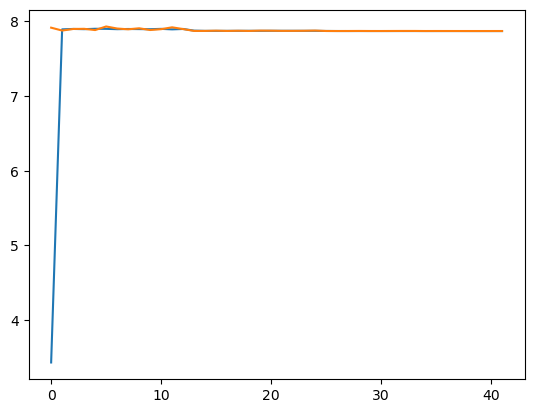

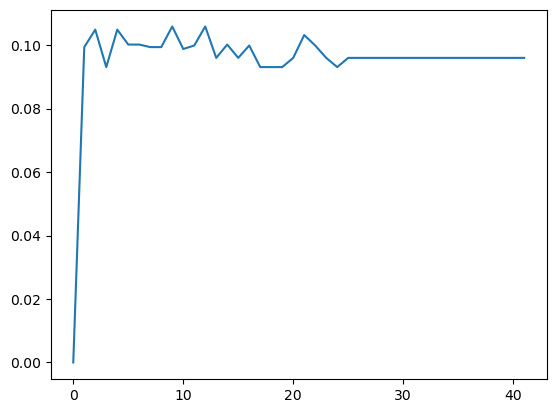

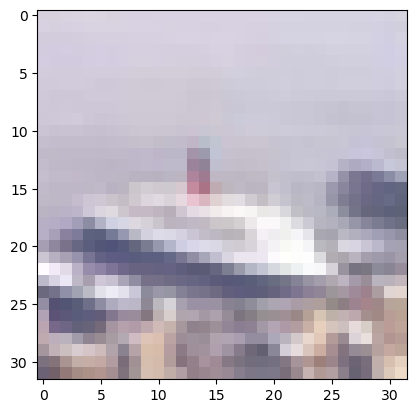

tensor([0, 0, 4, 0, 1, 0, 2, 3, 8, 3, 8, 7, 9, 6, 2, 6, 3, 2, 0, 1, 0, 7, 8, 3,
        5, 9, 3, 6, 7, 1, 1, 6, 4, 7, 3, 3, 0, 7, 3, 9, 1, 1, 6, 2, 8, 6, 0, 0,
        3, 8, 9, 5, 4, 7, 9, 3, 8, 6, 9, 8, 1, 4, 9, 0, 6, 4, 3, 3, 6, 9, 7, 3,
        1, 6, 4, 4, 3, 1, 6, 4, 4, 4, 1, 6, 1, 9, 4, 6, 9, 4, 1, 0, 7, 7, 5, 3,
        0, 4, 6, 3, 6, 9, 6, 0, 5, 1, 3, 0, 6, 2, 3, 9, 8, 4, 9, 5, 0, 0, 1, 7,
        7, 9, 6, 4, 0, 2, 6, 2, 9, 3, 6, 0, 5, 5, 1, 9, 2, 1, 7, 6, 2, 5, 8, 2,
        0, 1, 9, 1, 1, 9, 1, 0, 1, 4, 9, 0, 5, 6, 6, 5, 2, 6, 6, 7, 2, 6, 7, 3,
        3, 1, 3, 5, 2, 4, 0, 4, 2, 0, 8, 0], device='mps:0')
Loss: 7.872778415679932, Batch Num: 0/223, Accuracy:0.07777778059244156, Epoch: 42
tensor(1.3811, device='mps:0')
tensor([6, 7, 2, 0, 3, 8, 9, 3, 5, 0, 8, 3, 8, 5, 7, 1, 8, 5, 6, 9, 0, 0, 4, 2,
        0, 4, 3, 7, 2, 9, 2, 6, 4, 7, 1, 2, 3, 0, 2, 2, 8, 6, 5, 7, 1, 3, 6, 1,
        7, 0, 5, 0, 3, 8, 3, 1, 4, 9, 2, 1, 8, 5, 9, 8, 8, 0, 3, 3, 9, 8, 0, 7,
        9, 9, 3, 7, 0, 8,

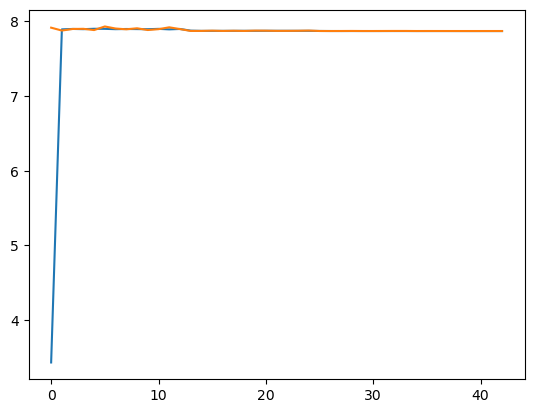

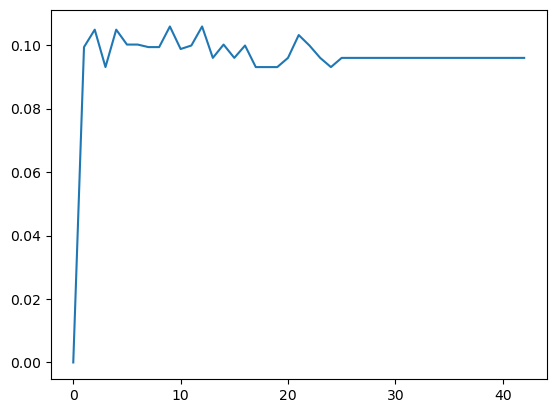

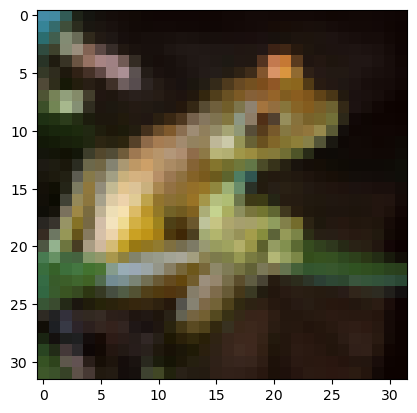

tensor([2, 7, 3, 0, 9, 1, 9, 3, 5, 4, 8, 5, 6, 9, 4, 6, 2, 3, 9, 7, 1, 0, 9, 1,
        2, 0, 7, 0, 1, 6, 8, 6, 1, 5, 3, 9, 4, 3, 1, 3, 6, 5, 2, 3, 7, 0, 3, 3,
        7, 9, 7, 4, 4, 0, 7, 0, 4, 1, 4, 4, 4, 0, 1, 7, 2, 7, 7, 5, 7, 3, 1, 8,
        9, 4, 6, 1, 6, 9, 7, 6, 2, 1, 9, 0, 8, 9, 8, 5, 4, 0, 2, 4, 7, 1, 6, 1,
        3, 5, 1, 5, 4, 6, 7, 5, 9, 7, 8, 5, 9, 5, 9, 6, 8, 6, 6, 4, 5, 0, 2, 8,
        7, 1, 9, 7, 5, 4, 6, 4, 6, 6, 6, 6, 9, 8, 7, 8, 8, 2, 6, 9, 7, 2, 2, 3,
        4, 6, 2, 6, 2, 5, 6, 3, 7, 5, 7, 5, 6, 6, 1, 4, 3, 4, 8, 3, 5, 8, 6, 1,
        4, 2, 9, 9, 9, 0, 4, 8, 3, 9, 5, 2], device='mps:0')
Loss: 7.869242191314697, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 43
tensor(0.9212, device='mps:0')
tensor([7, 3, 0, 7, 7, 4, 5, 5, 3, 4, 6, 3, 2, 4, 3, 4, 6, 6, 5, 7, 9, 8, 0, 8,
        6, 8, 8, 9, 8, 5, 3, 8, 0, 8, 9, 9, 8, 7, 2, 1, 3, 4, 5, 5, 0, 8, 8, 1,
        6, 4, 9, 1, 6, 7, 5, 3, 8, 3, 6, 4, 0, 7, 2, 0, 8, 1, 1, 4, 5, 7, 7, 5,
        8, 0, 3, 1, 4, 0,

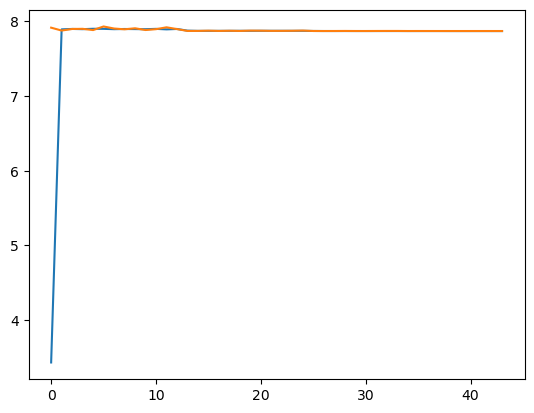

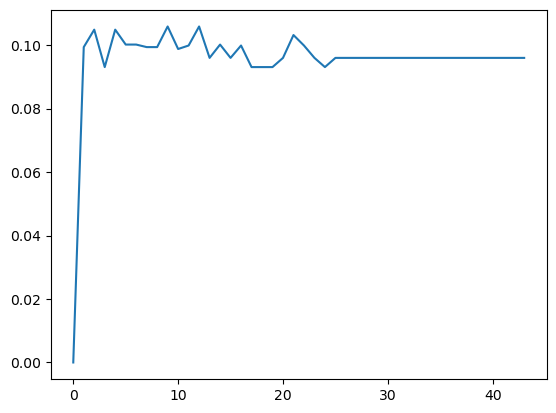

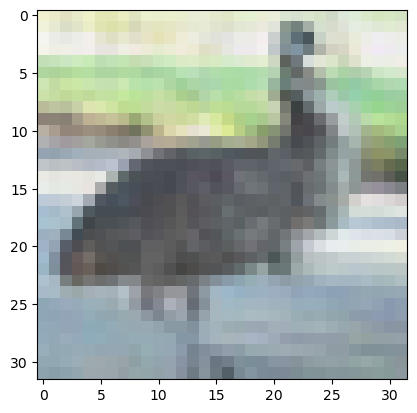

tensor([3, 7, 0, 1, 3, 4, 7, 6, 2, 6, 1, 2, 2, 7, 4, 6, 0, 9, 1, 8, 0, 5, 9, 1,
        7, 8, 0, 1, 0, 2, 0, 4, 6, 0, 9, 3, 9, 1, 0, 6, 7, 9, 6, 0, 4, 3, 1, 2,
        1, 3, 3, 9, 7, 1, 7, 5, 8, 3, 3, 3, 9, 1, 9, 0, 5, 4, 4, 0, 5, 7, 0, 8,
        3, 5, 1, 1, 3, 3, 1, 9, 7, 1, 5, 8, 0, 0, 4, 7, 4, 9, 7, 5, 5, 2, 1, 5,
        2, 2, 2, 5, 3, 1, 5, 4, 1, 5, 9, 3, 2, 2, 3, 4, 6, 9, 2, 1, 6, 4, 4, 6,
        5, 4, 7, 0, 7, 5, 4, 7, 2, 4, 4, 5, 3, 1, 3, 3, 7, 7, 7, 1, 1, 2, 9, 5,
        0, 9, 8, 8, 5, 5, 1, 8, 7, 5, 9, 7, 0, 4, 1, 4, 1, 1, 5, 4, 9, 2, 5, 4,
        0, 9, 9, 0, 8, 7, 8, 4, 6, 0, 9, 8], device='mps:0')
Loss: 7.868709087371826, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 44
tensor(1.0805, device='mps:0')
tensor([5, 2, 6, 0, 5, 0, 5, 9, 5, 4, 6, 0, 0, 1, 5, 8, 2, 6, 2, 5, 8, 9, 8, 9,
        9, 5, 8, 6, 6, 9, 1, 9, 2, 5, 2, 9, 2, 9, 3, 6, 0, 5, 3, 3, 4, 9, 5, 0,
        9, 5, 8, 2, 9, 6, 3, 1, 3, 5, 3, 4, 5, 4, 2, 8, 2, 3, 1, 9, 0, 3, 6, 3,
        8, 6, 8, 3, 8, 7, 

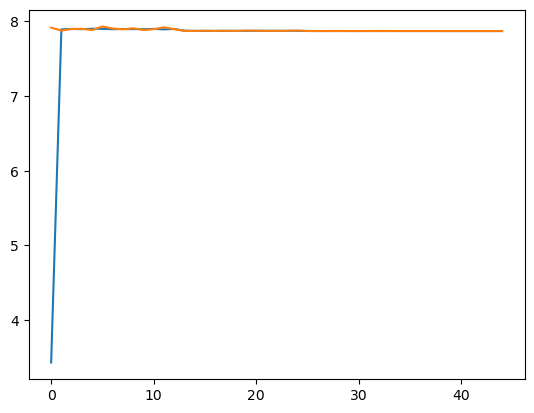

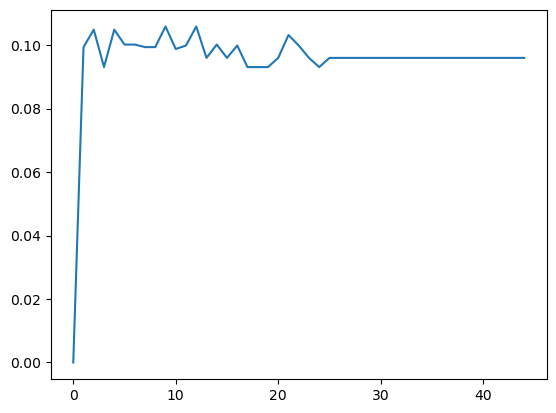

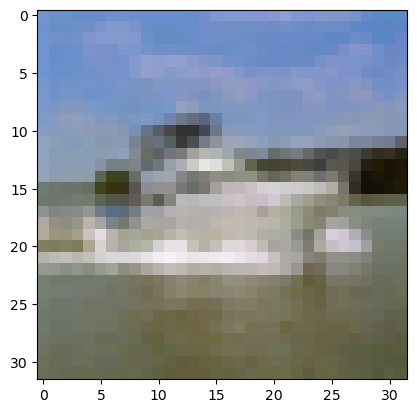

tensor([5, 7, 9, 5, 5, 5, 9, 8, 6, 7, 5, 8, 0, 5, 4, 4, 3, 1, 8, 2, 3, 4, 7, 8,
        5, 3, 9, 4, 1, 0, 4, 5, 4, 3, 3, 1, 9, 7, 6, 2, 9, 2, 3, 4, 3, 5, 8, 6,
        4, 0, 9, 1, 5, 1, 3, 3, 3, 4, 5, 7, 4, 4, 0, 9, 2, 9, 6, 3, 9, 7, 2, 7,
        3, 3, 0, 1, 5, 4, 0, 1, 1, 1, 1, 3, 5, 2, 4, 6, 3, 6, 7, 3, 0, 8, 0, 5,
        5, 3, 4, 9, 7, 8, 4, 0, 1, 8, 5, 6, 4, 8, 9, 4, 4, 1, 0, 0, 5, 6, 7, 1,
        5, 9, 5, 2, 4, 7, 3, 3, 4, 4, 5, 0, 4, 7, 9, 9, 4, 6, 6, 5, 7, 7, 9, 9,
        6, 1, 9, 8, 5, 6, 6, 7, 1, 4, 1, 6, 1, 2, 1, 0, 6, 5, 7, 2, 7, 8, 3, 7,
        3, 3, 5, 6, 5, 7, 9, 9, 5, 4, 7, 5], device='mps:0')
Loss: 7.869731903076172, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 45
tensor(1.3709, device='mps:0')
tensor([8, 4, 7, 2, 4, 3, 6, 8, 3, 8, 1, 7, 6, 0, 5, 6, 4, 3, 4, 5, 5, 2, 7, 6,
        4, 4, 4, 4, 9, 4, 1, 1, 2, 1, 3, 3, 9, 3, 7, 9, 1, 8, 2, 6, 8, 4, 3, 0,
        0, 2, 7, 4, 0, 7, 2, 7, 6, 9, 6, 0, 8, 8, 3, 4, 8, 9, 9, 5, 3, 0, 1, 0,
        7, 2, 1, 4, 0, 8, 

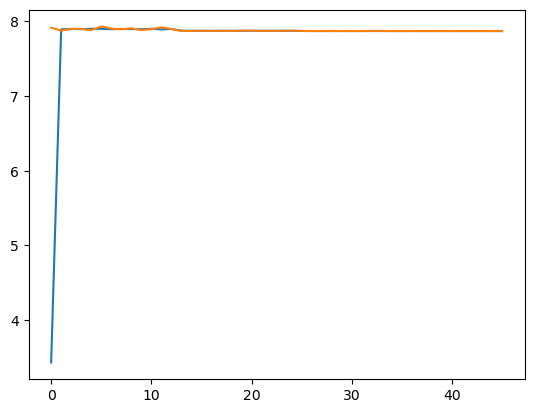

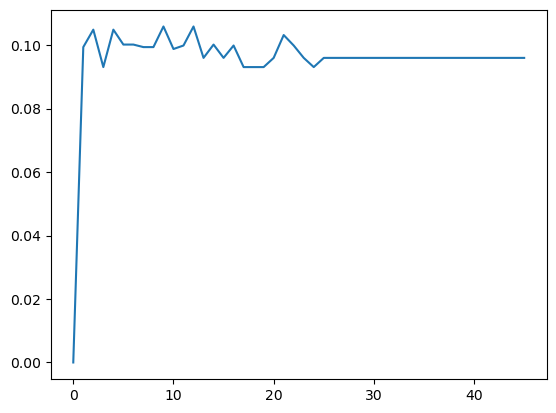

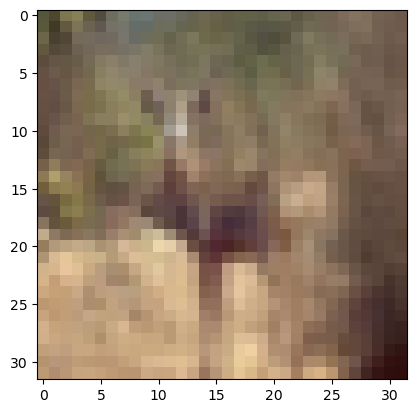

tensor([8, 0, 4, 4, 3, 5, 8, 8, 2, 4, 9, 2, 2, 4, 5, 0, 7, 3, 4, 2, 3, 2, 6, 4,
        8, 6, 4, 8, 0, 4, 0, 6, 6, 7, 9, 4, 9, 4, 7, 8, 5, 7, 8, 7, 2, 7, 1, 7,
        6, 0, 0, 1, 7, 6, 5, 8, 0, 1, 5, 5, 1, 1, 0, 3, 6, 2, 7, 4, 2, 4, 6, 1,
        3, 7, 6, 5, 6, 0, 1, 6, 1, 4, 1, 9, 1, 0, 3, 5, 7, 2, 1, 6, 6, 2, 1, 1,
        8, 7, 3, 2, 6, 5, 1, 7, 1, 7, 6, 9, 4, 4, 7, 0, 5, 1, 0, 9, 5, 6, 2, 0,
        0, 7, 4, 4, 9, 7, 3, 7, 4, 4, 6, 7, 0, 4, 0, 9, 3, 2, 3, 7, 2, 0, 7, 2,
        1, 1, 8, 0, 5, 6, 0, 0, 5, 3, 0, 5, 2, 9, 3, 9, 2, 4, 4, 4, 5, 5, 7, 6,
        0, 1, 5, 4, 9, 9, 6, 4, 3, 2, 3, 2], device='mps:0')
Loss: 7.868128776550293, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 46
tensor(1.0874, device='mps:0')
tensor([5, 4, 6, 3, 1, 8, 9, 2, 7, 9, 1, 6, 0, 8, 9, 1, 8, 7, 6, 3, 8, 4, 8, 7,
        4, 9, 5, 6, 8, 7, 7, 0, 0, 8, 8, 1, 8, 2, 0, 8, 7, 9, 0, 7, 9, 5, 5, 2,
        3, 8, 1, 5, 5, 0, 0, 4, 0, 7, 2, 1, 1, 8, 0, 9, 1, 5, 2, 1, 7, 7, 4, 9,
        3, 1, 3, 4, 4, 1,

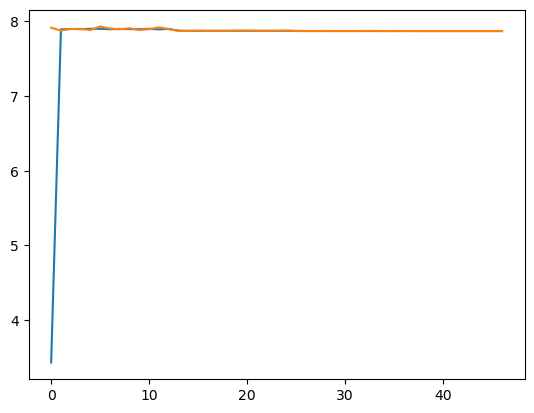

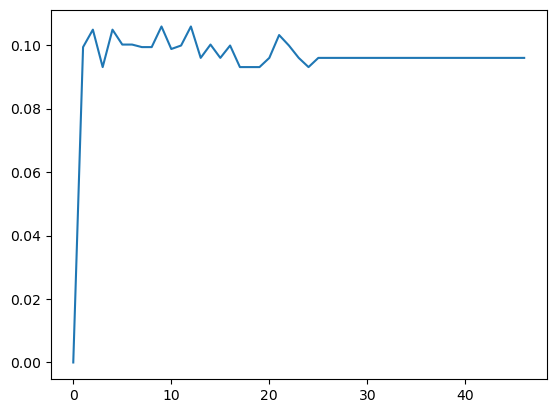

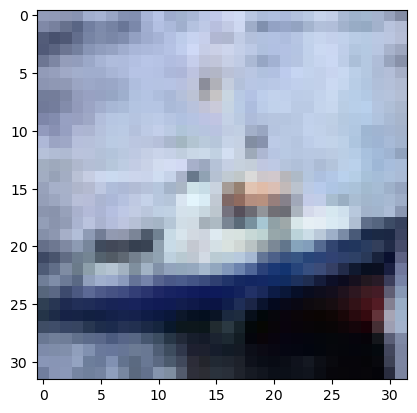

tensor([2, 4, 8, 9, 8, 7, 2, 4, 1, 5, 5, 2, 7, 5, 1, 5, 1, 2, 9, 2, 6, 8, 0, 3,
        2, 4, 7, 2, 7, 3, 1, 8, 9, 9, 5, 3, 9, 6, 9, 9, 6, 8, 1, 6, 3, 5, 9, 5,
        1, 3, 8, 9, 4, 3, 0, 8, 3, 8, 5, 4, 9, 6, 1, 8, 8, 3, 5, 2, 7, 2, 3, 1,
        9, 4, 1, 3, 1, 9, 8, 1, 5, 8, 3, 9, 5, 3, 9, 0, 3, 8, 3, 3, 7, 0, 4, 9,
        3, 9, 5, 1, 1, 8, 3, 4, 7, 1, 8, 7, 9, 9, 9, 8, 6, 8, 3, 4, 9, 0, 0, 4,
        1, 2, 0, 7, 5, 5, 0, 5, 3, 7, 2, 3, 0, 7, 1, 3, 2, 4, 0, 8, 0, 6, 7, 2,
        9, 7, 2, 1, 5, 8, 2, 6, 4, 5, 2, 8, 8, 3, 7, 4, 7, 7, 0, 1, 4, 8, 5, 5,
        6, 4, 1, 4, 1, 3, 4, 9, 7, 4, 1, 4], device='mps:0')
Loss: 7.8700480461120605, Batch Num: 0/223, Accuracy:0.09444444626569748, Epoch: 47
tensor(1.0969, device='mps:0')
tensor([8, 3, 1, 4, 2, 3, 5, 9, 5, 7, 3, 9, 7, 8, 0, 5, 9, 2, 0, 5, 6, 6, 8, 4,
        0, 8, 0, 8, 6, 0, 6, 0, 7, 9, 1, 8, 8, 9, 9, 4, 1, 5, 1, 8, 7, 6, 8, 9,
        8, 7, 4, 1, 3, 5, 5, 6, 5, 7, 2, 4, 3, 5, 5, 2, 4, 0, 8, 6, 8, 1, 4, 1,
        1, 0, 6, 1, 8, 2

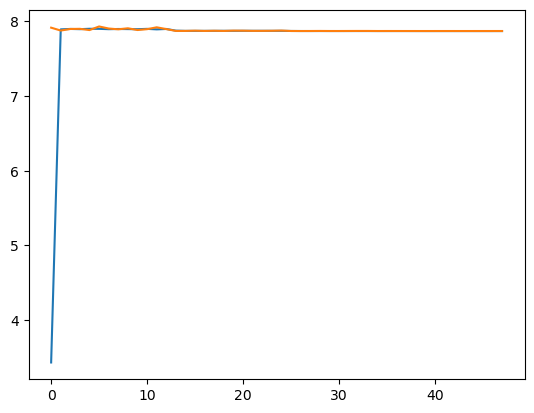

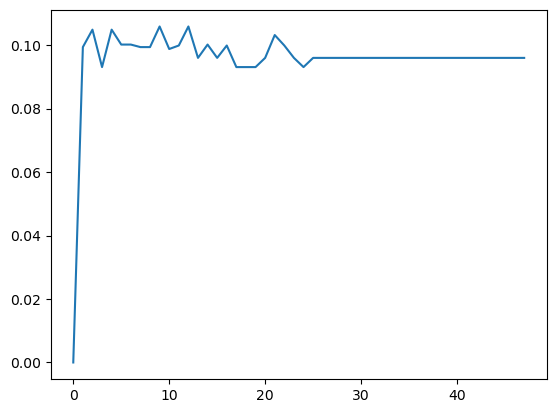

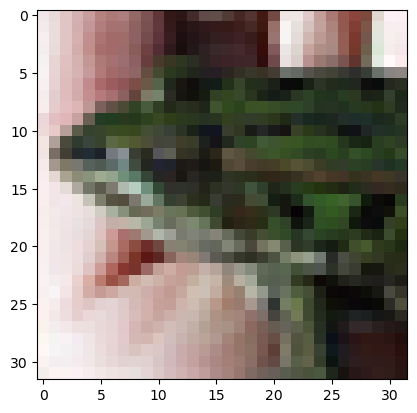

tensor([9, 1, 7, 9, 0, 8, 1, 2, 4, 3, 2, 6, 4, 1, 2, 8, 6, 4, 8, 6, 7, 5, 1, 6,
        6, 6, 7, 6, 4, 1, 6, 6, 3, 8, 2, 5, 2, 6, 8, 4, 4, 2, 9, 2, 9, 0, 5, 1,
        8, 1, 2, 7, 0, 5, 6, 2, 3, 8, 1, 5, 6, 6, 1, 7, 2, 7, 6, 7, 9, 4, 5, 5,
        4, 1, 3, 7, 3, 8, 2, 3, 9, 7, 6, 0, 5, 5, 3, 2, 4, 3, 2, 1, 9, 7, 0, 5,
        6, 5, 5, 2, 1, 8, 9, 4, 4, 5, 2, 0, 9, 5, 0, 7, 8, 7, 1, 2, 0, 1, 1, 7,
        9, 4, 7, 7, 3, 4, 4, 5, 7, 3, 6, 0, 5, 8, 0, 9, 2, 2, 0, 0, 3, 6, 9, 2,
        9, 4, 8, 8, 2, 4, 7, 5, 2, 5, 8, 9, 1, 7, 1, 2, 7, 8, 7, 2, 1, 0, 6, 9,
        9, 0, 9, 5, 0, 9, 6, 0, 4, 5, 6, 9], device='mps:0')
Loss: 7.869389057159424, Batch Num: 0/223, Accuracy:0.1111111119389534, Epoch: 48
tensor(0.8000, device='mps:0')
tensor([5, 2, 9, 4, 1, 7, 1, 7, 7, 9, 2, 5, 6, 9, 7, 0, 3, 7, 2, 3, 8, 2, 5, 2,
        6, 2, 9, 4, 7, 0, 4, 2, 5, 8, 7, 2, 1, 5, 1, 0, 4, 2, 3, 4, 2, 1, 8, 5,
        1, 4, 1, 9, 8, 6, 9, 4, 8, 3, 8, 7, 3, 6, 8, 4, 1, 1, 2, 6, 7, 4, 4, 2,
        8, 9, 9, 9, 2, 3, 

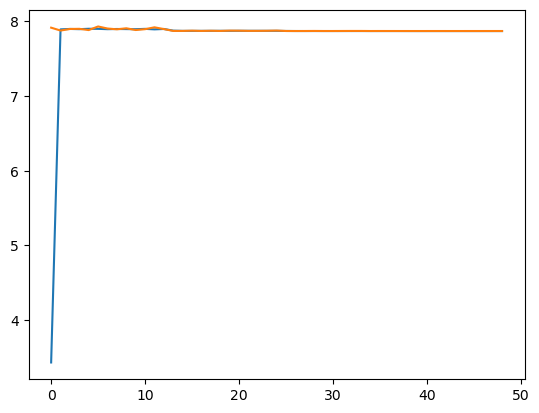

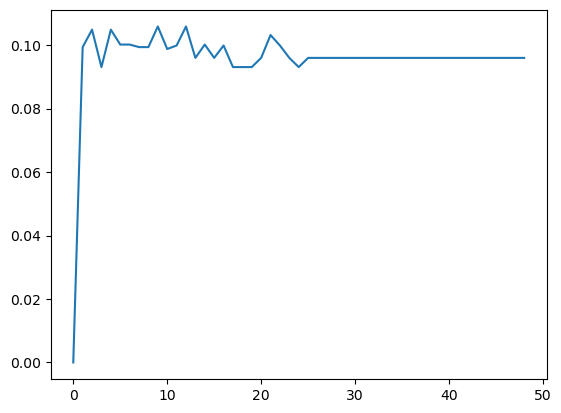

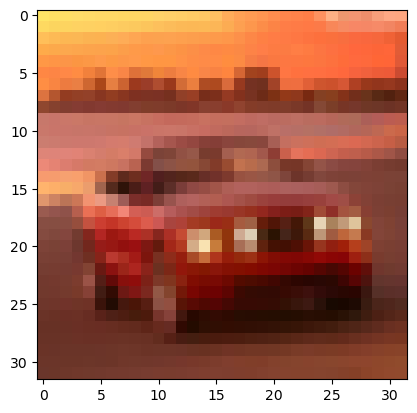

tensor([7, 2, 3, 5, 1, 7, 7, 0, 7, 1, 2, 2, 7, 5, 4, 8, 5, 0, 1, 3, 5, 2, 7, 8,
        6, 3, 9, 9, 8, 2, 6, 1, 1, 1, 3, 8, 5, 6, 3, 9, 6, 2, 3, 0, 7, 9, 0, 5,
        9, 0, 7, 9, 2, 7, 4, 5, 7, 5, 9, 0, 0, 1, 1, 8, 4, 6, 2, 1, 2, 0, 1, 3,
        4, 4, 2, 8, 6, 2, 2, 0, 1, 6, 0, 7, 6, 3, 9, 8, 6, 1, 8, 6, 8, 7, 8, 4,
        0, 0, 2, 5, 1, 5, 3, 6, 2, 8, 3, 2, 5, 4, 7, 7, 9, 5, 5, 8, 1, 6, 9, 8,
        7, 1, 3, 6, 4, 2, 7, 0, 9, 2, 8, 1, 4, 7, 2, 4, 6, 0, 4, 5, 4, 4, 5, 7,
        2, 8, 1, 8, 4, 1, 2, 8, 9, 4, 3, 0, 9, 8, 0, 3, 8, 8, 0, 2, 2, 1, 7, 9,
        6, 2, 1, 8, 7, 9, 3, 9, 0, 9, 8, 7], device='mps:0')
Loss: 7.8686137199401855, Batch Num: 0/223, Accuracy:0.11666666716337204, Epoch: 49
tensor(0.7488, device='mps:0')
tensor([4, 9, 0, 6, 4, 3, 6, 8, 8, 5, 0, 8, 9, 2, 8, 6, 4, 4, 4, 4, 4, 4, 4, 1,
        2, 8, 4, 3, 2, 0, 4, 7, 2, 3, 8, 4, 4, 3, 4, 7, 8, 3, 0, 7, 6, 2, 2, 9,
        2, 6, 6, 9, 6, 3, 1, 8, 9, 9, 9, 4, 4, 6, 8, 2, 0, 9, 6, 7, 9, 0, 0, 6,
        5, 0, 2, 6, 1, 7

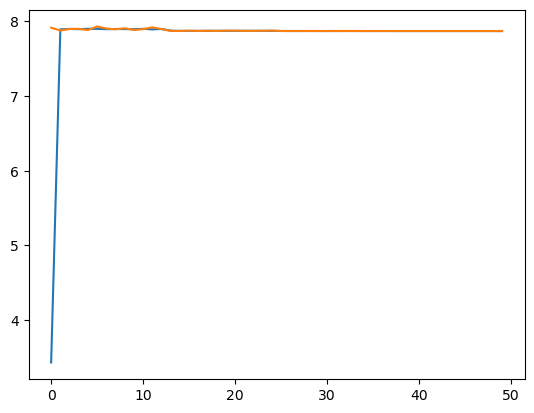

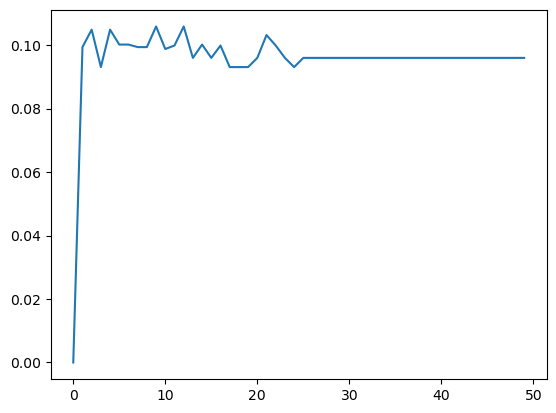

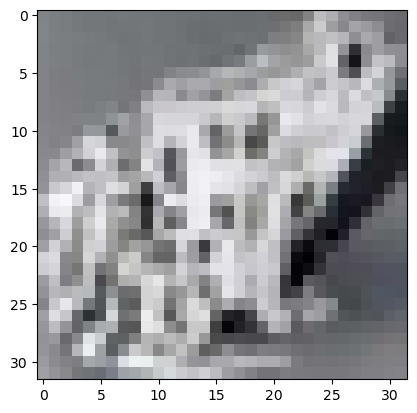

tensor([8, 1, 2, 8, 6, 3, 4, 7, 0, 9, 7, 7, 9, 4, 7, 2, 6, 7, 5, 8, 9, 3, 2, 3,
        5, 8, 4, 2, 4, 2, 4, 8, 6, 9, 4, 1, 1, 2, 9, 7, 0, 5, 1, 1, 4, 7, 3, 2,
        5, 4, 0, 2, 6, 0, 7, 2, 6, 9, 0, 3, 6, 5, 1, 0, 6, 0, 8, 9, 1, 3, 4, 1,
        7, 0, 5, 1, 1, 5, 3, 5, 6, 2, 8, 0, 1, 3, 8, 7, 7, 3, 1, 5, 4, 1, 6, 5,
        7, 1, 9, 8, 1, 5, 7, 3, 3, 5, 3, 7, 5, 6, 2, 6, 4, 4, 3, 7, 1, 4, 9, 8,
        7, 6, 8, 9, 9, 4, 7, 8, 8, 4, 2, 3, 3, 2, 2, 8, 6, 5, 9, 4, 4, 4, 5, 3,
        7, 3, 2, 9, 7, 8, 6, 5, 0, 5, 4, 9, 9, 5, 4, 7, 7, 3, 9, 2, 3, 7, 2, 4,
        1, 0, 0, 8, 4, 4, 8, 1, 6, 9, 9, 0], device='mps:0')
Loss: 7.868133068084717, Batch Num: 0/223, Accuracy:0.12222222238779068, Epoch: 50
tensor(0.6513, device='mps:0')
tensor([1, 5, 7, 8, 4, 3, 6, 9, 4, 9, 5, 0, 7, 0, 4, 6, 9, 8, 6, 2, 3, 2, 1, 4,
        4, 6, 1, 3, 8, 1, 5, 2, 7, 2, 4, 6, 4, 3, 0, 7, 4, 7, 5, 5, 6, 8, 1, 4,
        2, 1, 2, 8, 2, 2, 2, 6, 2, 5, 8, 1, 5, 7, 0, 2, 7, 3, 9, 0, 8, 8, 3, 0,
        7, 6, 6, 5, 7, 7,

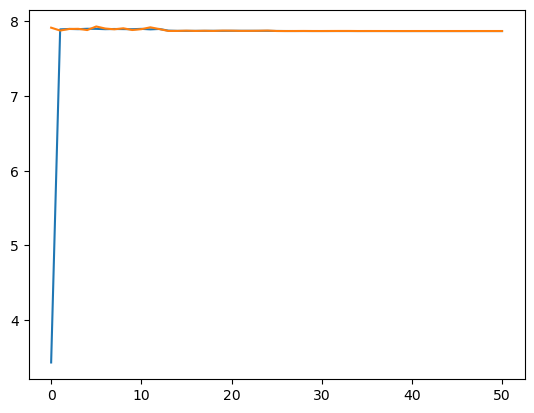

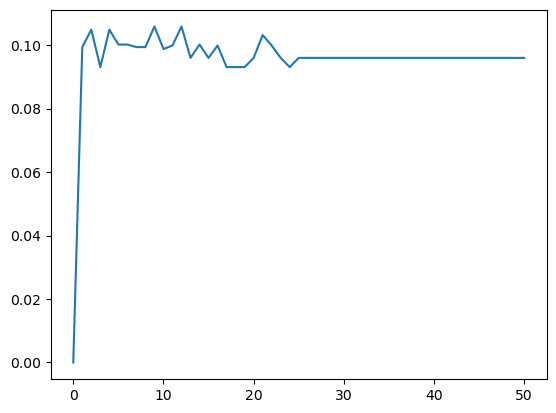

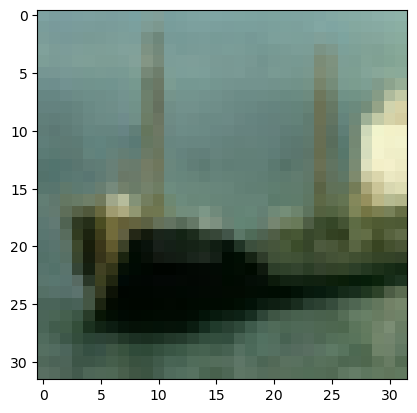

tensor([6, 0, 8, 8, 1, 7, 5, 1, 9, 6, 9, 6, 4, 1, 1, 2, 8, 6, 9, 6, 0, 5, 7, 4,
        1, 5, 8, 5, 6, 5, 3, 4, 0, 4, 3, 1, 9, 1, 5, 6, 6, 2, 8, 9, 8, 2, 5, 5,
        9, 0, 7, 1, 8, 1, 0, 3, 1, 1, 9, 6, 1, 0, 1, 5, 8, 7, 8, 6, 0, 1, 1, 4,
        4, 4, 0, 5, 8, 8, 7, 6, 3, 8, 1, 4, 1, 0, 5, 4, 9, 3, 4, 2, 8, 1, 5, 4,
        9, 6, 3, 7, 2, 3, 1, 7, 0, 2, 6, 5, 2, 5, 6, 3, 9, 1, 9, 7, 0, 4, 4, 7,
        3, 0, 2, 2, 3, 9, 7, 2, 2, 4, 7, 4, 8, 9, 3, 9, 0, 5, 5, 3, 9, 2, 8, 7,
        0, 2, 9, 0, 3, 9, 5, 0, 2, 8, 2, 3, 8, 1, 2, 4, 1, 7, 7, 7, 4, 4, 4, 8,
        3, 5, 8, 0, 9, 8, 3, 8, 6, 8, 0, 5], device='mps:0')
Loss: 7.870753288269043, Batch Num: 0/223, Accuracy:0.0833333358168602, Epoch: 51
tensor(0.7023, device='mps:0')
tensor([9, 9, 9, 3, 9, 2, 8, 5, 0, 3, 2, 8, 1, 0, 4, 1, 9, 6, 9, 4, 5, 5, 0, 2,
        1, 5, 2, 9, 2, 0, 1, 1, 1, 6, 4, 4, 6, 1, 6, 2, 3, 3, 6, 5, 8, 5, 4, 8,
        2, 3, 7, 6, 9, 3, 4, 8, 1, 2, 1, 0, 5, 4, 8, 3, 1, 6, 3, 3, 5, 6, 0, 9,
        2, 5, 4, 6, 7, 0, 

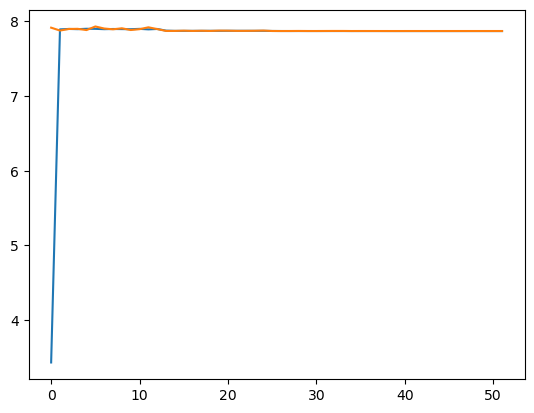

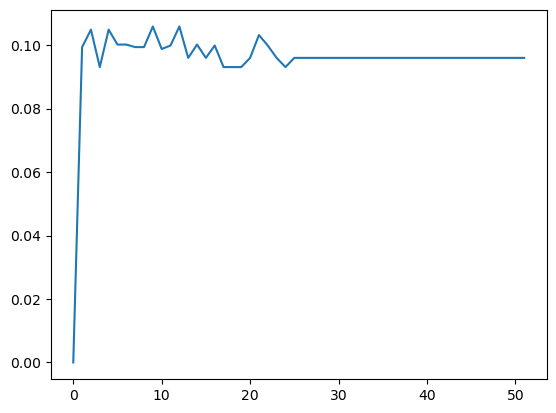

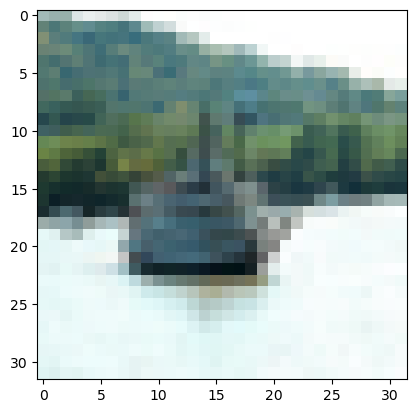

tensor([4, 6, 9, 7, 9, 0, 4, 9, 9, 2, 6, 9, 3, 1, 1, 1, 5, 9, 2, 6, 8, 7, 2, 4,
        9, 3, 5, 2, 4, 6, 3, 5, 1, 9, 3, 4, 8, 6, 5, 8, 7, 2, 4, 1, 7, 0, 2, 0,
        1, 2, 9, 0, 6, 4, 9, 0, 3, 3, 3, 5, 8, 6, 6, 4, 2, 5, 7, 9, 2, 9, 7, 4,
        9, 4, 5, 6, 0, 6, 6, 5, 6, 7, 8, 1, 3, 3, 7, 8, 2, 6, 2, 8, 3, 5, 3, 4,
        7, 0, 2, 4, 9, 1, 8, 0, 8, 2, 5, 7, 6, 2, 0, 9, 8, 2, 5, 5, 0, 9, 4, 9,
        9, 4, 4, 5, 8, 8, 8, 3, 6, 3, 0, 2, 0, 0, 5, 9, 2, 7, 4, 3, 0, 0, 1, 6,
        4, 4, 8, 5, 2, 4, 9, 4, 8, 7, 4, 0, 6, 1, 0, 7, 0, 2, 7, 8, 2, 8, 1, 4,
        1, 5, 8, 9, 2, 1, 7, 7, 6, 0, 5, 7], device='mps:0')
Loss: 7.869924545288086, Batch Num: 0/223, Accuracy:0.09444444626569748, Epoch: 52
tensor(0.7247, device='mps:0')
tensor([7, 6, 0, 7, 6, 6, 2, 9, 1, 7, 4, 8, 2, 8, 8, 8, 7, 9, 8, 4, 9, 1, 6, 8,
        2, 6, 7, 1, 4, 8, 4, 7, 8, 3, 2, 0, 4, 9, 2, 8, 4, 7, 2, 2, 8, 6, 8, 4,
        4, 3, 0, 3, 2, 9, 7, 2, 2, 2, 6, 7, 4, 9, 4, 6, 5, 9, 4, 5, 1, 1, 0, 1,
        7, 7, 8, 8, 5, 4,

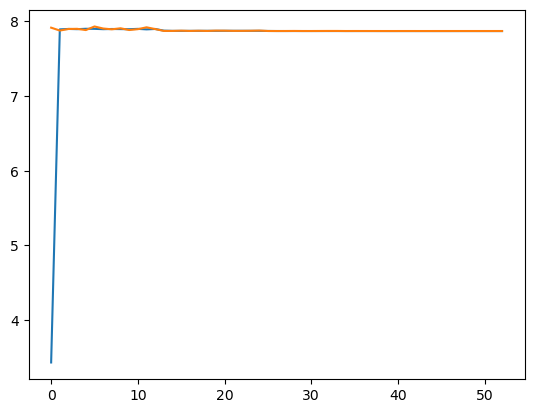

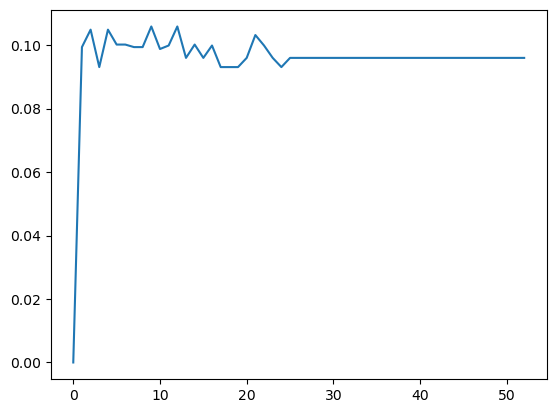

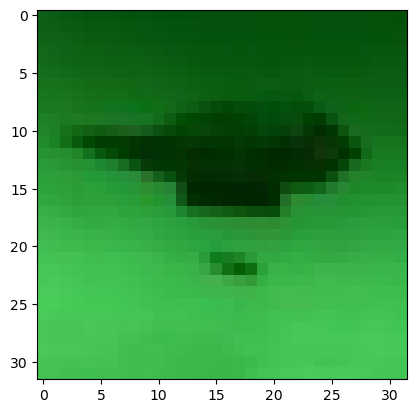

tensor([2, 9, 3, 8, 3, 1, 8, 8, 6, 8, 2, 8, 3, 4, 5, 3, 5, 7, 7, 4, 2, 0, 5, 3,
        8, 5, 4, 3, 0, 8, 5, 5, 7, 1, 0, 3, 8, 6, 2, 1, 7, 7, 0, 7, 0, 4, 9, 8,
        5, 0, 5, 5, 3, 3, 8, 1, 8, 7, 6, 2, 3, 0, 1, 0, 0, 8, 8, 9, 4, 5, 8, 8,
        0, 0, 6, 8, 6, 1, 4, 3, 4, 7, 0, 2, 3, 5, 5, 0, 3, 4, 1, 7, 5, 5, 1, 0,
        1, 9, 1, 8, 5, 7, 8, 0, 5, 9, 2, 1, 0, 9, 6, 4, 7, 0, 3, 5, 9, 6, 2, 6,
        0, 6, 7, 0, 3, 9, 5, 1, 3, 1, 9, 7, 5, 1, 2, 8, 3, 6, 0, 5, 5, 3, 8, 7,
        3, 8, 6, 2, 8, 3, 4, 5, 3, 2, 3, 3, 9, 5, 5, 8, 1, 4, 8, 0, 9, 9, 0, 7,
        9, 9, 7, 1, 1, 2, 0, 9, 0, 5, 4, 6], device='mps:0')
Loss: 7.871712684631348, Batch Num: 0/223, Accuracy:0.08888889104127884, Epoch: 53
tensor(1.3250, device='mps:0')
tensor([7, 3, 7, 1, 1, 6, 8, 3, 4, 5, 6, 3, 9, 0, 3, 8, 6, 3, 7, 7, 2, 5, 4, 6,
        8, 0, 5, 7, 3, 5, 9, 1, 6, 3, 7, 1, 3, 7, 6, 8, 0, 2, 4, 2, 8, 6, 7, 5,
        0, 4, 5, 9, 0, 3, 7, 9, 9, 8, 1, 8, 0, 5, 6, 5, 5, 0, 7, 0, 4, 8, 4, 0,
        3, 8, 7, 9, 2, 1,

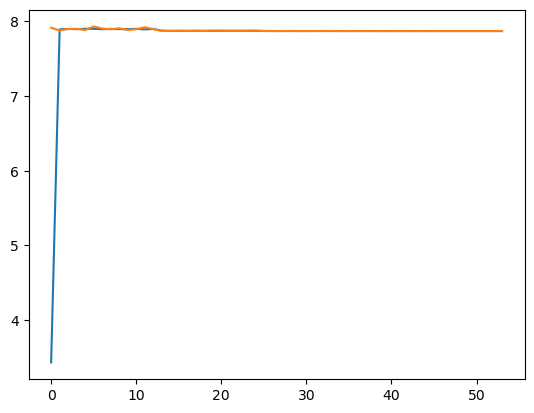

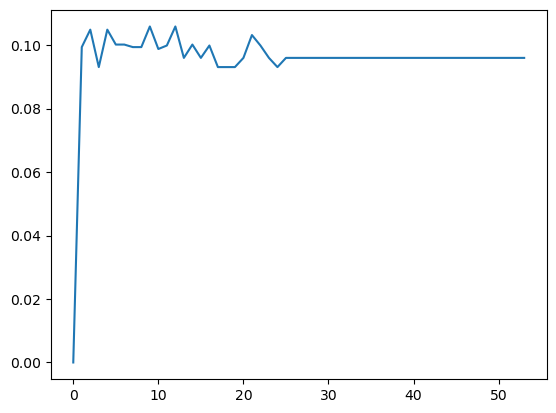

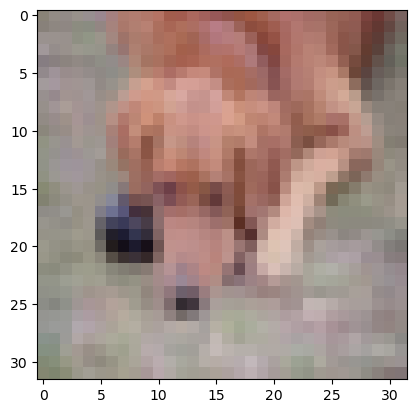

tensor([2, 5, 3, 1, 6, 8, 0, 7, 9, 9, 4, 4, 8, 9, 7, 9, 6, 4, 8, 5, 0, 2, 8, 5,
        6, 7, 9, 1, 7, 1, 3, 6, 2, 8, 7, 5, 5, 9, 5, 5, 4, 5, 1, 5, 6, 2, 9, 3,
        3, 6, 7, 6, 1, 4, 1, 6, 3, 2, 9, 1, 2, 8, 4, 1, 3, 1, 4, 7, 6, 7, 3, 6,
        9, 1, 0, 3, 2, 4, 6, 8, 7, 0, 0, 7, 8, 1, 1, 5, 6, 6, 5, 2, 1, 4, 5, 5,
        2, 8, 9, 9, 9, 2, 2, 6, 2, 0, 6, 4, 9, 8, 3, 3, 4, 6, 0, 1, 2, 7, 2, 4,
        7, 3, 9, 0, 6, 3, 3, 6, 3, 8, 2, 0, 7, 4, 5, 5, 6, 4, 0, 6, 5, 8, 5, 8,
        4, 6, 0, 6, 5, 9, 4, 9, 9, 3, 5, 5, 9, 7, 8, 8, 3, 4, 1, 4, 9, 6, 7, 7,
        0, 2, 5, 3, 8, 4, 5, 5, 7, 7, 5, 3], device='mps:0')
Loss: 7.870871543884277, Batch Num: 0/223, Accuracy:0.10000000149011612, Epoch: 54
tensor(0.8795, device='mps:0')
tensor([6, 0, 5, 4, 7, 6, 8, 5, 6, 7, 0, 3, 0, 2, 5, 1, 4, 5, 2, 6, 4, 6, 3, 0,
        5, 9, 2, 9, 1, 1, 0, 2, 3, 5, 6, 8, 7, 8, 8, 9, 1, 2, 0, 5, 7, 8, 8, 6,
        7, 0, 0, 4, 3, 4, 8, 9, 4, 8, 7, 1, 2, 2, 2, 5, 5, 4, 8, 4, 1, 7, 4, 8,
        8, 8, 8, 3, 8, 1,

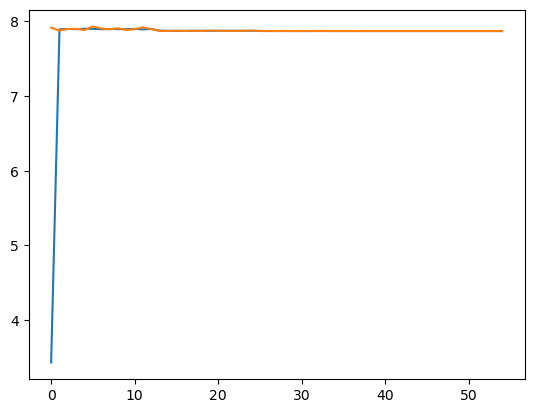

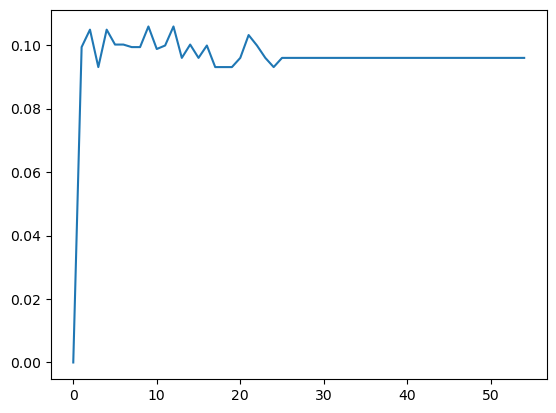

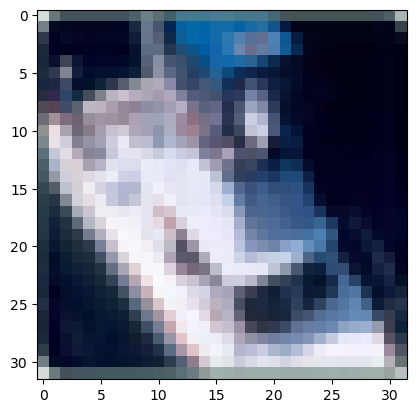

tensor([3, 2, 4, 8, 0, 1, 2, 0, 2, 7, 1, 2, 5, 1, 8, 8, 4, 8, 1, 9, 7, 9, 0, 3,
        6, 1, 3, 2, 4, 0, 6, 1, 5, 3, 3, 4, 9, 0, 3, 3, 0, 9, 4, 0, 6, 7, 5, 4,
        1, 7, 4, 5, 2, 3, 7, 9, 2, 9, 2, 3, 7, 4, 7, 9, 6, 0, 8, 0, 6, 2, 1, 1,
        1, 4, 4, 1, 2, 7, 3, 8, 1, 2, 9, 0, 5, 2, 3, 7, 6, 9, 5, 0, 3, 5, 2, 8,
        0, 7, 0, 2, 5, 0, 4, 2, 5, 5, 0, 4, 5, 3, 7, 1, 6, 8, 0, 5, 6, 8, 2, 0,
        5, 6, 5, 7, 6, 3, 5, 1, 2, 0, 3, 7, 4, 6, 5, 1, 0, 0, 4, 7, 6, 9, 1, 3,
        2, 3, 0, 4, 9, 7, 5, 6, 6, 5, 5, 1, 7, 3, 0, 3, 2, 0, 8, 7, 5, 5, 2, 3,
        0, 3, 6, 8, 0, 4, 6, 2, 9, 3, 0, 4], device='mps:0')
Loss: 7.871244430541992, Batch Num: 0/223, Accuracy:0.09444444626569748, Epoch: 55
tensor(1.1173, device='mps:0')
tensor([5, 9, 5, 7, 3, 3, 5, 7, 7, 0, 3, 0, 6, 7, 2, 8, 2, 0, 0, 0, 6, 9, 9, 3,
        4, 2, 9, 3, 1, 0, 8, 0, 7, 6, 9, 7, 0, 1, 0, 8, 9, 3, 2, 3, 3, 8, 2, 1,
        6, 3, 7, 7, 1, 5, 7, 4, 8, 5, 1, 2, 4, 0, 4, 1, 0, 4, 4, 6, 7, 9, 0, 5,
        6, 2, 9, 1, 1, 0,

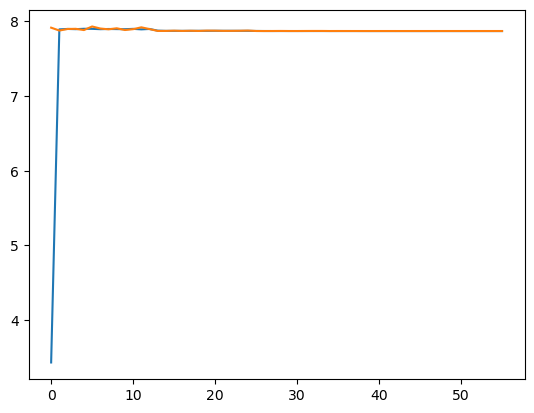

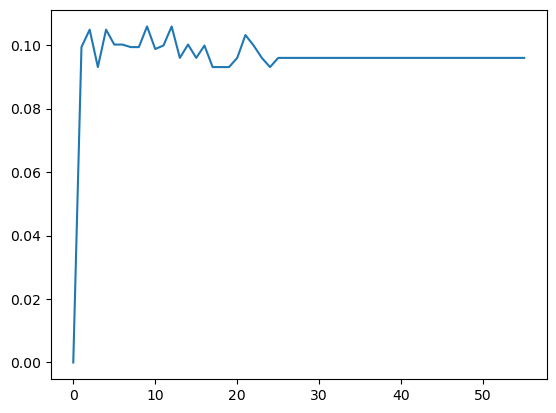

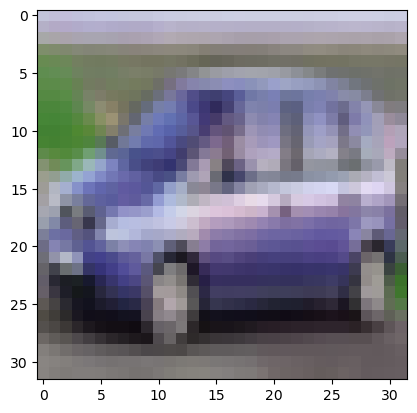

tensor([5, 4, 6, 5, 0, 5, 6, 9, 0, 3, 2, 8, 8, 3, 7, 3, 9, 0, 5, 5, 0, 4, 7, 1,
        9, 2, 1, 1, 0, 0, 9, 0, 4, 2, 5, 0, 3, 4, 1, 7, 4, 5, 6, 7, 7, 2, 2, 9,
        2, 2, 3, 4, 1, 6, 8, 7, 5, 1, 8, 2, 7, 8, 8, 7, 4, 8, 2, 4, 7, 6, 3, 7,
        6, 4, 1, 5, 6, 1, 3, 5, 4, 6, 9, 1, 8, 8, 6, 7, 5, 4, 4, 1, 1, 9, 9, 6,
        4, 2, 4, 8, 0, 5, 4, 1, 0, 3, 8, 8, 3, 2, 0, 0, 6, 9, 4, 0, 7, 7, 3, 5,
        7, 8, 2, 8, 1, 0, 6, 1, 5, 8, 4, 3, 2, 0, 4, 2, 6, 4, 6, 4, 2, 5, 8, 6,
        5, 3, 8, 3, 7, 4, 5, 4, 6, 0, 5, 8, 8, 8, 5, 3, 7, 9, 2, 8, 8, 4, 6, 8,
        0, 3, 4, 0, 8, 1, 6, 2, 7, 2, 9, 4], device='mps:0')
Loss: 7.869656085968018, Batch Num: 0/223, Accuracy:0.09444444626569748, Epoch: 56
tensor(0.9860, device='mps:0')
tensor([4, 7, 3, 9, 9, 6, 9, 9, 3, 1, 0, 9, 4, 3, 2, 6, 4, 2, 4, 0, 7, 6, 7, 0,
        8, 7, 1, 3, 8, 0, 1, 1, 4, 3, 3, 1, 4, 6, 0, 7, 0, 8, 3, 6, 1, 6, 7, 7,
        0, 2, 5, 9, 5, 8, 9, 8, 4, 4, 1, 4, 9, 5, 8, 1, 5, 4, 0, 3, 1, 7, 7, 5,
        7, 2, 7, 8, 8, 5,

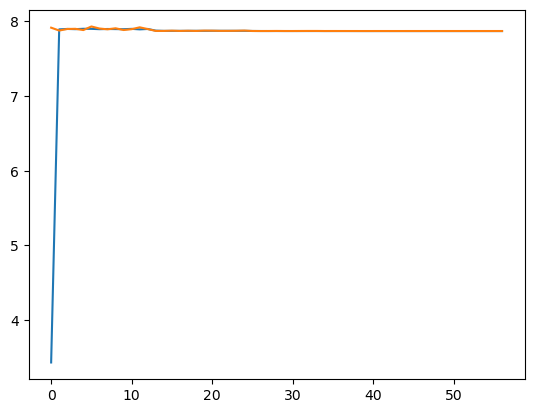

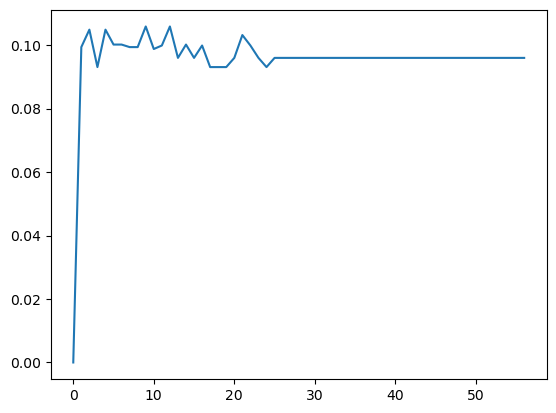

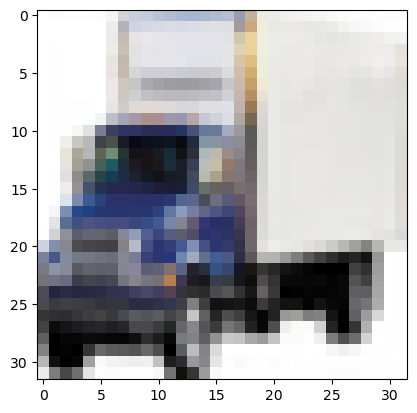

tensor([7, 4, 8, 0, 8, 3, 5, 1, 2, 5, 3, 9, 6, 2, 6, 2, 9, 8, 5, 0, 9, 0, 7, 8,
        7, 0, 5, 0, 1, 4, 4, 6, 9, 6, 5, 1, 3, 6, 6, 1, 2, 1, 2, 2, 7, 5, 0, 7,
        0, 0, 9, 3, 8, 3, 1, 3, 9, 6, 4, 0, 6, 5, 2, 3, 0, 3, 1, 5, 0, 5, 2, 7,
        1, 0, 2, 7, 1, 5, 2, 9, 8, 1, 9, 2, 6, 7, 2, 2, 8, 3, 8, 6, 6, 3, 1, 2,
        8, 8, 3, 2, 7, 0, 7, 4, 8, 1, 1, 3, 9, 7, 4, 4, 7, 7, 6, 3, 5, 3, 5, 1,
        9, 5, 0, 2, 0, 7, 9, 7, 7, 5, 7, 5, 4, 5, 5, 3, 3, 9, 4, 4, 6, 0, 6, 9,
        6, 6, 1, 1, 8, 1, 3, 9, 3, 8, 1, 0, 5, 3, 0, 8, 1, 0, 0, 0, 9, 5, 1, 1,
        0, 3, 2, 8, 5, 6, 8, 6, 4, 8, 9, 5], device='mps:0')
Loss: 7.871571063995361, Batch Num: 0/223, Accuracy:0.09444444626569748, Epoch: 57
tensor(0.8266, device='mps:0')
tensor([4, 1, 6, 2, 1, 9, 5, 4, 0, 7, 1, 7, 3, 9, 2, 1, 7, 2, 2, 5, 6, 6, 7, 2,
        2, 1, 1, 6, 1, 0, 6, 6, 2, 3, 3, 8, 1, 8, 1, 6, 0, 2, 8, 0, 4, 9, 2, 4,
        4, 8, 3, 8, 0, 6, 8, 8, 4, 2, 2, 2, 0, 1, 7, 6, 0, 7, 2, 9, 4, 0, 7, 8,
        9, 3, 5, 1, 0, 6,

KeyboardInterrupt: 

In [4]:
"""Training loop for Transformers and Vision Transformers. Plots the validation accuracy along with the train and validation loss. Uses Learning Rate Plateau, SGD and weight decay."""
import os
from torcheval.metrics import MulticlassAccuracy
device = get_device()
model = ViT(img_h = 32, img_w = 32).to(device)
optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.1, lr = 0.01, momentum = 0.9)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience = 10)
start_model = 0
# if(start_model > 0):
#     model.load_state_dict(torch.load(f'VisionTransformer/model{start_model-1}.pt'))
#     optimizer.load_state_dict(torch.load(f'VisionTransformer/model{start_model-1}_optim.pt'))
#     lr_scheduler.load_state_dict(torch.load(f'VisionTransformer/model{start_model-1}_scheduler.pt'))
loss_fn = nn.CrossEntropyLoss().to(device)
accuracy_fn = MulticlassAccuracy()
epochs = 100-start_model
val_accuracy = []
model_loss = []
val_loss = []
grad_mags = []
if not os.path.exists("../models/VisionTransformer"):
    os.mkdir("../models/VisionTransformer")
for j in range(epochs):
    model_sub_loss = torch.zeros((len(CIFAR_Train),))
    model_sub_loss.requires_grad = False
    for i, batch in enumerate(CIFAR_Train):
        optimizer.zero_grad()
        inputs = batch[0]
        labels = batch[1]
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        model_sub_loss[i] = loss.cpu().detach()
        if(i%100==0):
            accuracy_fn.update(outputs, labels)
            print(labels)
            print(f"Loss: {loss}, Batch Num: {i}/{len(CIFAR_Train)}, Accuracy:{accuracy_fn.compute()}, Epoch: {j+start_model}")
        loss.backward()
        if(i%100 == 0):
            grad_mag = torch.norm(torch.stack([torch.norm(p.grad, 2.0) for p in model.parameters() if p.grad is not None]), 2.0)
            grad_mags.append(grad_mag)
            print(grad_mag)
            torch.cuda.empty_cache()
        optimizer.step()
    model_loss.append(torch.mean(model_sub_loss,dim=-1))
    print("Validation Stage:")
    dropout_modules = [module for module in model.modules() if isinstance(module,torch.nn.Dropout)]
    [module.eval() for module in dropout_modules]
    accuracy_fn.reset()
    k = 0
    val_sub_loss = torch.zeros((len(CIFAR_Val),))
    val_sub_loss.requires_grad = False
    for i, batch in enumerate(CIFAR_Val):
        with torch.no_grad():
            inputs = batch[0]
            labels = batch[1]
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            val_sub_loss[k] = loss.cpu().detach()
            accuracy_fn.update(outputs, labels)
            if(k%10==0):
                print(labels)
                print(f"Loss: {loss}, Batch Num: {i}/{len(CIFAR_Val)}, Accuracy:{accuracy_fn.compute()}, Epoch: {j+start_model}")
            k+=1
    print(f"Final Accuracy: {accuracy_fn.compute()}")
    lr_scheduler.step(torch.mean(val_sub_loss))
    val_loss.append(torch.mean(val_sub_loss))
    val_accuracy.append(accuracy_fn.compute())
    accuracy_fn.reset()
    plt.plot(model_loss)
    plt.plot(val_loss)
    plt.show()
    plt.plot(val_accuracy)
    plt.show()
    plt.imshow(inputs[0].permute(1,2,0).cpu().detach())
    plt.show()
    [module.train() for module in dropout_modules]
    torch.save(model.state_dict(),f"../models/VisionTransformer/model{j+start_model}.pt")


In [ ]:
"""Save training state of VisionTransformers"""
torch.save(model.state_dict(),f"../models/VisionTransformer/model{j+start_model-1}_final.pt")
torch.save(optimizer.state_dict(),f"../models/VisionTransformer/model{j+start_model-1}_optim.pt")
torch.save(lr_scheduler.state_dict(),f"../models/VisionTransformer/model{j+start_model-1}_scheduler.pt")

In [ ]:
"""Save VisionTransformer metrics"""
if not os.path.exists("../models/VisionTransformer"):
    os.mkdir("../models/VisionTransformer")
with open("../models/VisionTransformer/grad_mags.txt", 'w+') as writer:
    for grad_mag in grad_mags:
        writer.write(f"{grad_mag},")
with open("../models/VisionTransformer/val_loss.txt", 'w+') as writer:
    for loss in val_loss:
        writer.write(f"{loss},")
with open("../models/VisionTransformer/train_loss.txt", 'w+') as writer:
    for loss in model_loss:
        writer.write(f"{loss},")
with open("../models/VisionTransformer/val_accuracy.txt", 'w+') as writer:
    for accuracy in val_accuracy:
        writer.write(f"{accuracy},")